## Clean Labels

This notebook finds mislabeled samples (e.g., where a subject who was supposed to be running stopped for a break). The samples are dropped based on thresholds of the standard deviation of the x attribute of acceleration that were picked based on inspection of the scatter plots of the std. dev. of the acceleration vectors for each subject and each activity.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import pickle

In [76]:
thigh100 = pd.read_pickle('./thigh100.pkl')

In [96]:
deviation = thigh100.groupby(['activity','subject','sample_num']).std()

In [78]:
deviation.head()

attr_time_gyr  attr_x_gyr  attr_y_gyr  \
activity     subject sample_num                                          
climbingdown 1       0              580.462094    0.003208    0.004846   
                     1              580.299681    0.003425    0.004124   
                     2              581.183295    0.003822    0.005771   
                     3              578.568396    0.003180    0.003495   
                     4              578.837414    0.024814    0.020402   

                                 attr_z_gyr  attr_time_acc  attr_x_acc  \
activity     subject sample_num                                          
climbingdown 1       0             0.002879     580.380247    0.014366   
                     1             0.002853     581.257359    0.014516   
                     2             0.003249     581.039058    0.014756   
                     3             0.002691     578.122638    0.012145   
                     4             0.025647     578.969036    0.054283   

                                 attr_y_acc  attr_z_acc  label  
activity     subject sample_num                                 
climbingdown 1       0             0.011870    0.013727    0.0  
                     1             0.011234    0.014858    0.0  
                     2             0.010528    0.013092    0.0  
                     3             0.009997    0.011631    0.0  
                     4             0.056692    0.052140    0.0

In [27]:
deviation.columns

Index(['attr_time_gyr', 'attr_x_gyr', 'attr_y_gyr', 'attr_z_gyr',
       'attr_time_acc', 'attr_x_acc', 'attr_y_acc', 'attr_z_acc', 'label'],
      dtype='object')

In [98]:
deviation.reset_index(inplace=True)  # converts multiindex into columns

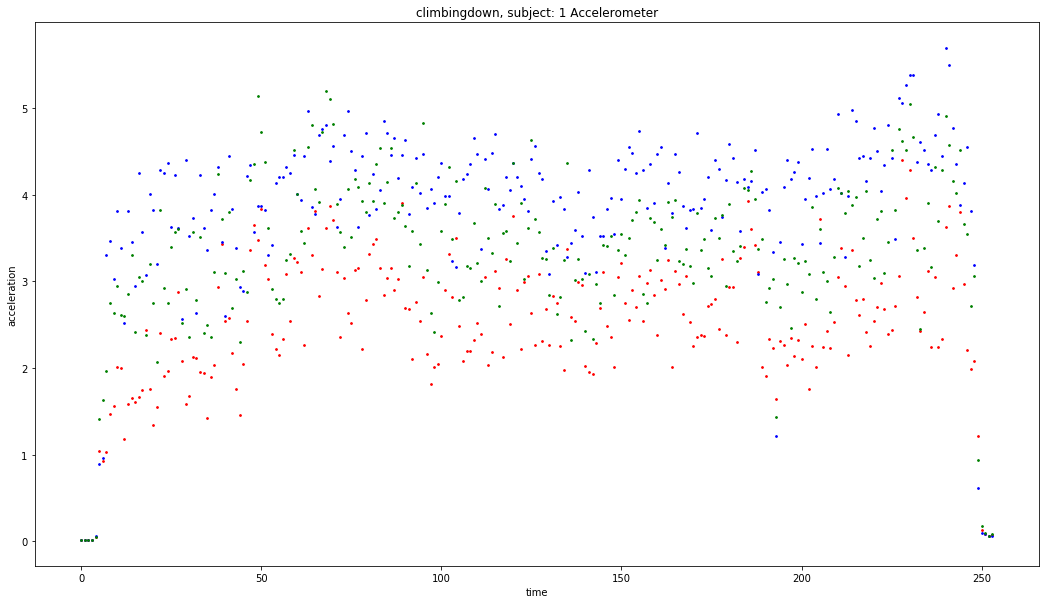

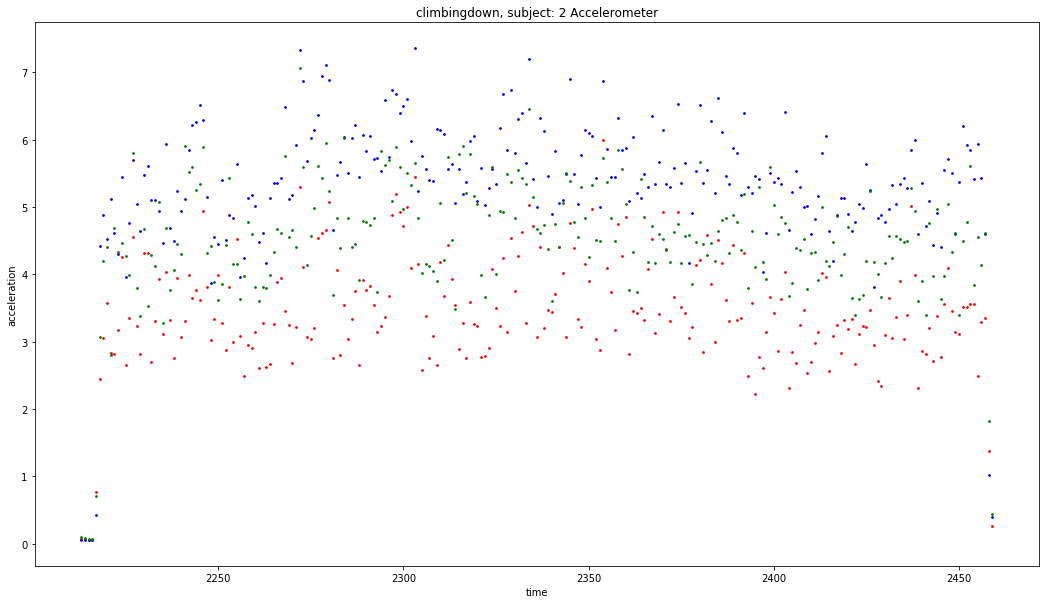

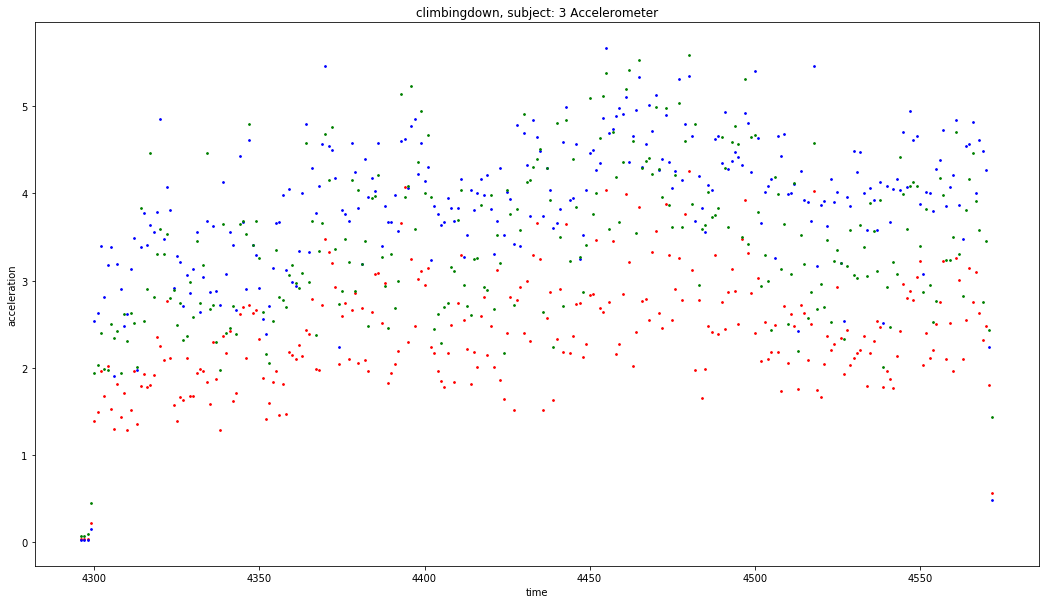

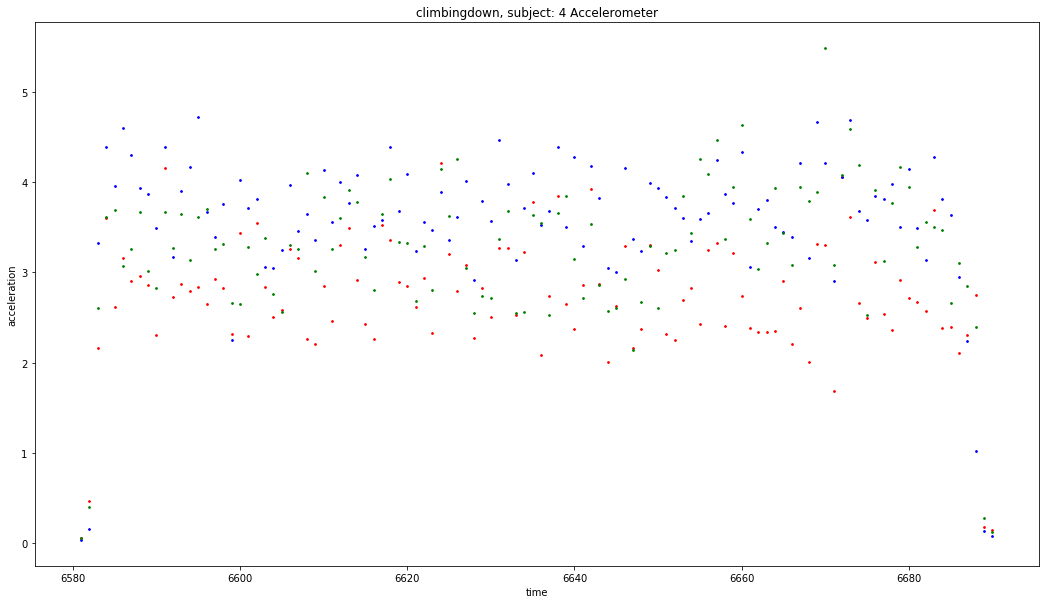

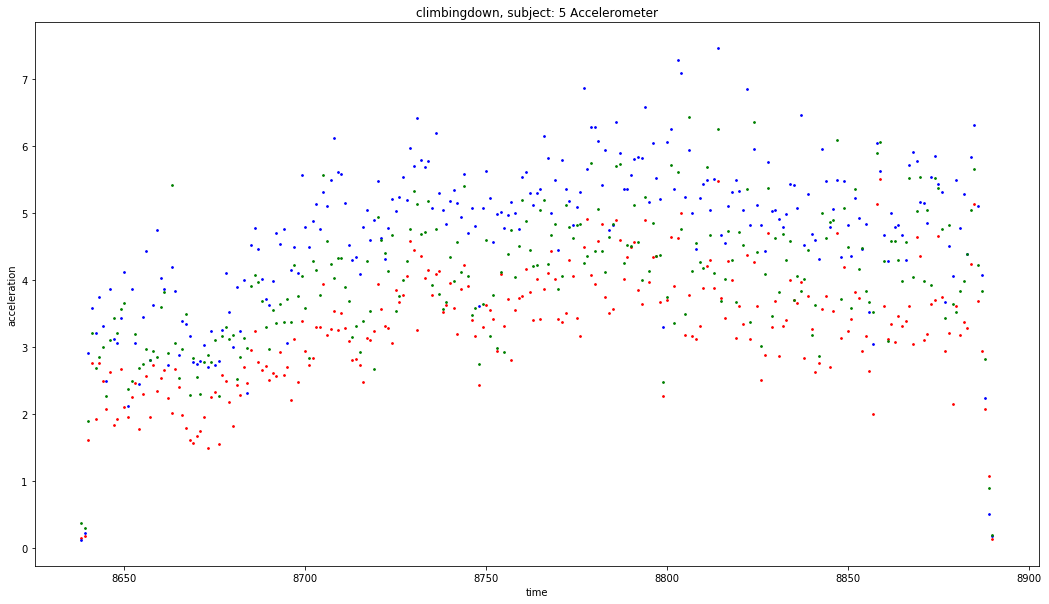

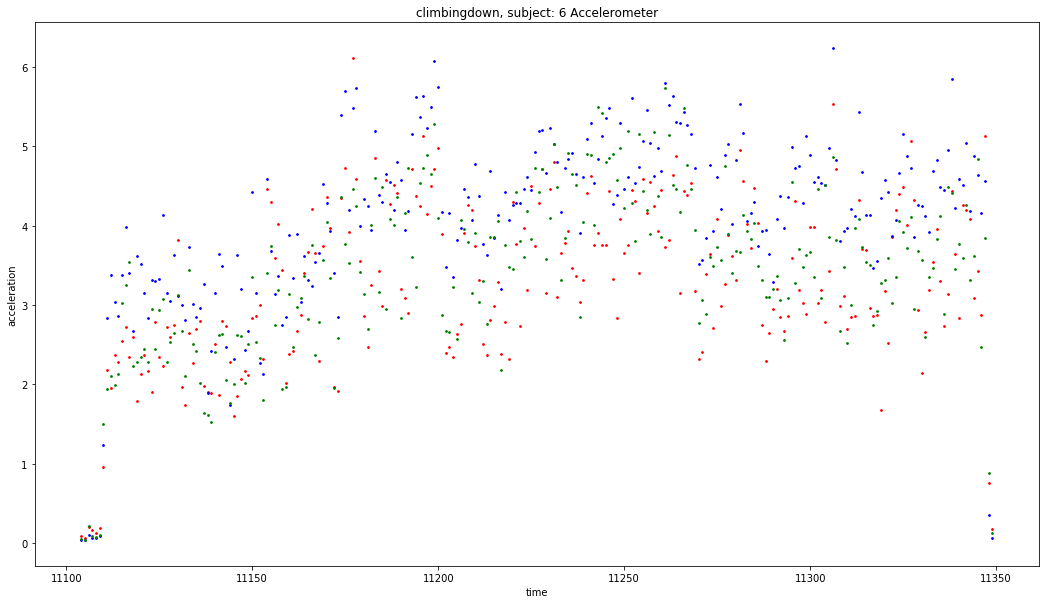

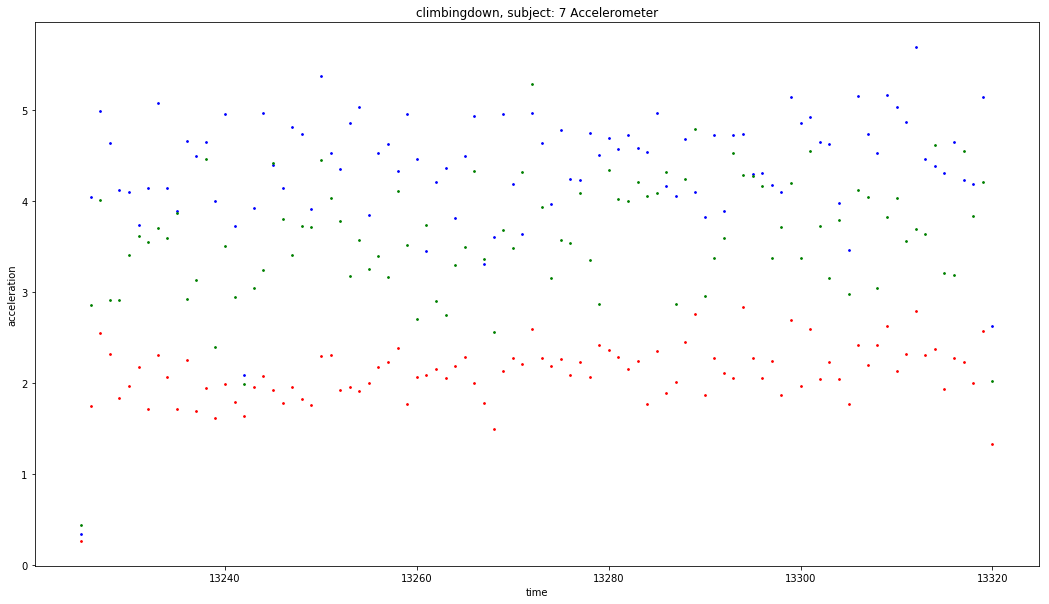

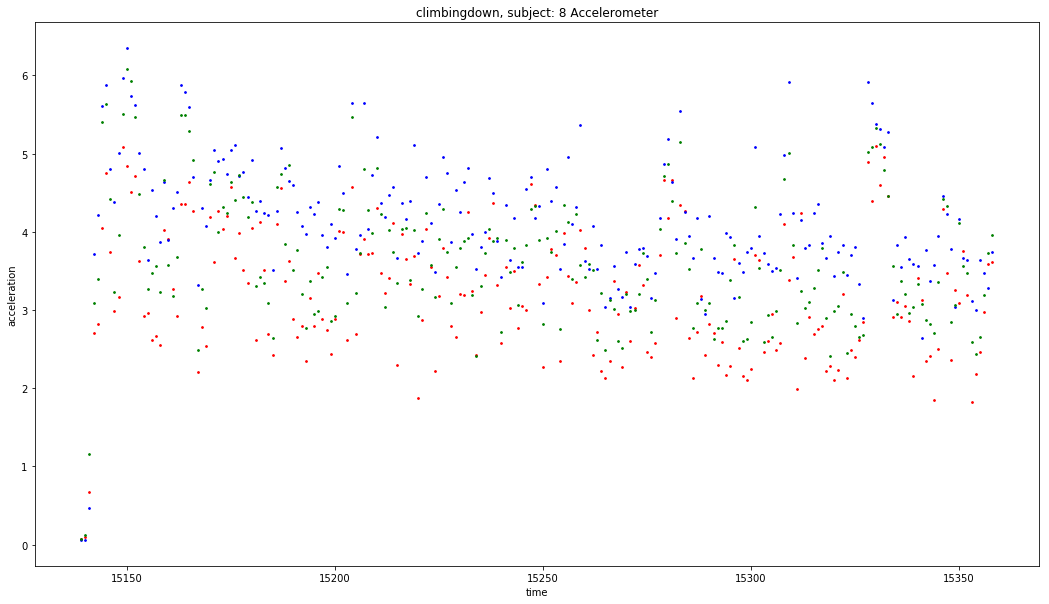

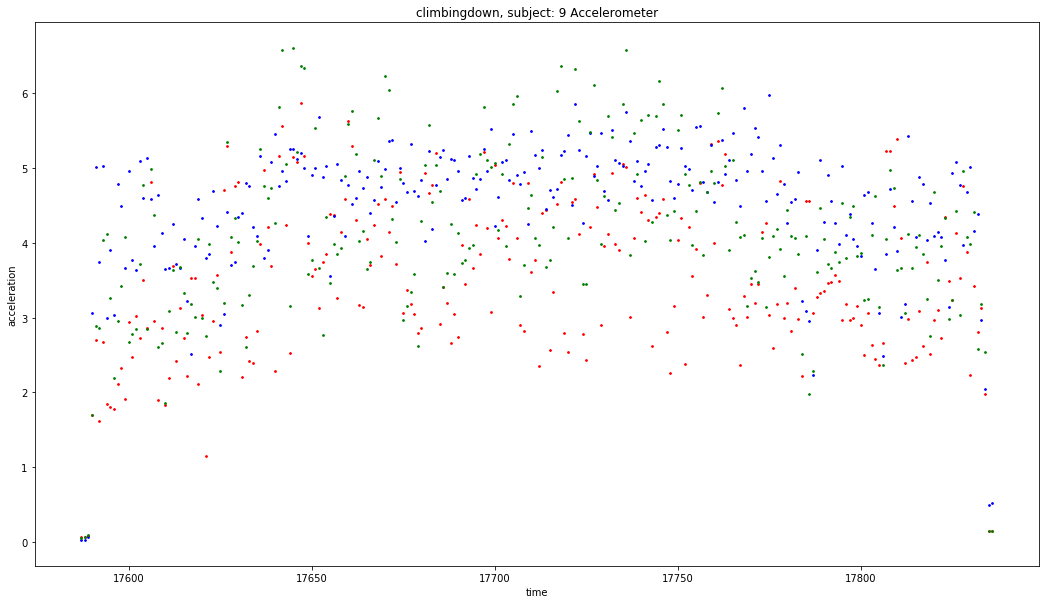

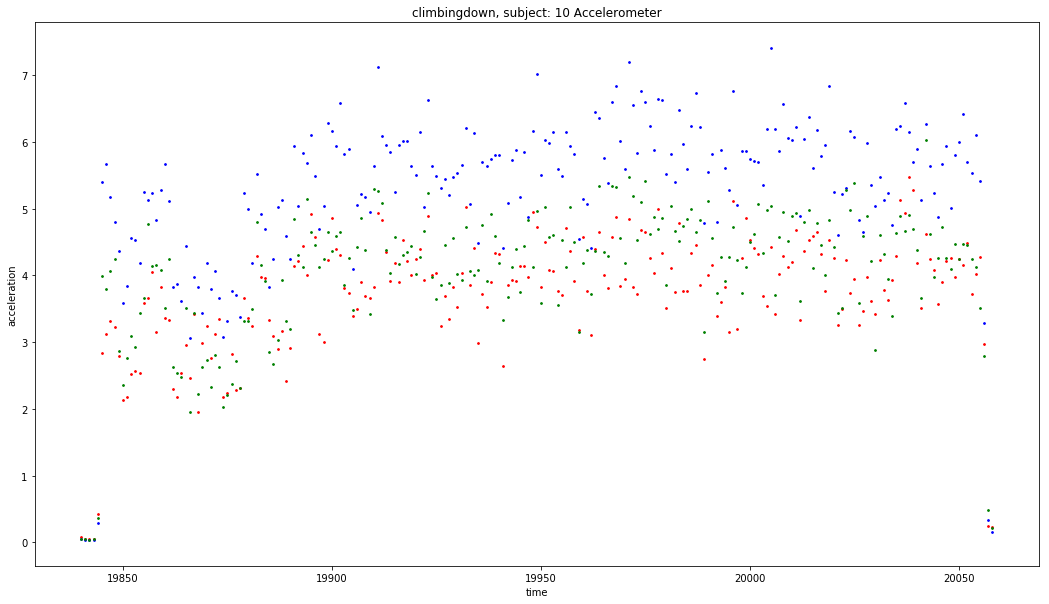

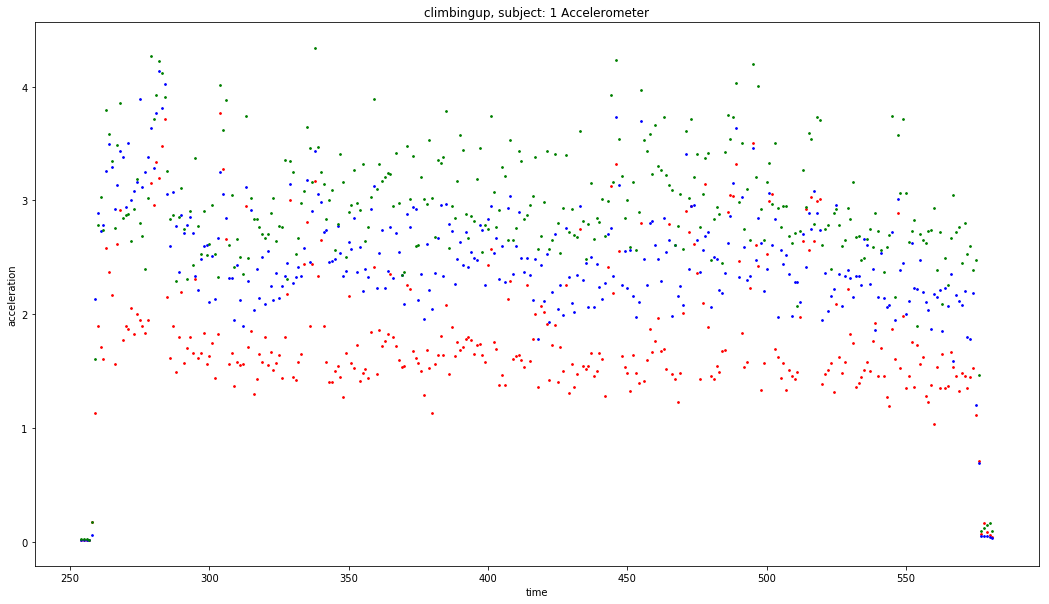

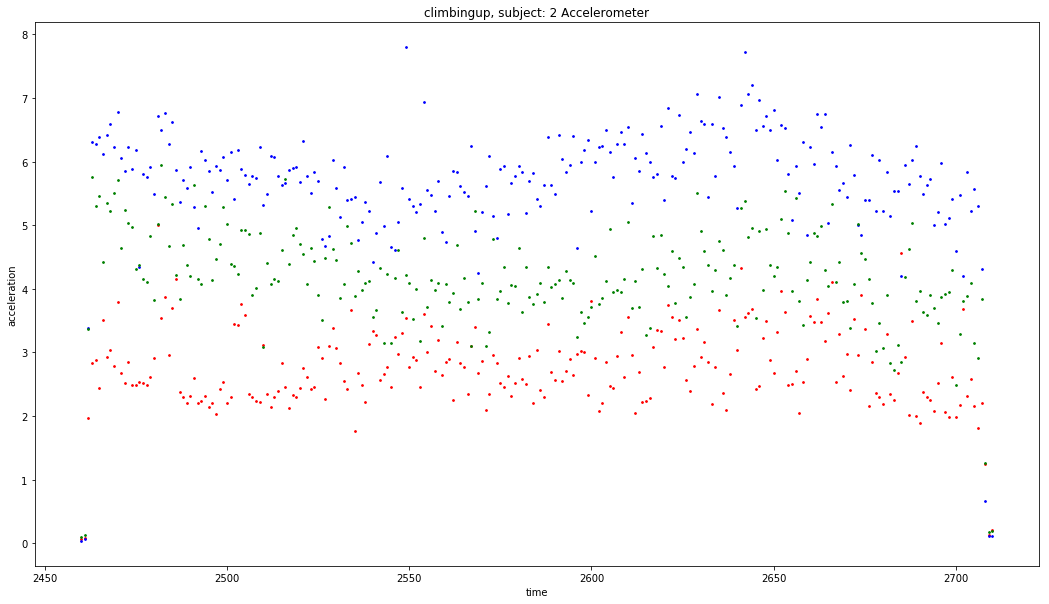

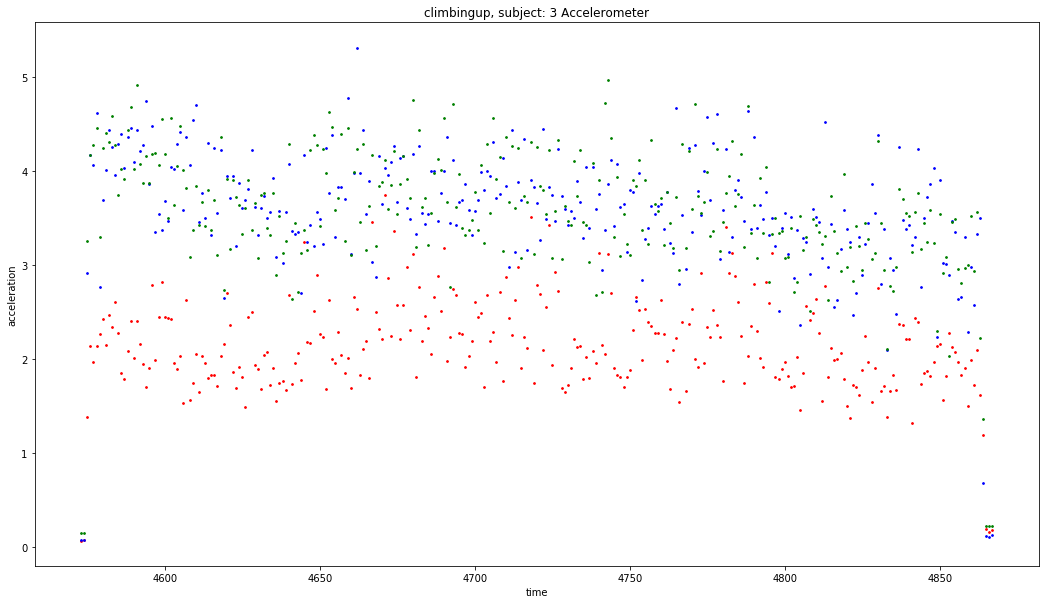

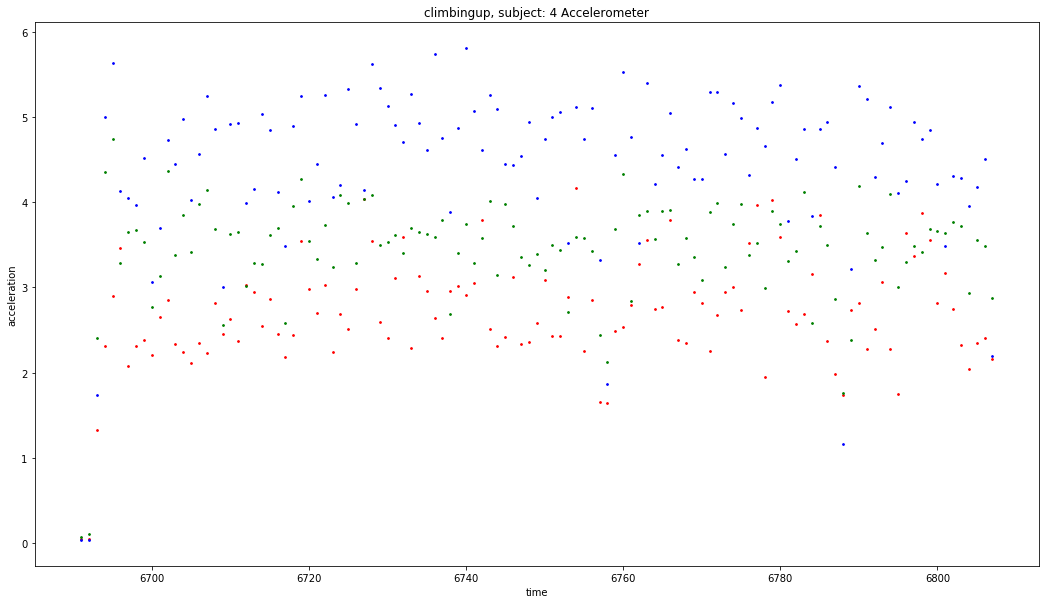

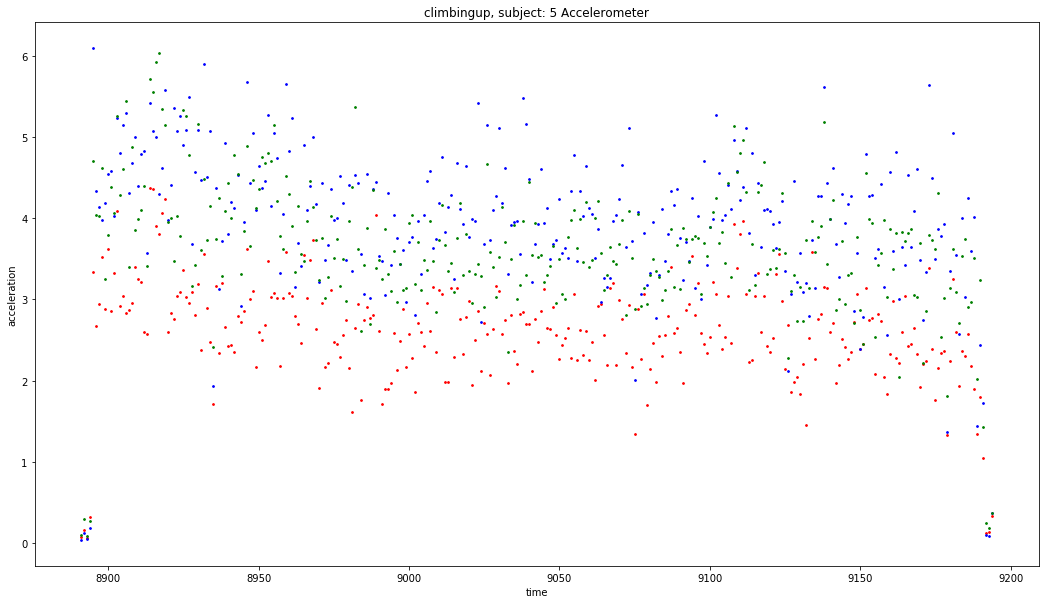

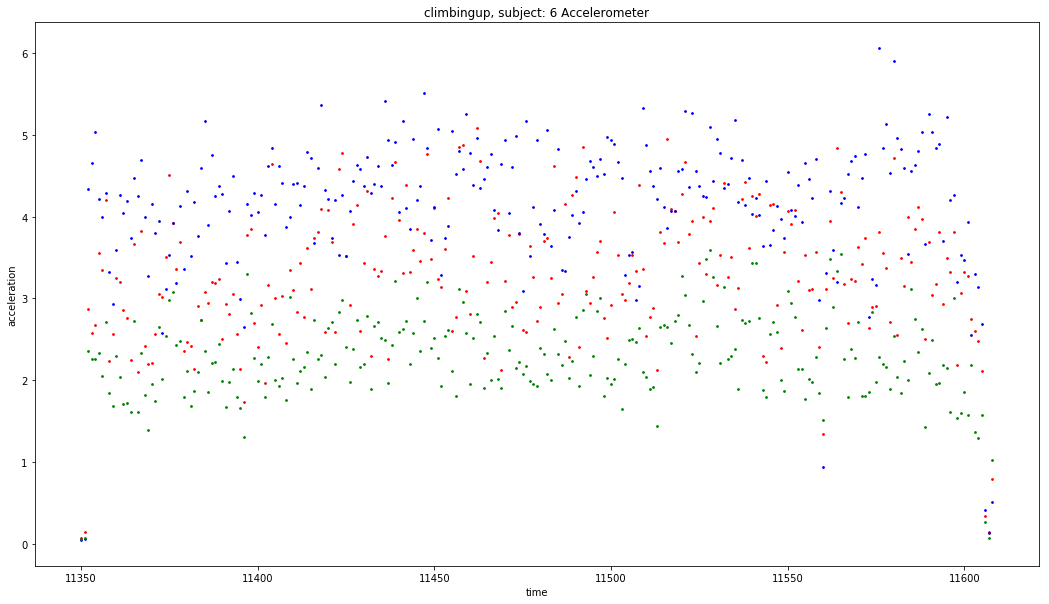

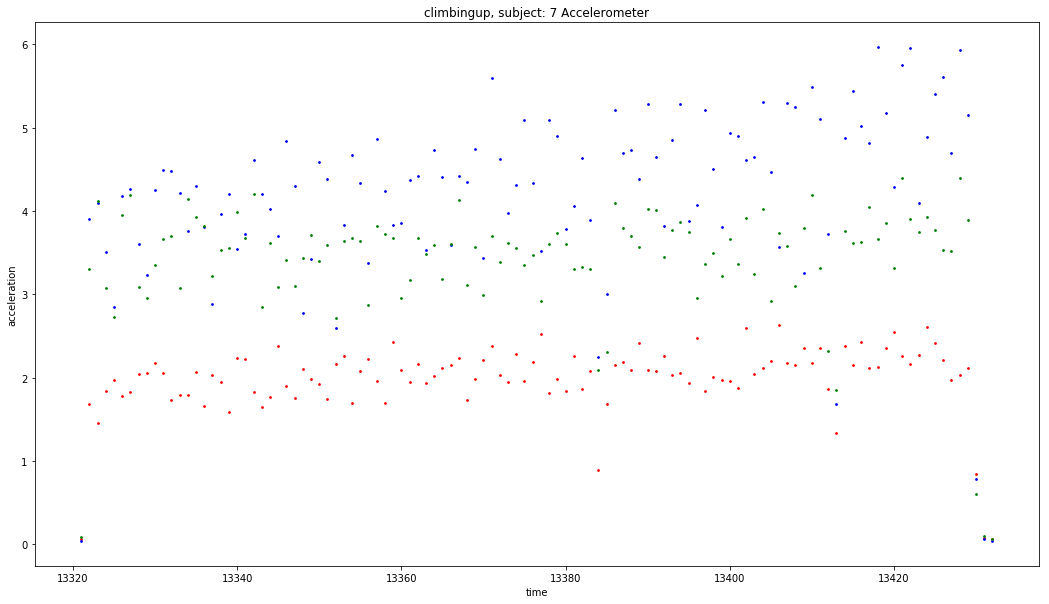

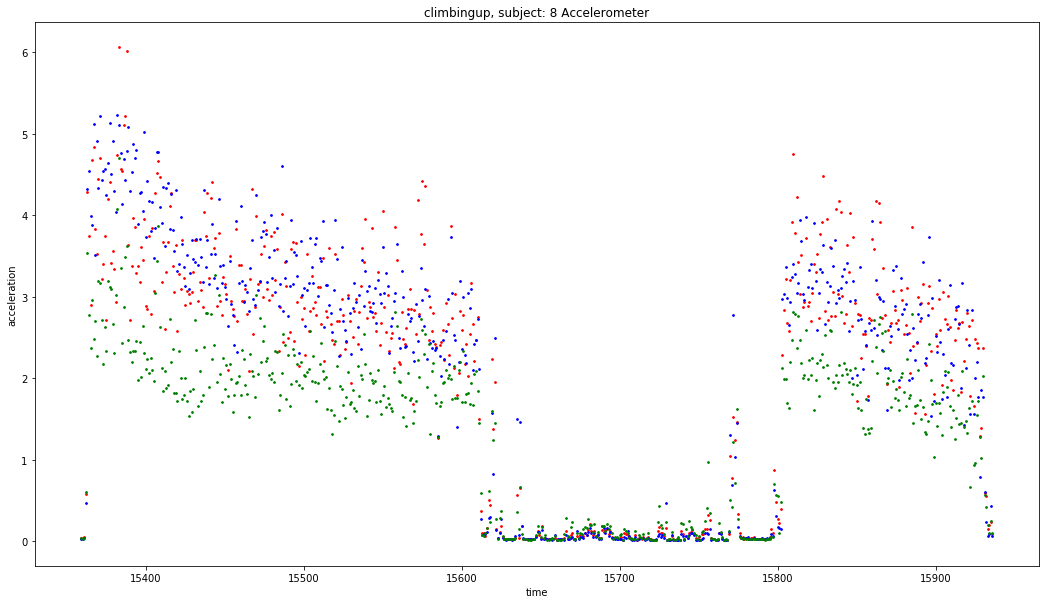

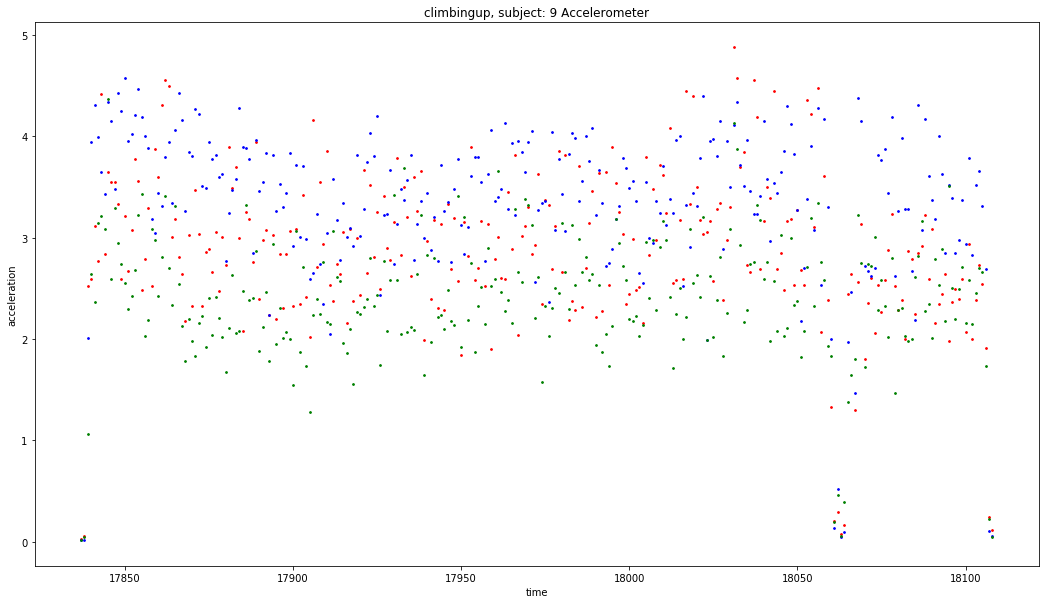

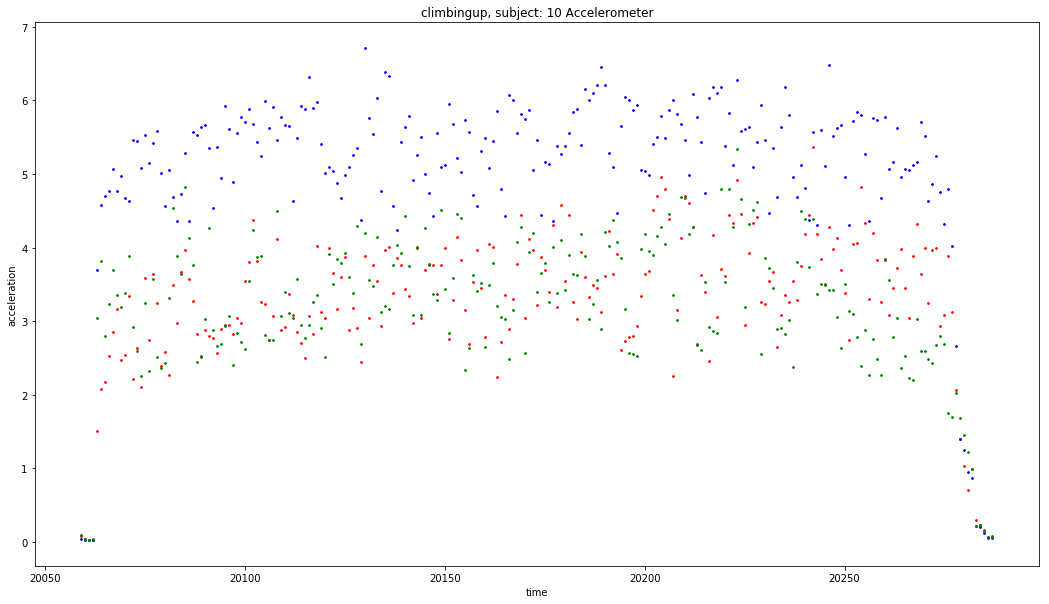

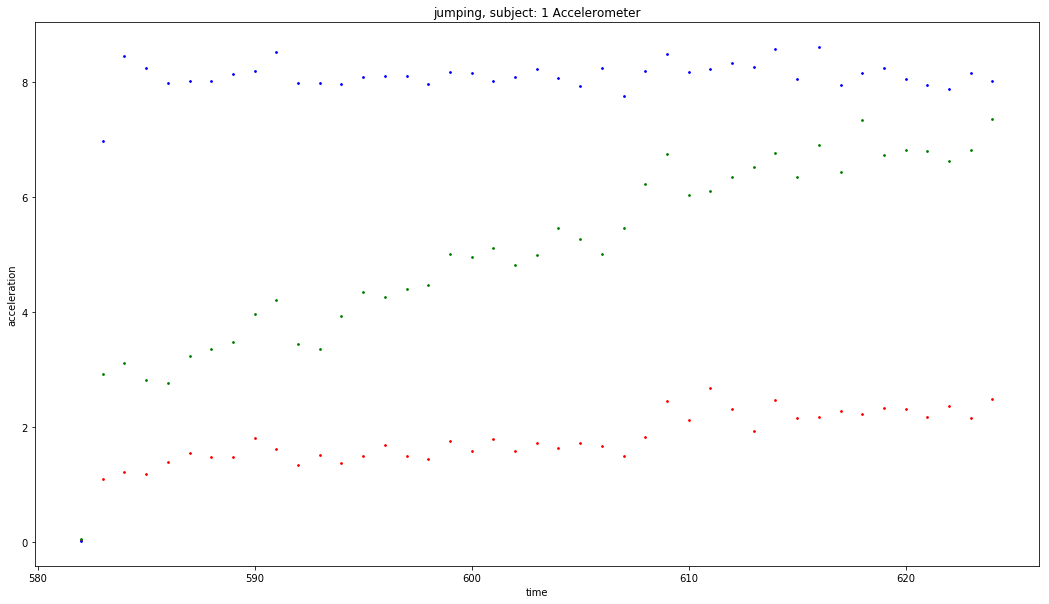

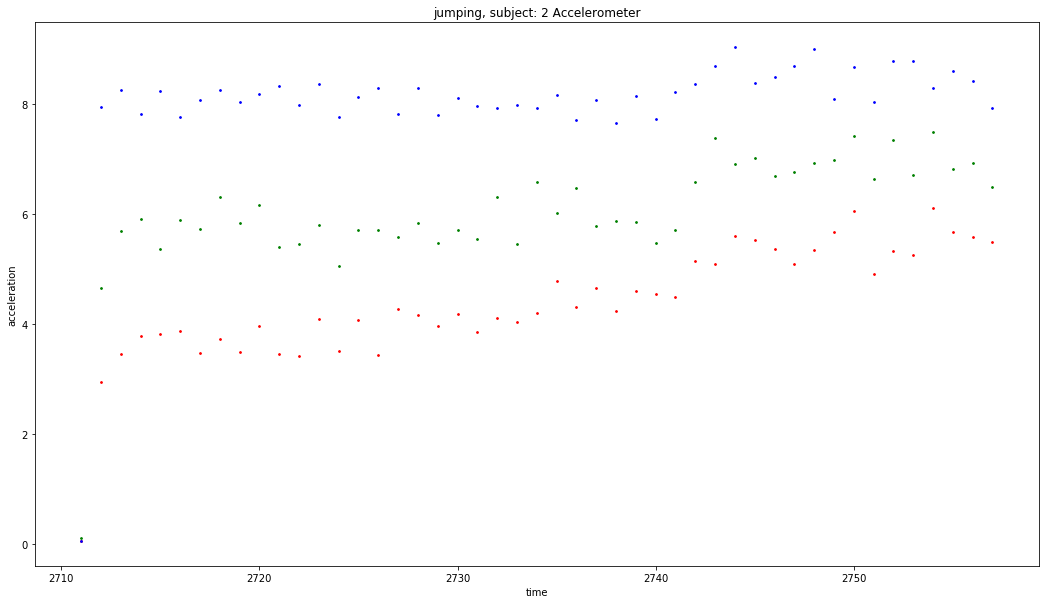

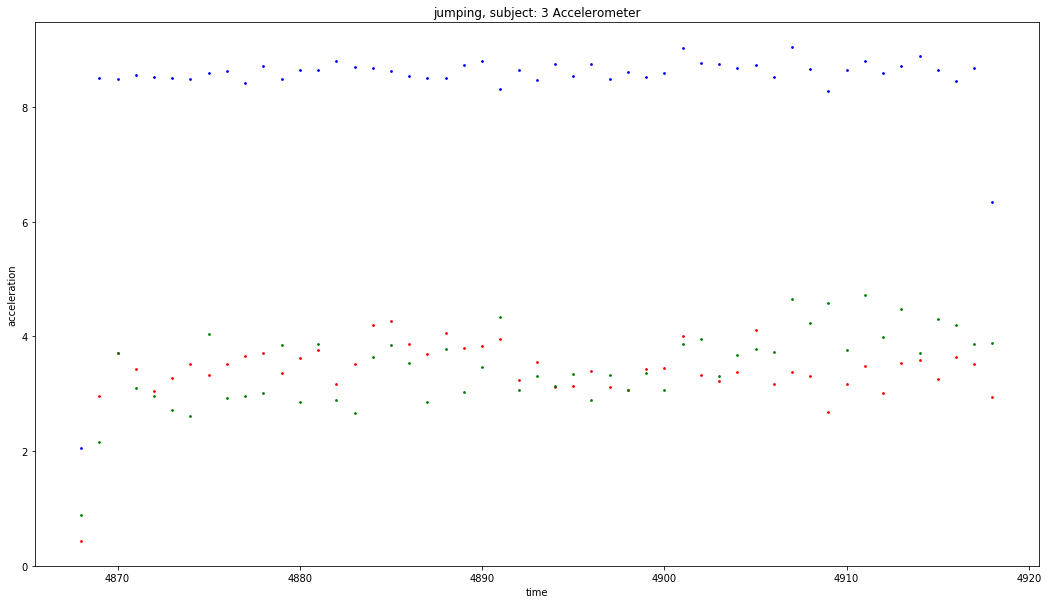

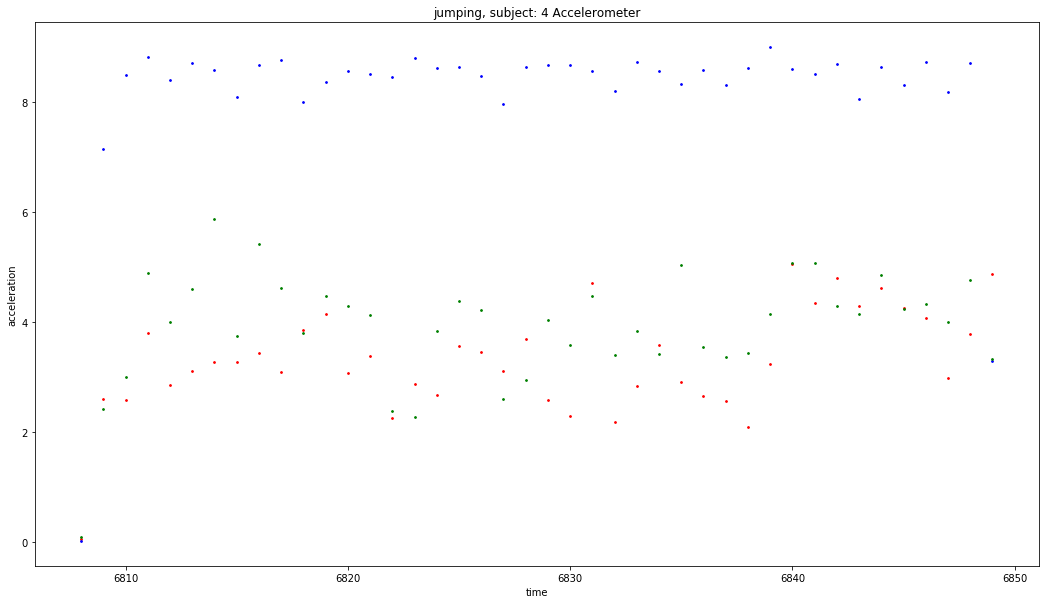

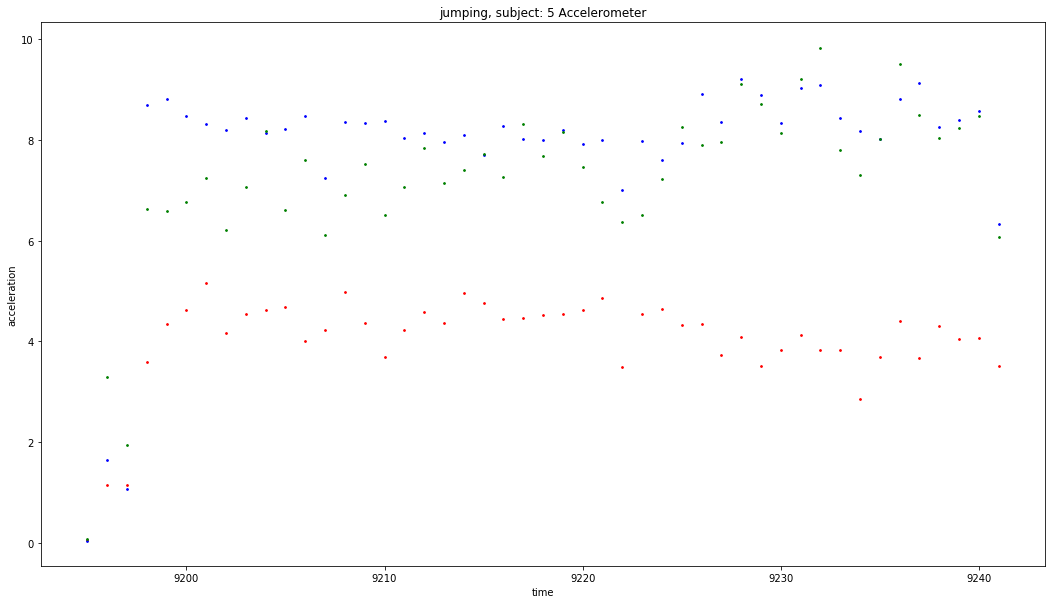

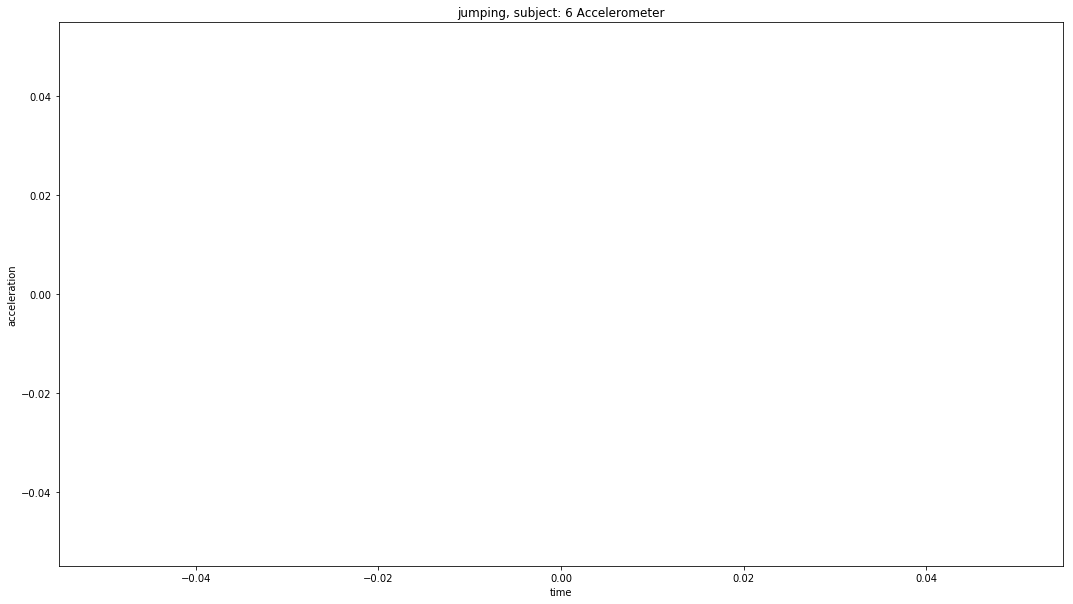

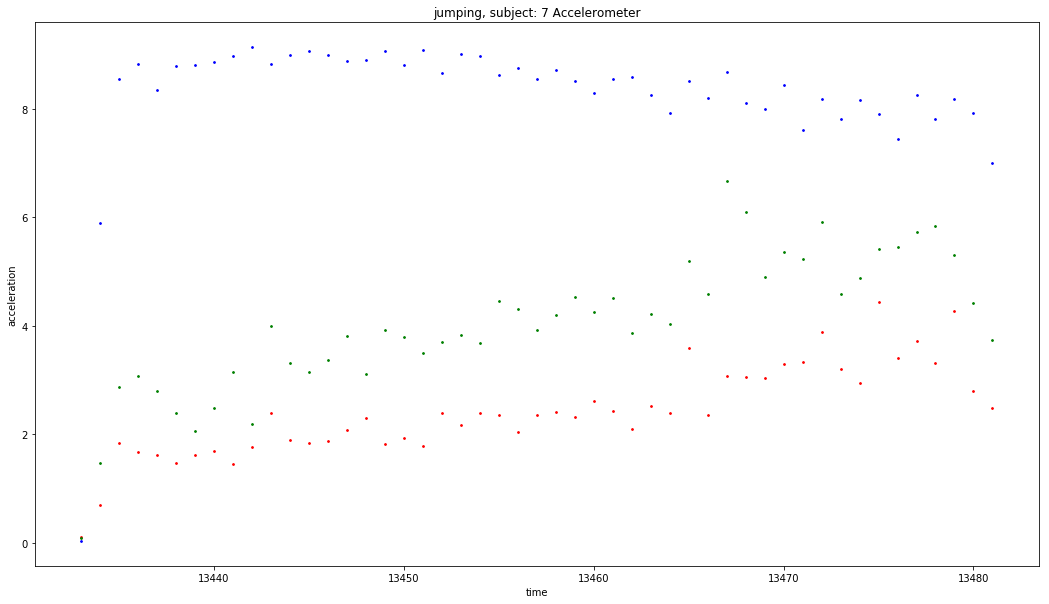

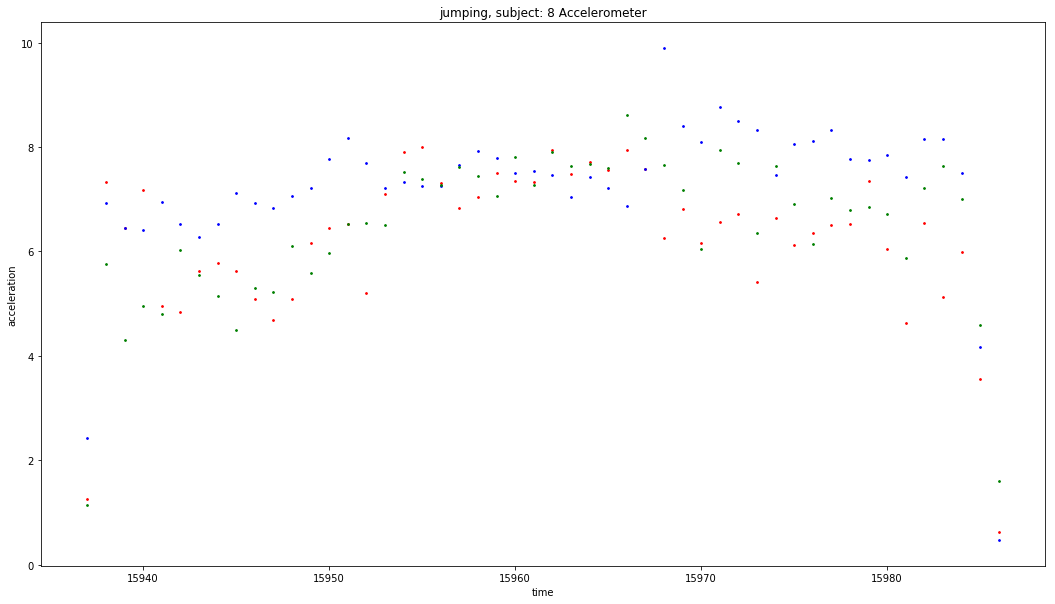

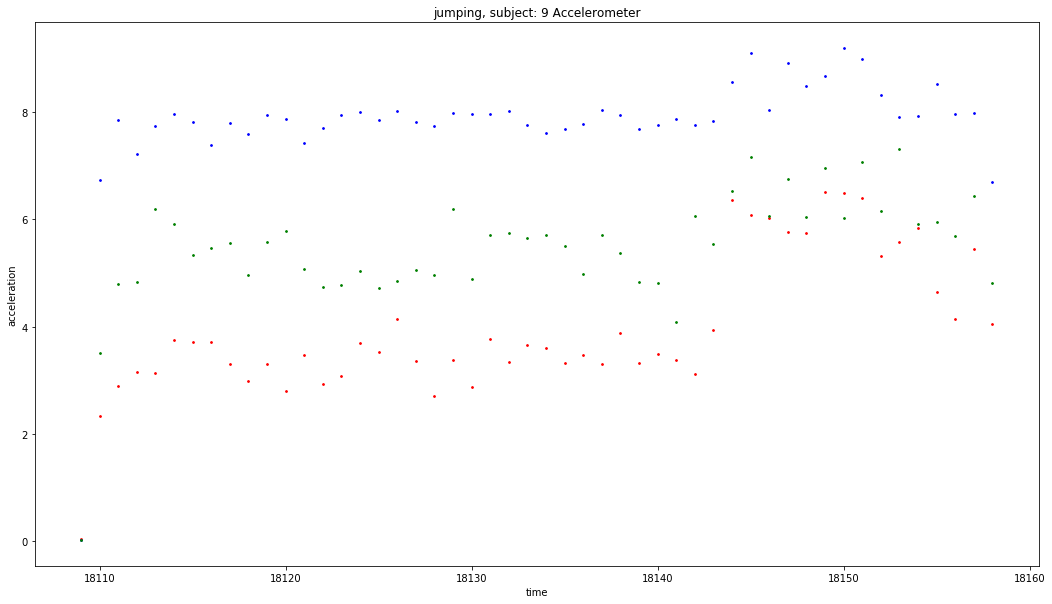

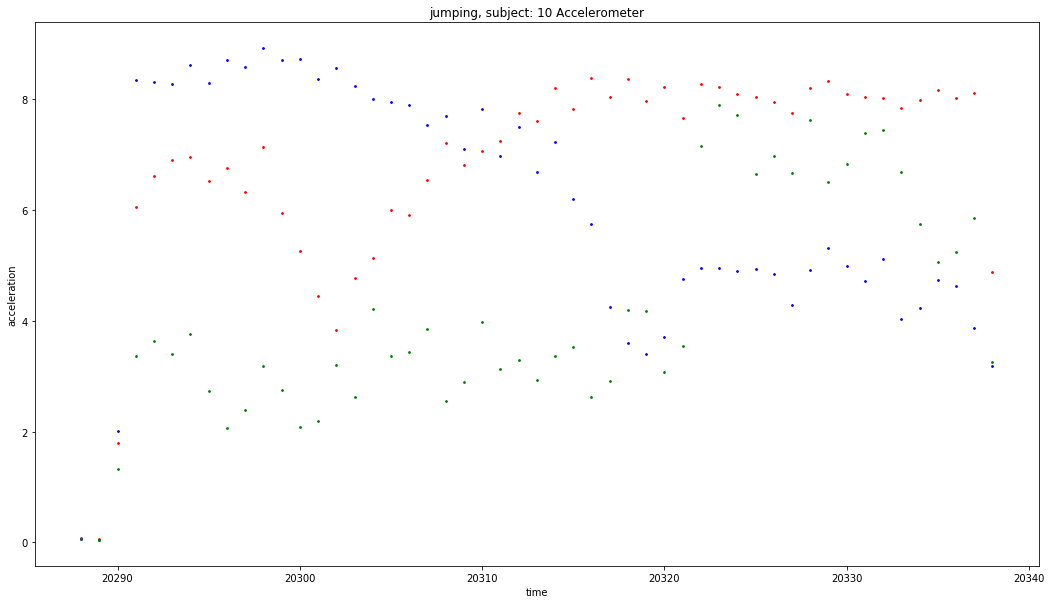

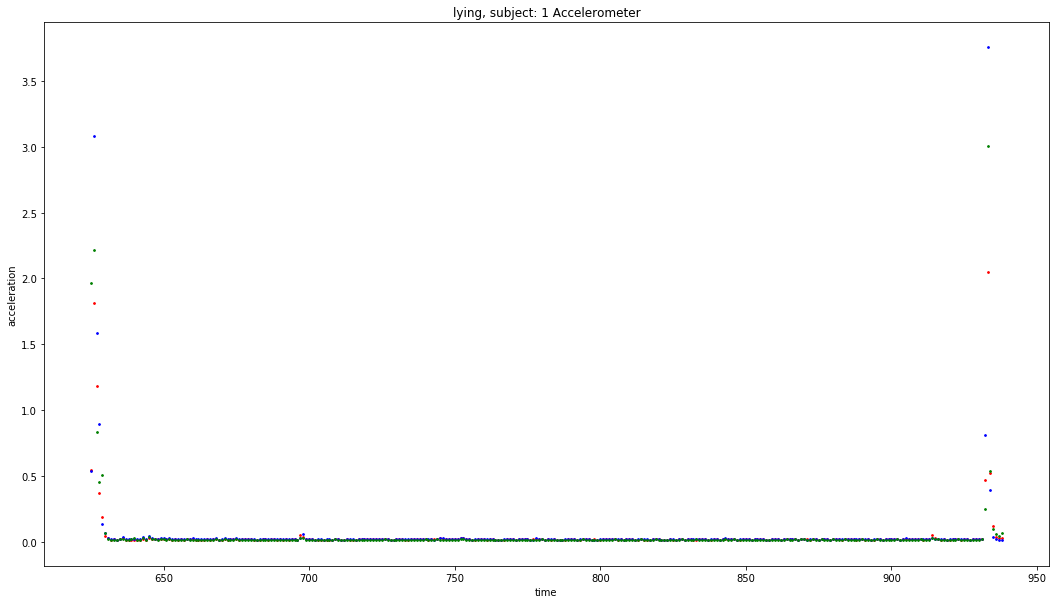

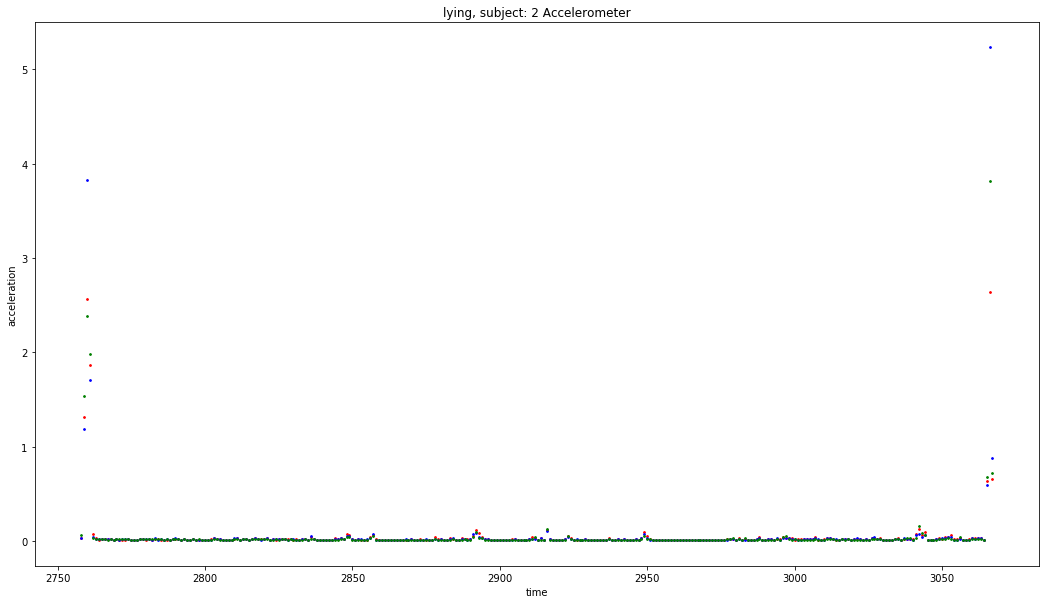

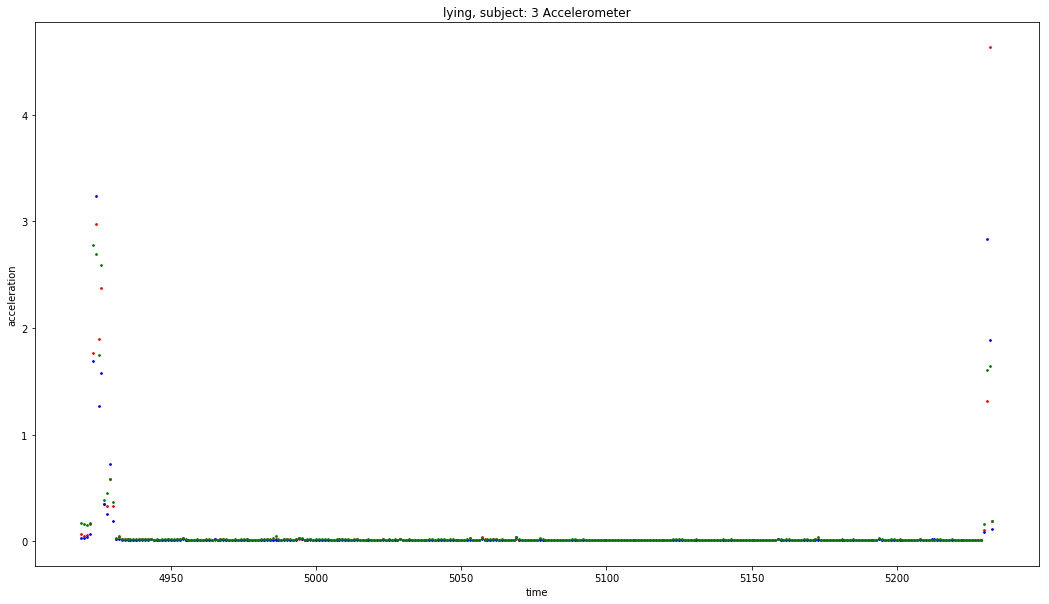

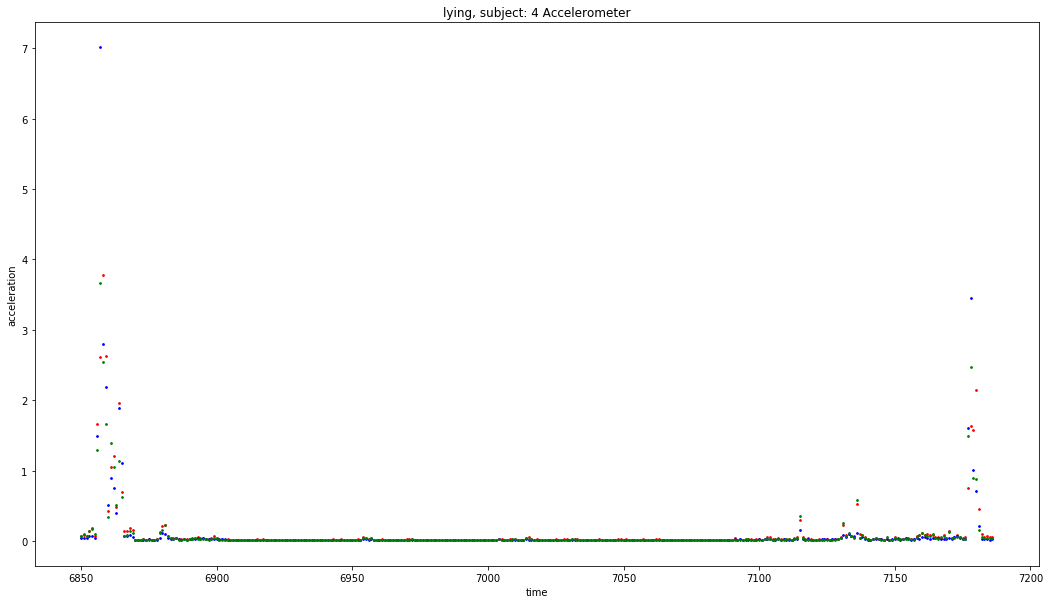

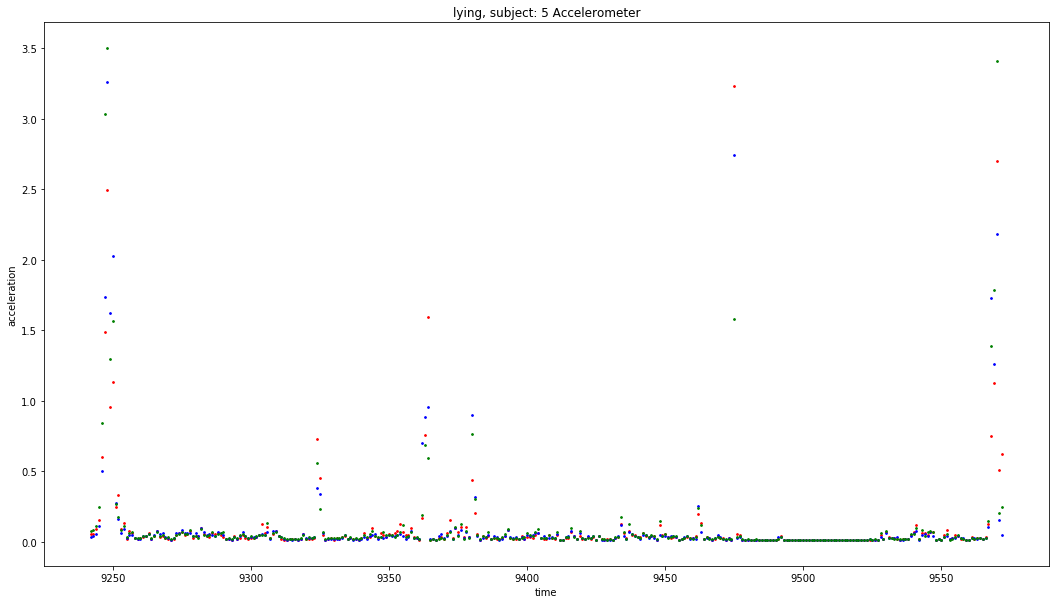

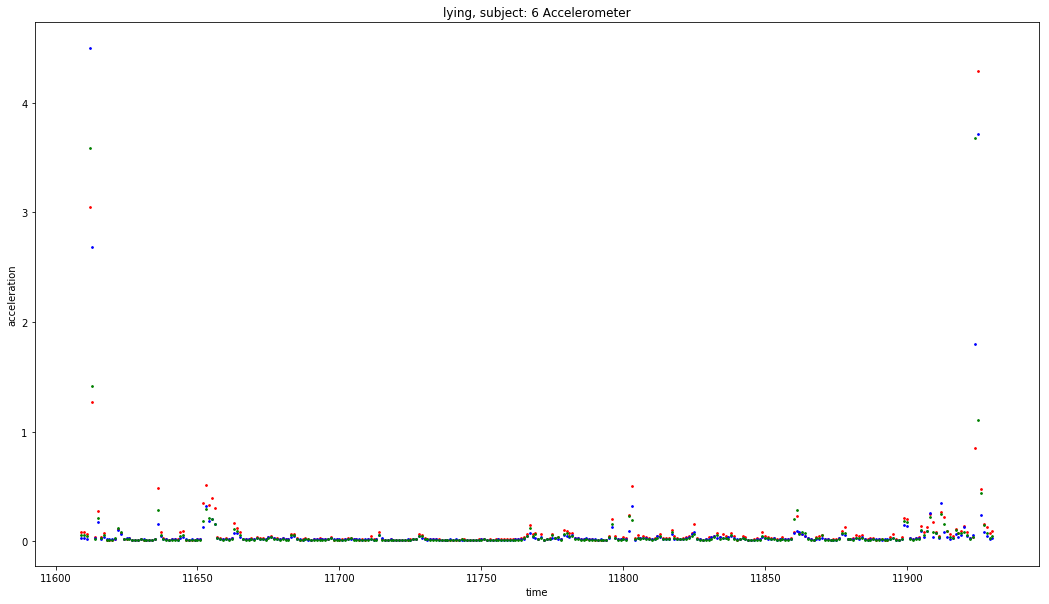

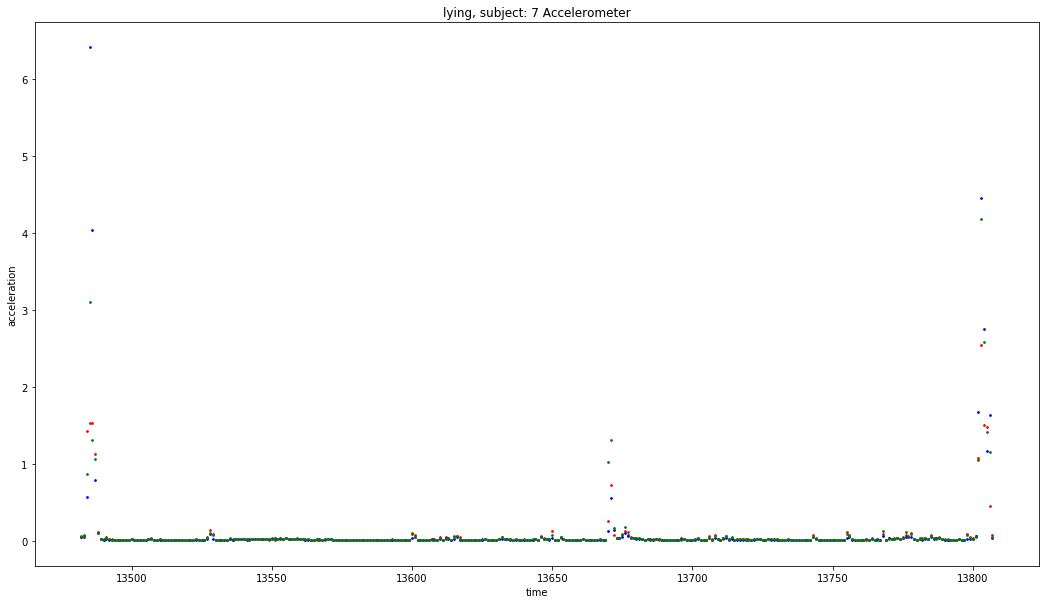

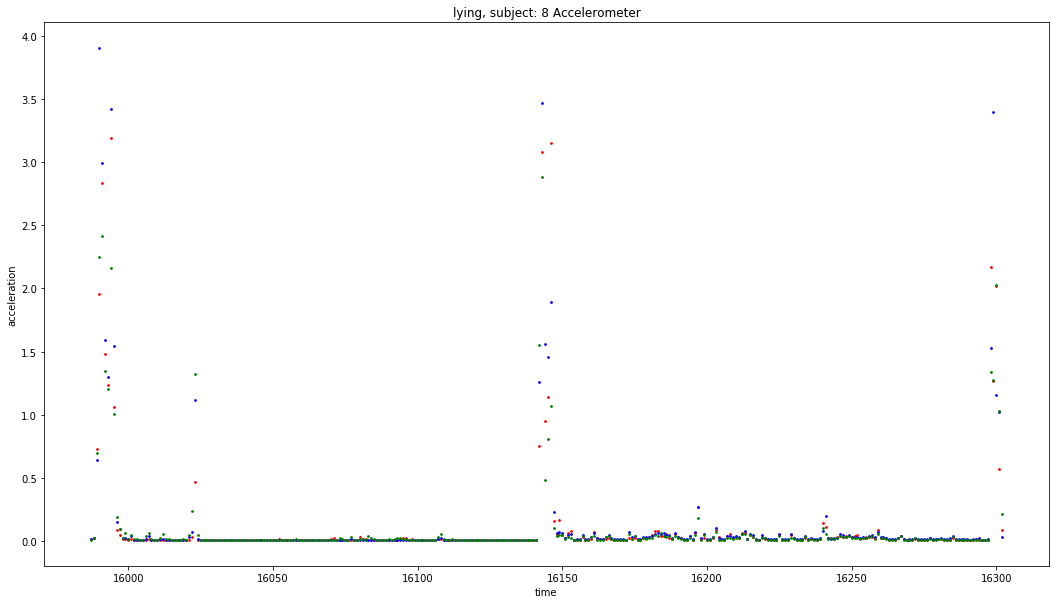

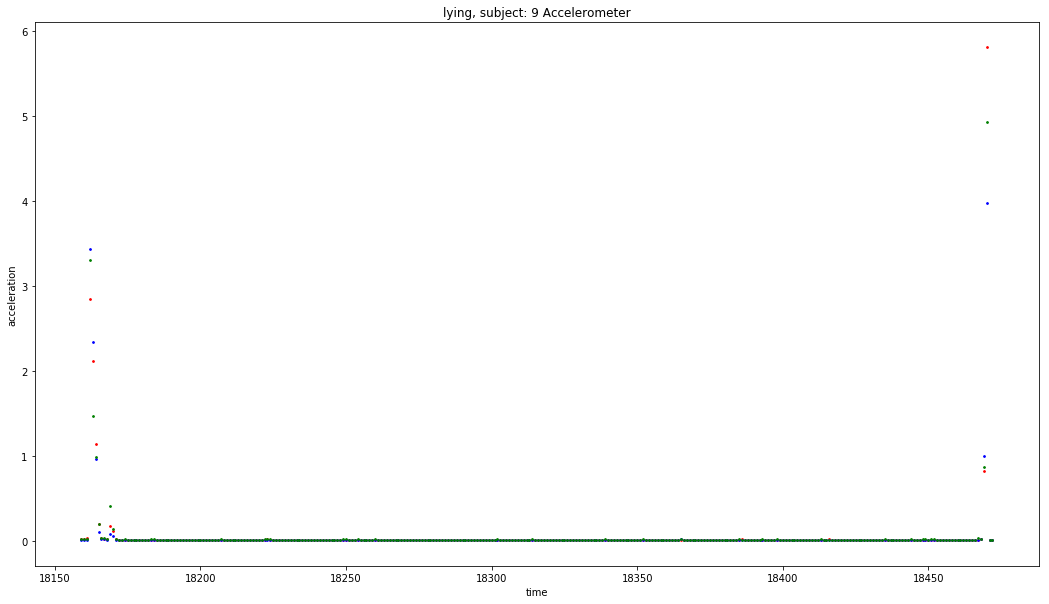

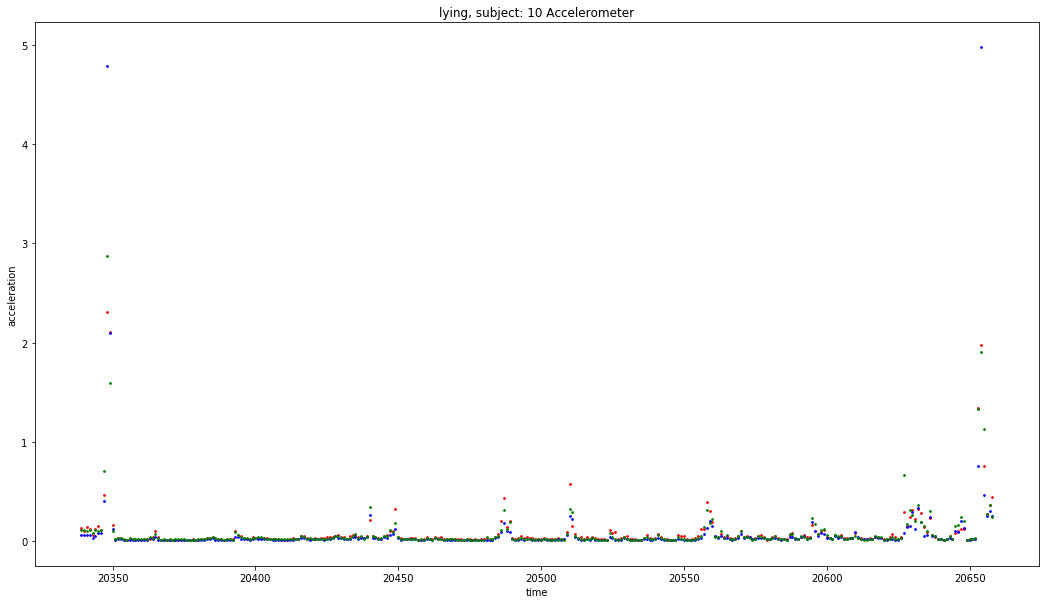

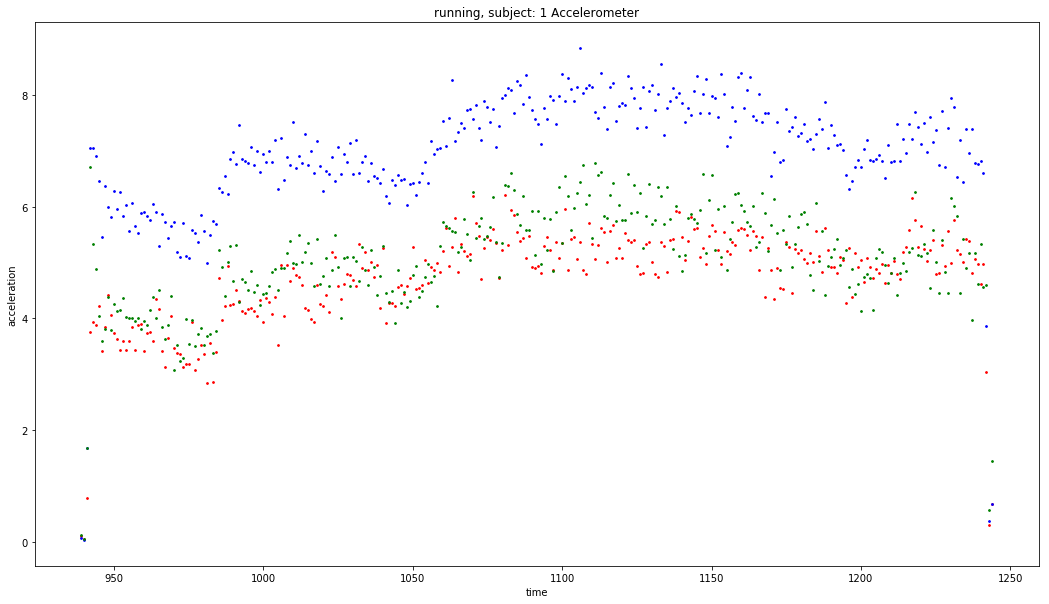

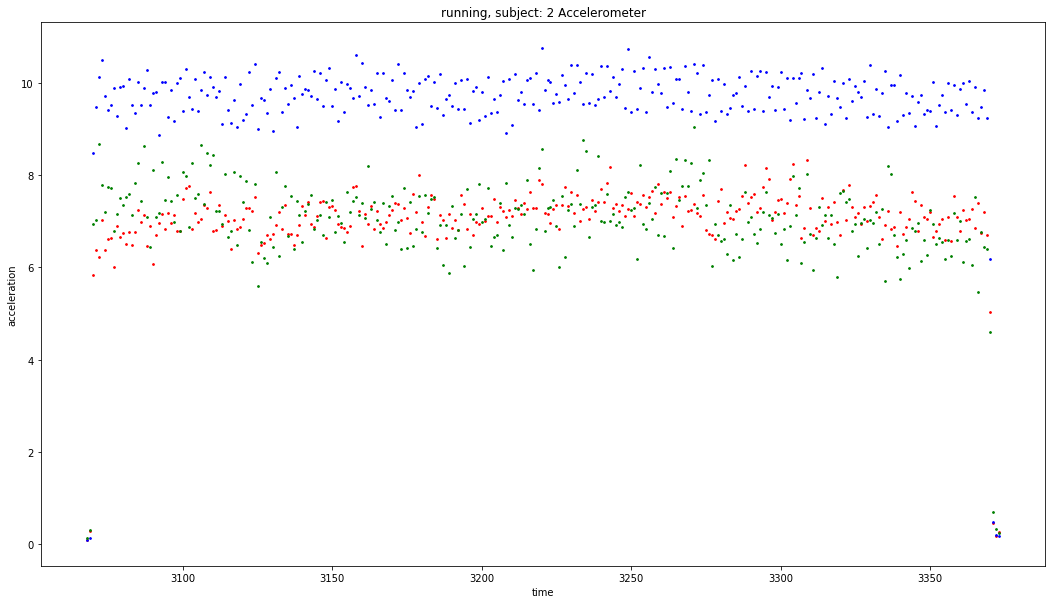

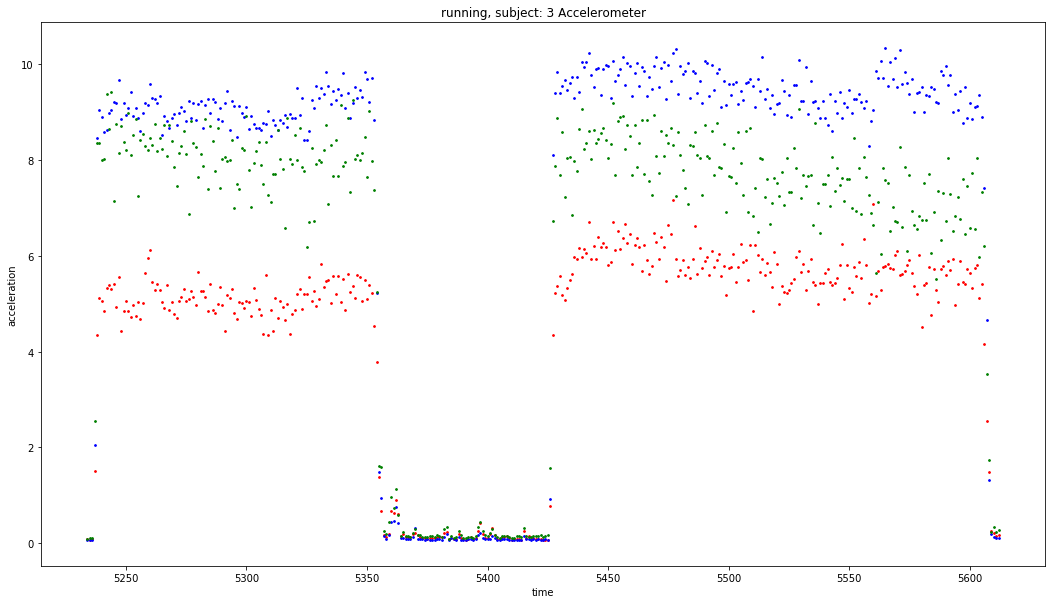

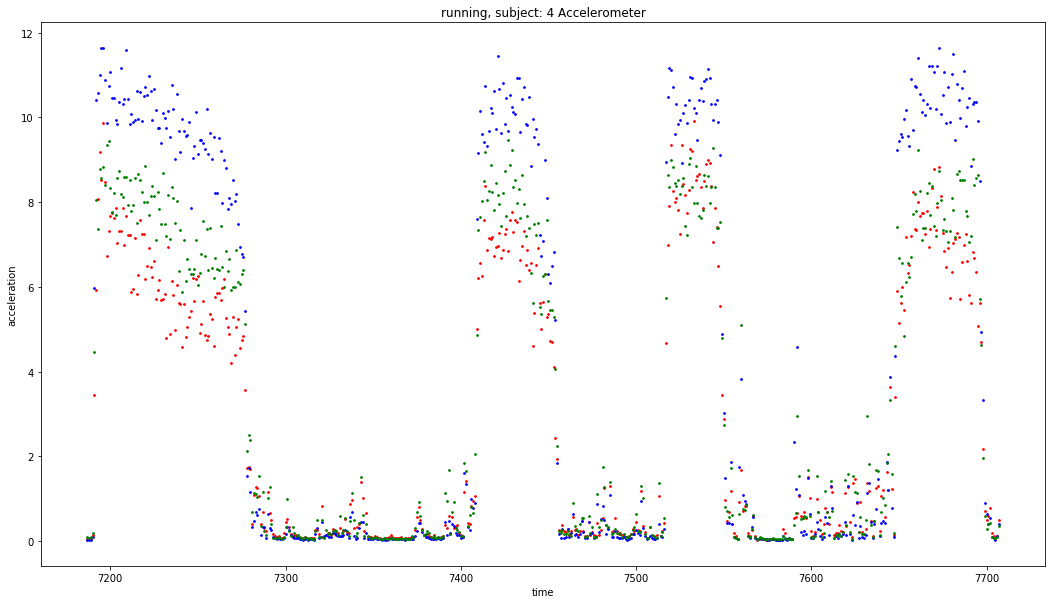

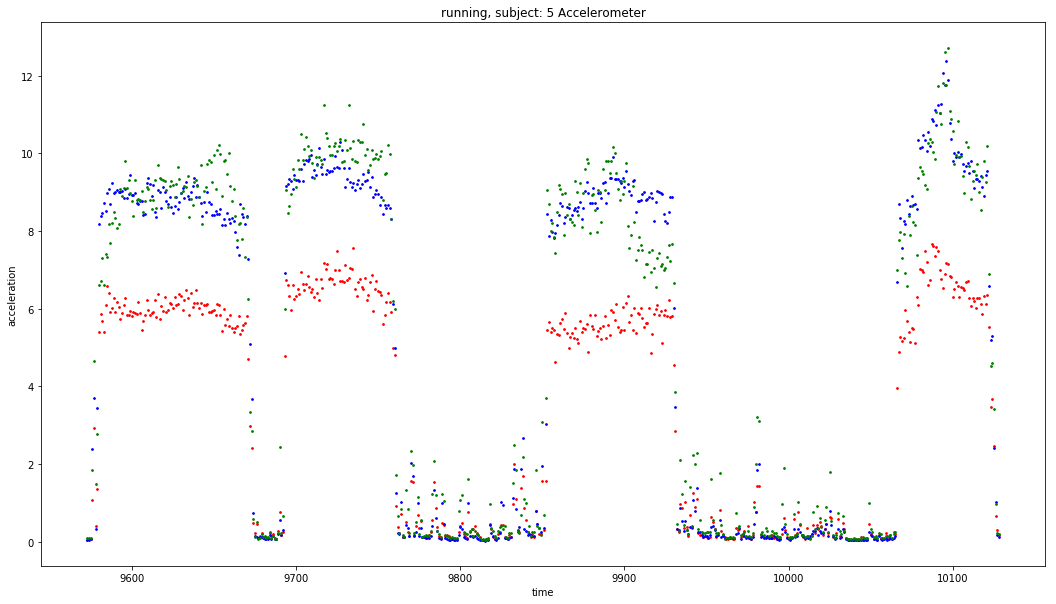

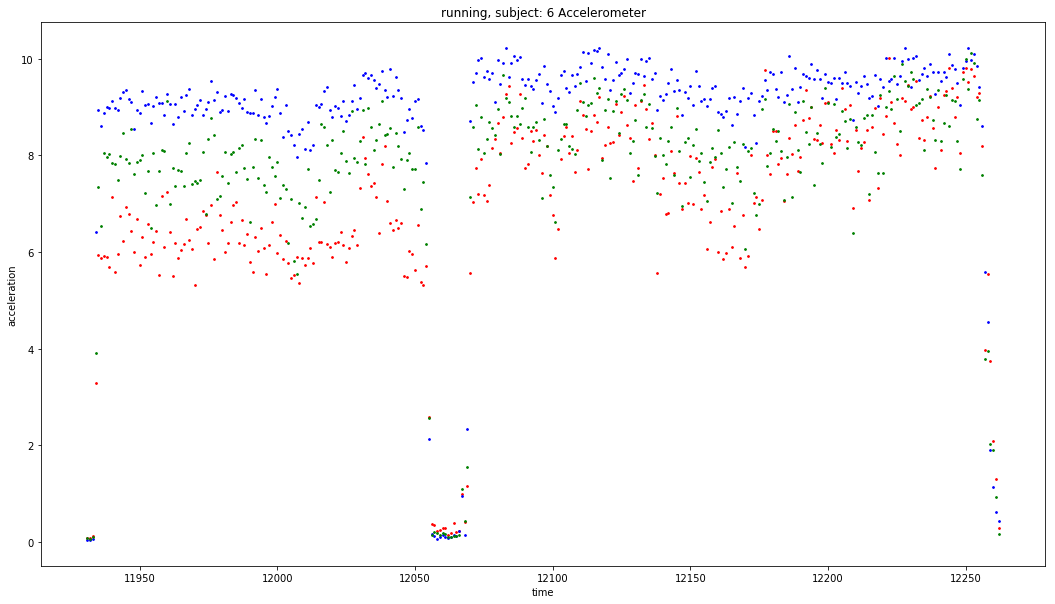

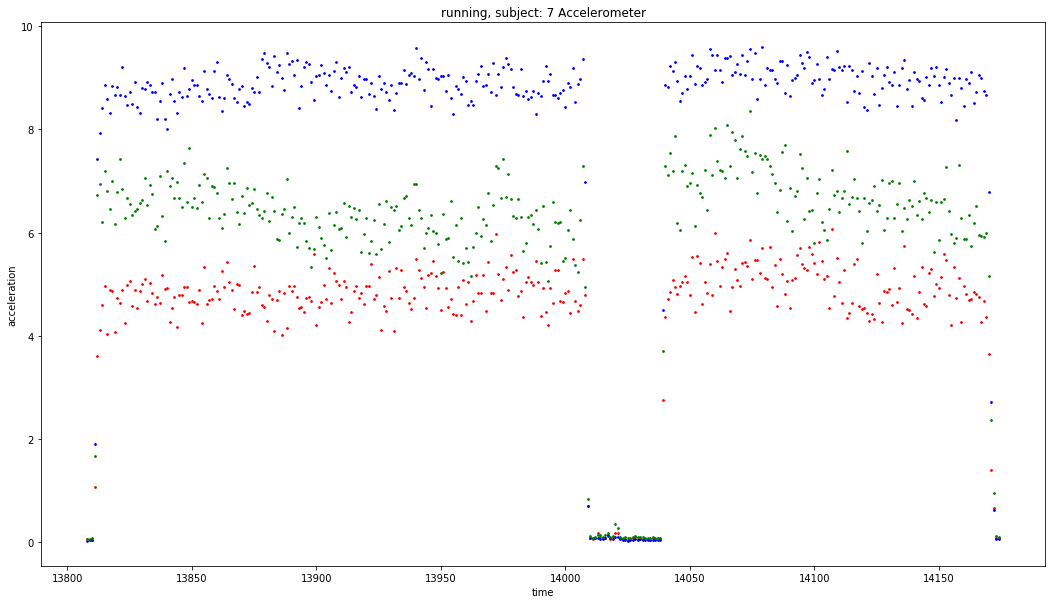

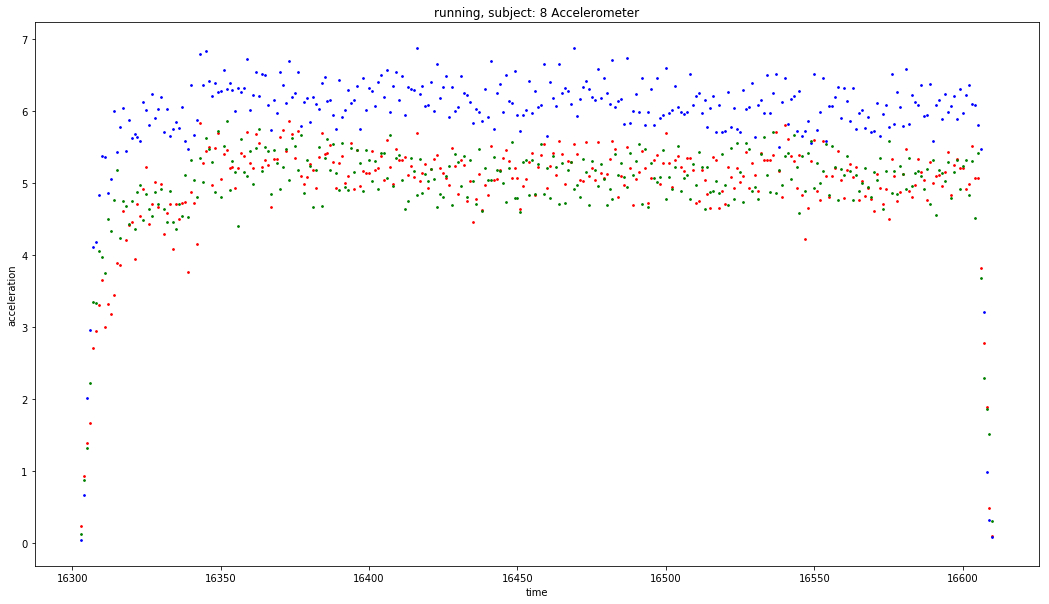

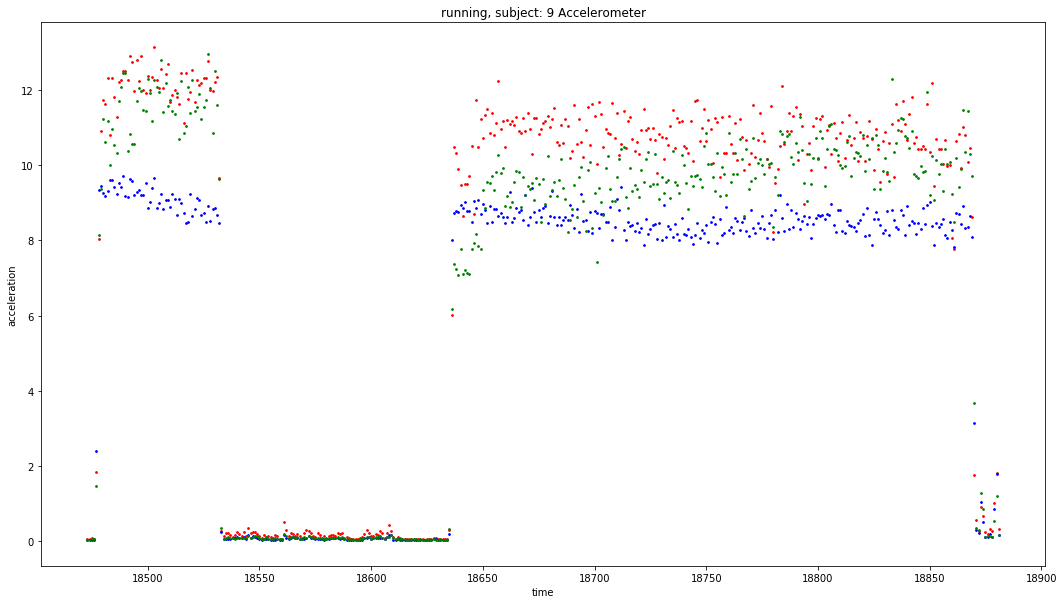

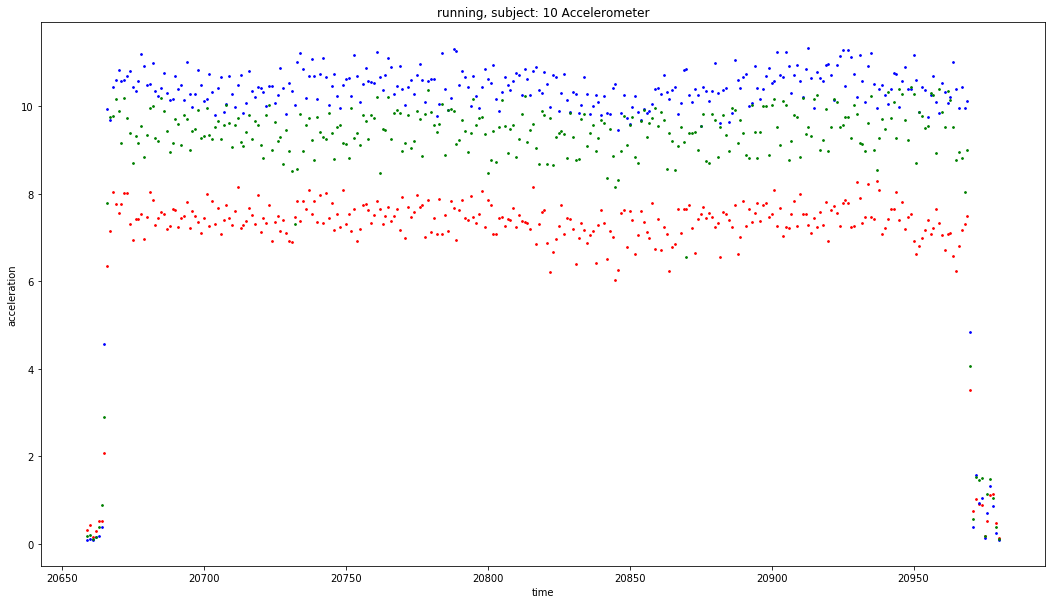

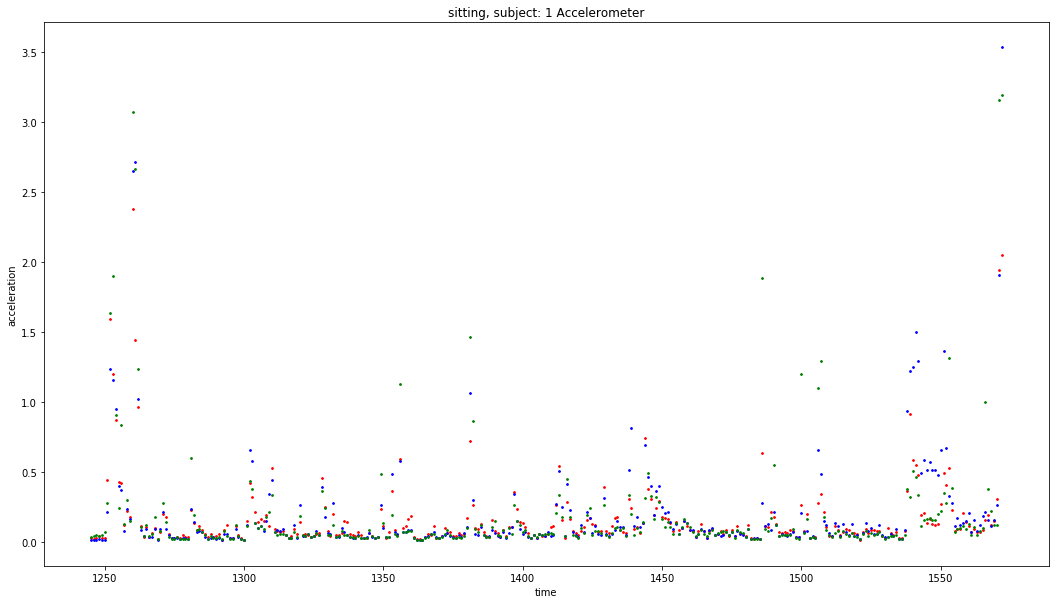

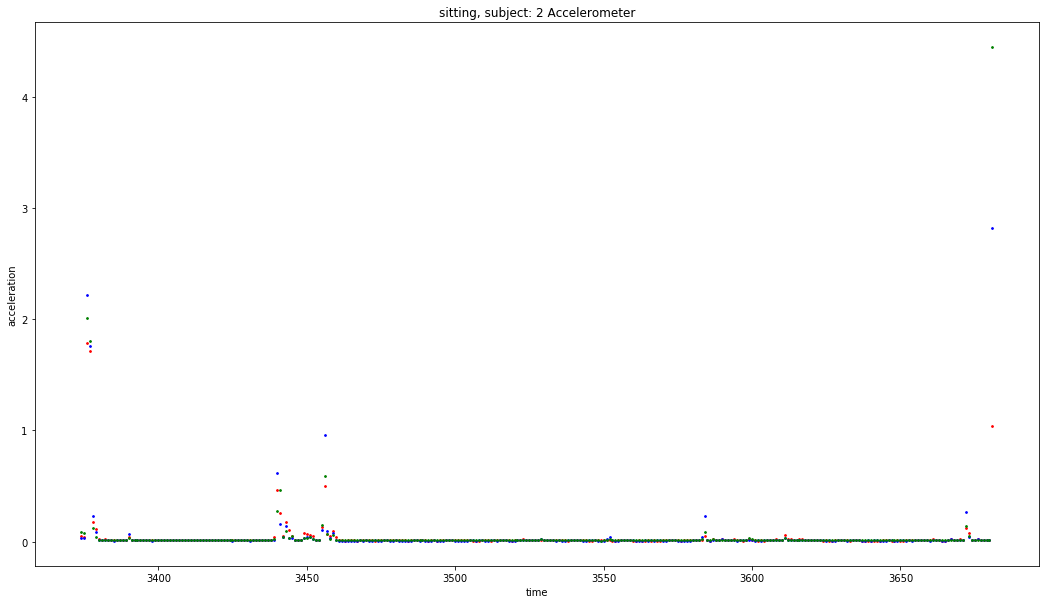

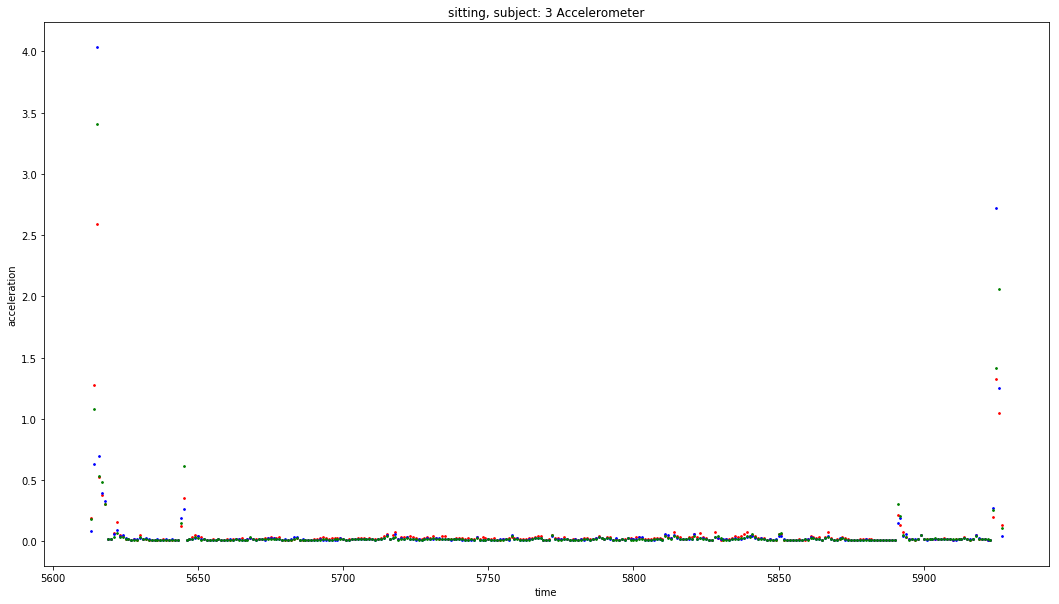

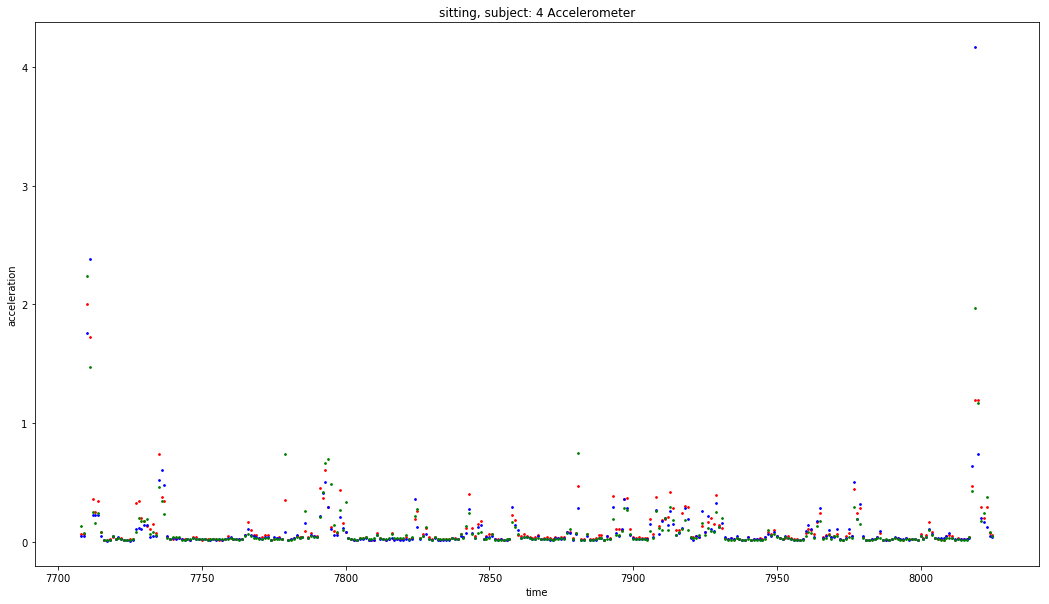

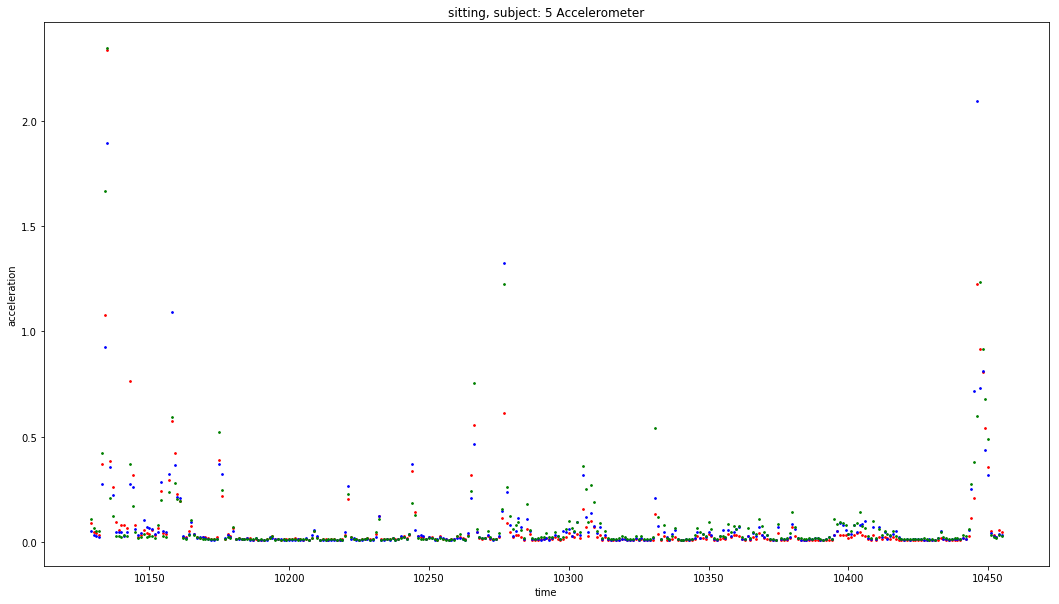

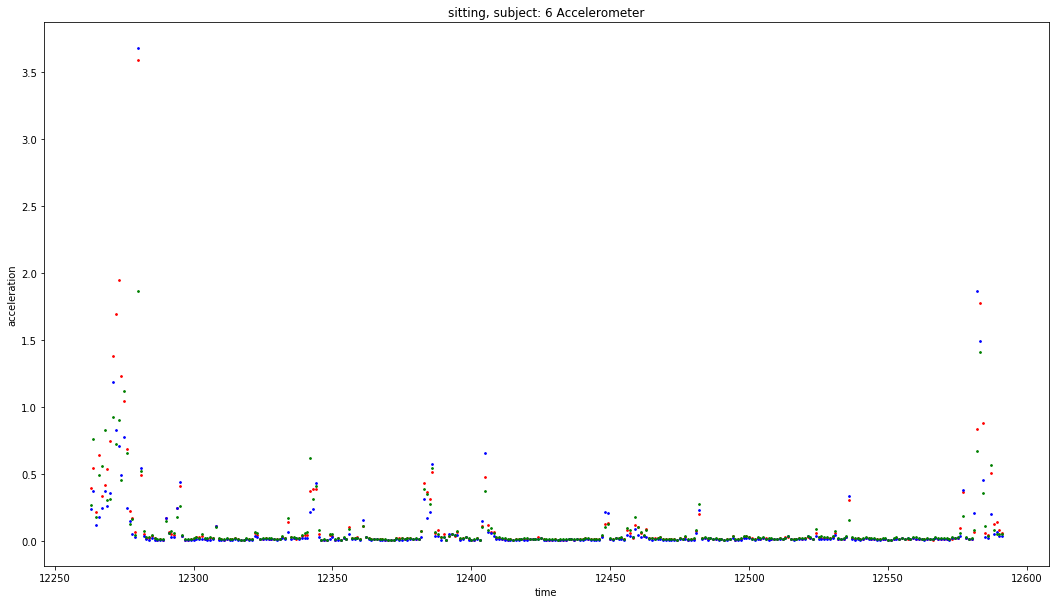

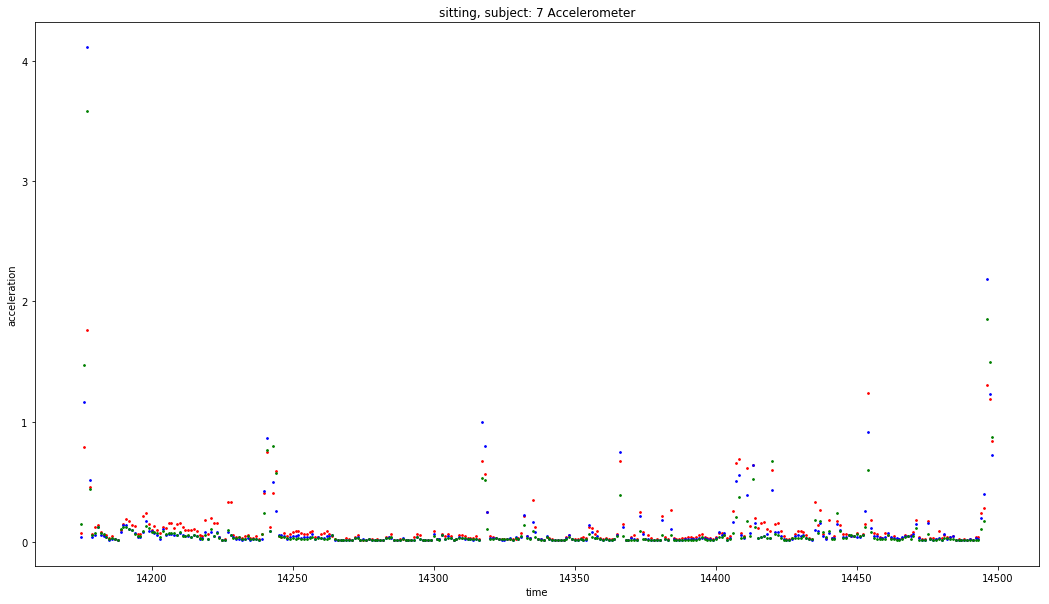

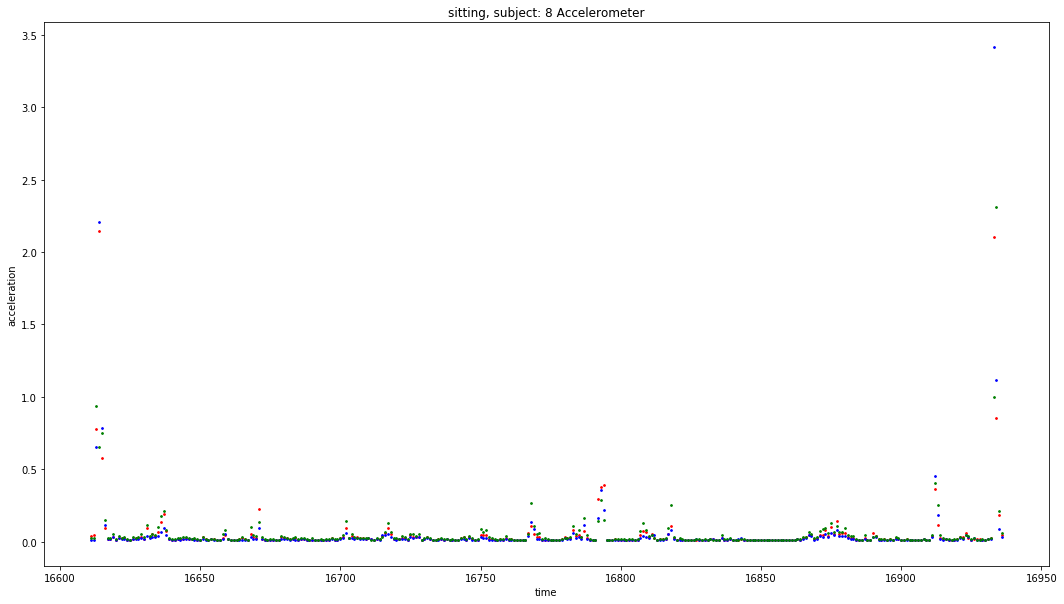

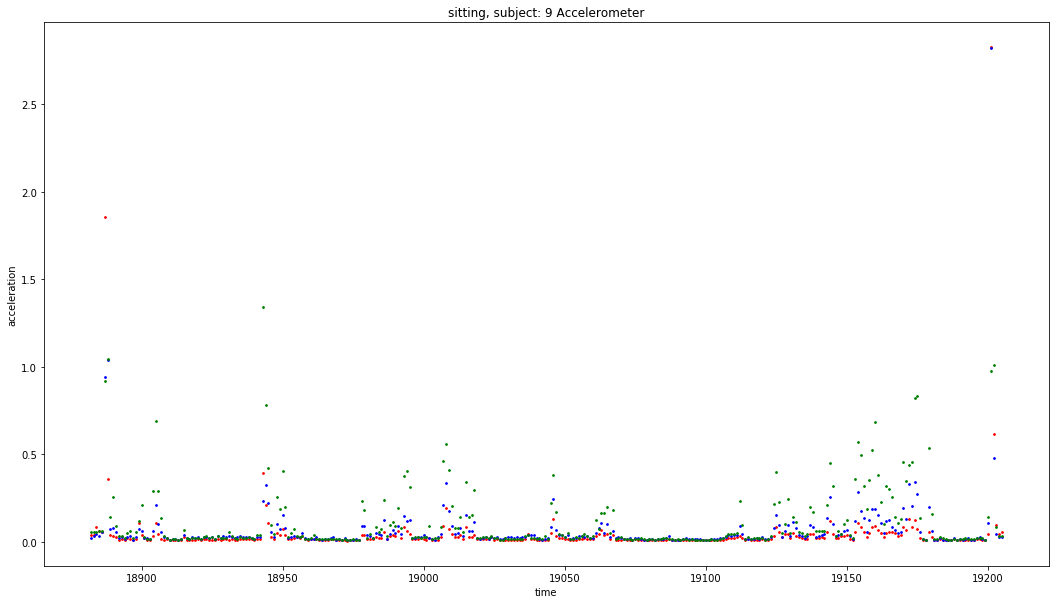

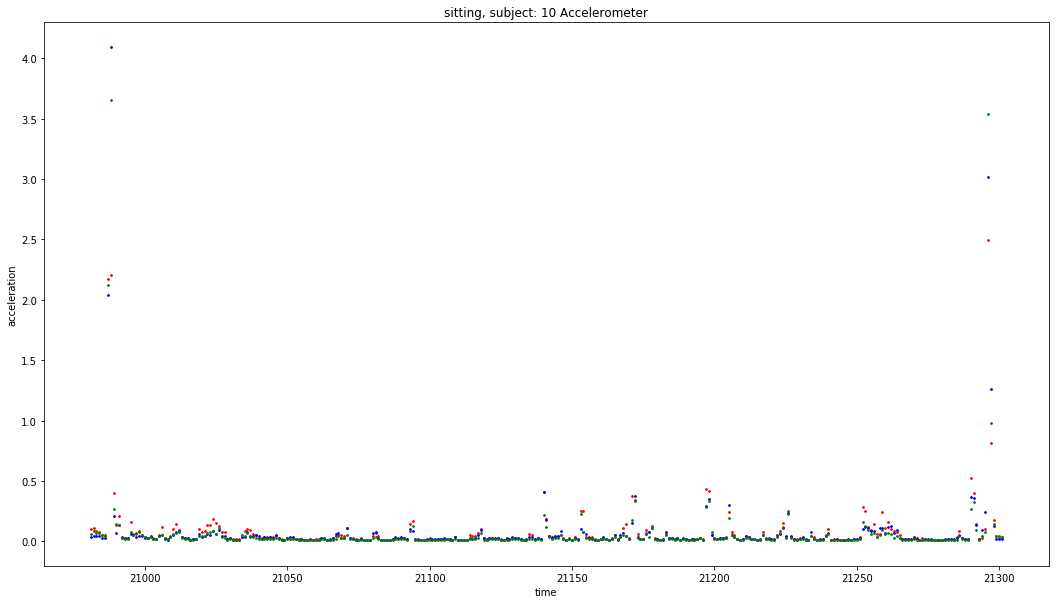

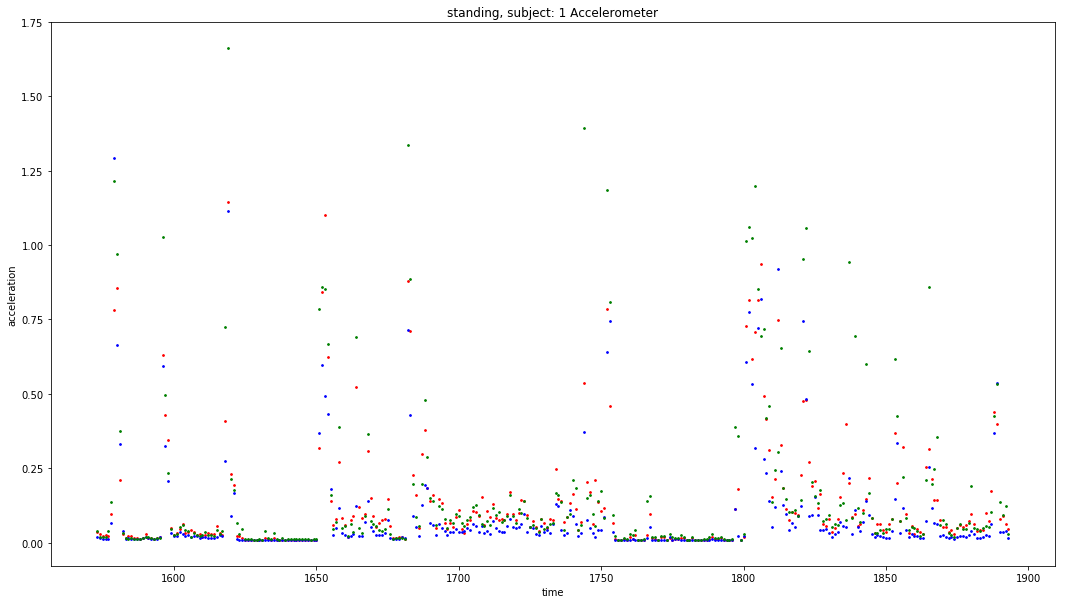

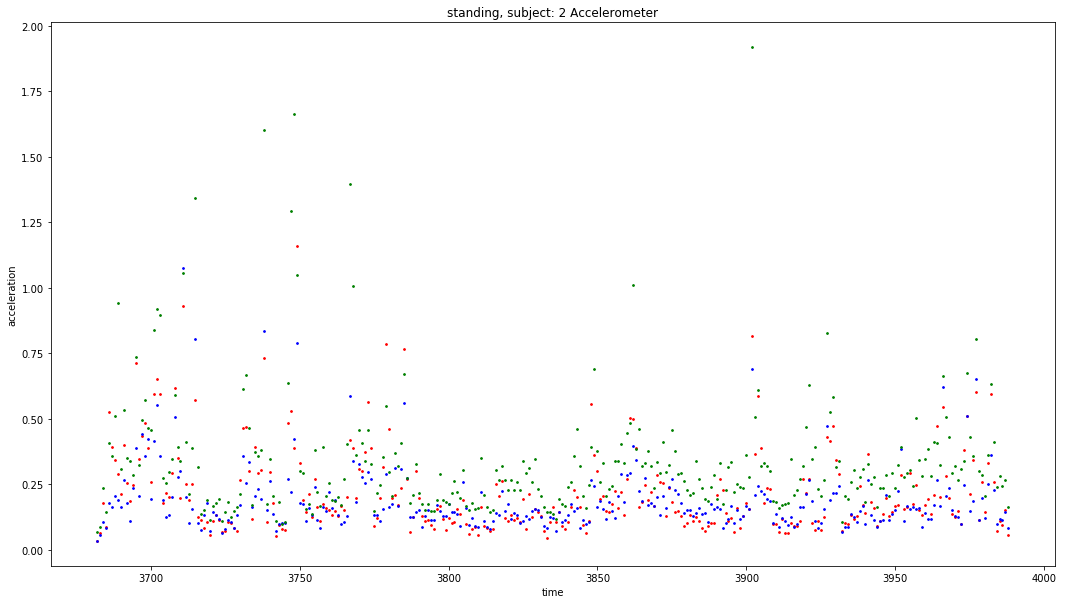

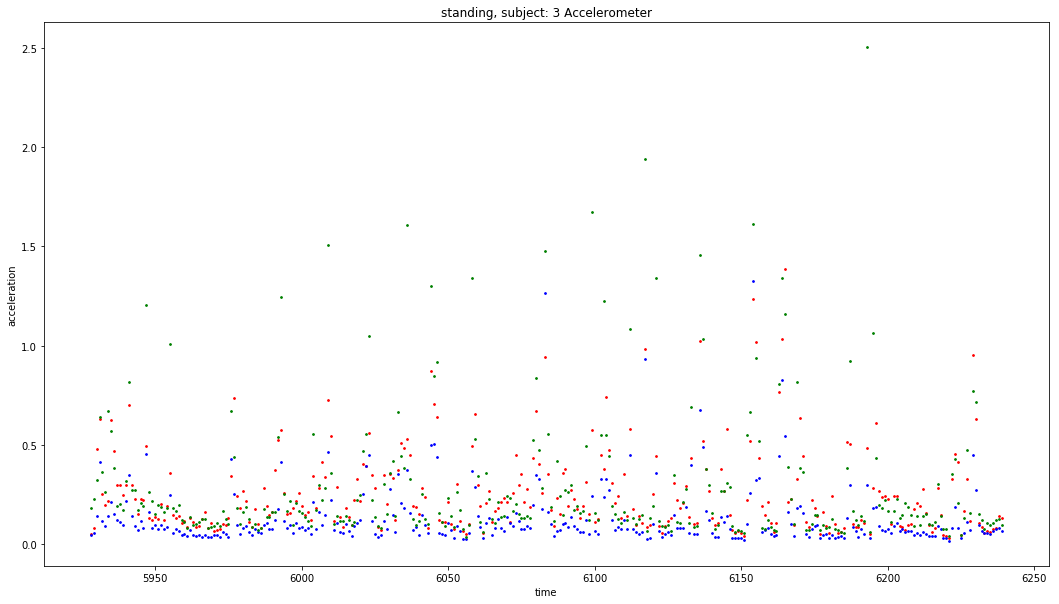

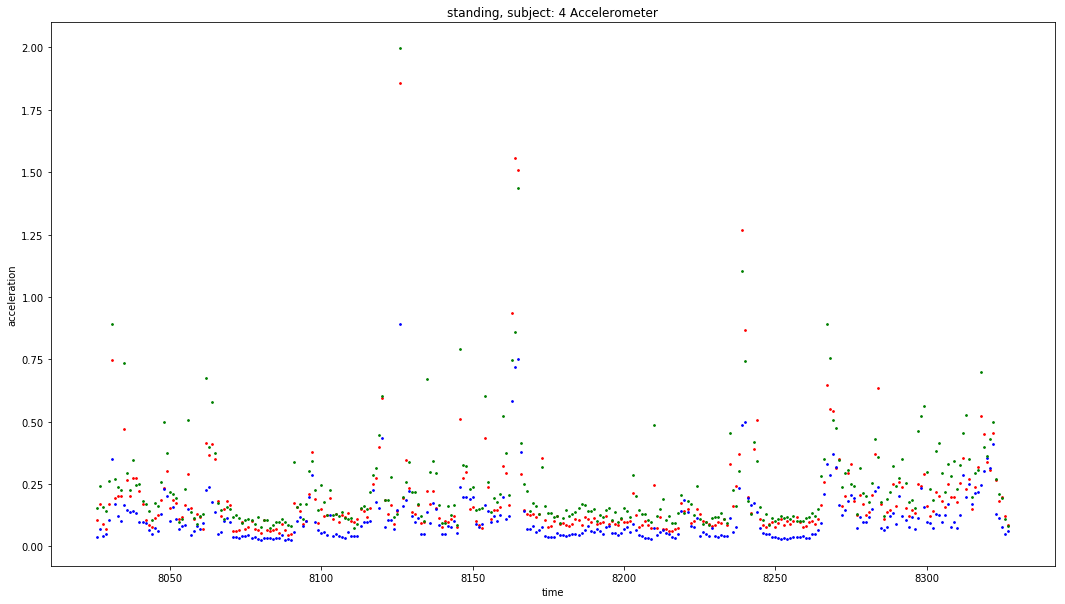

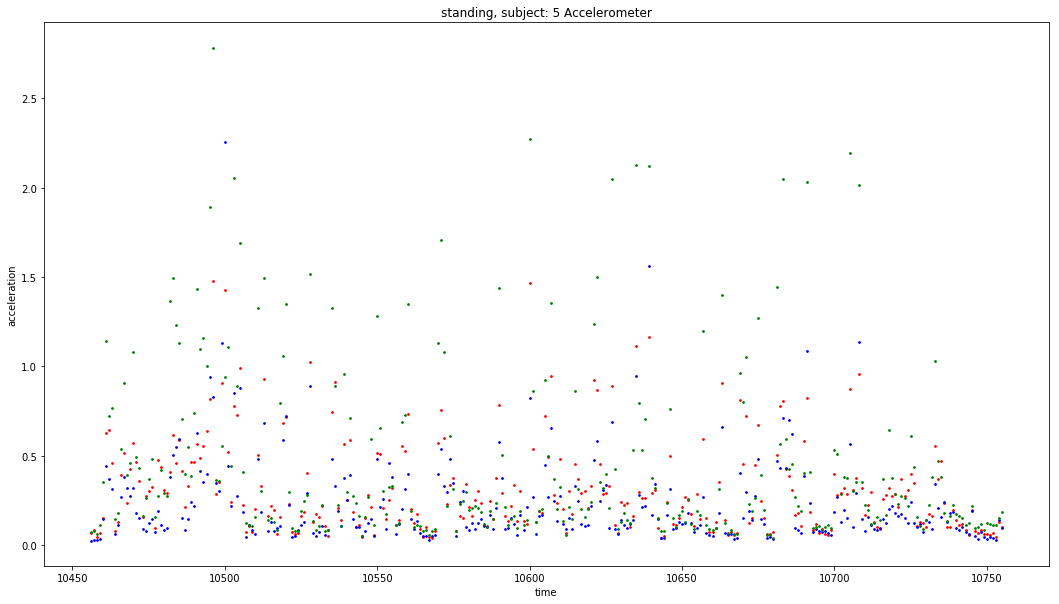

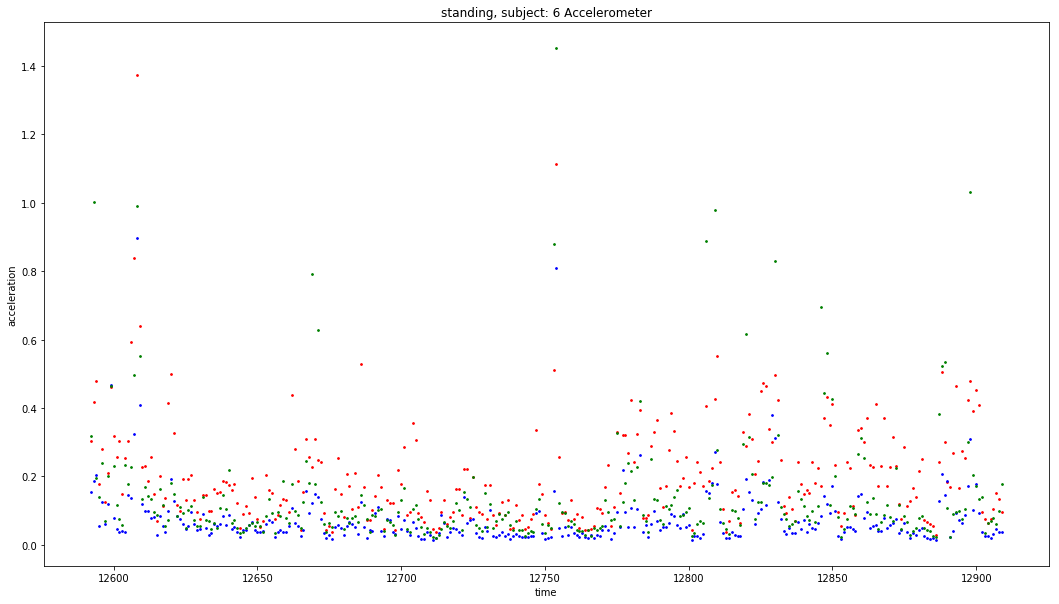

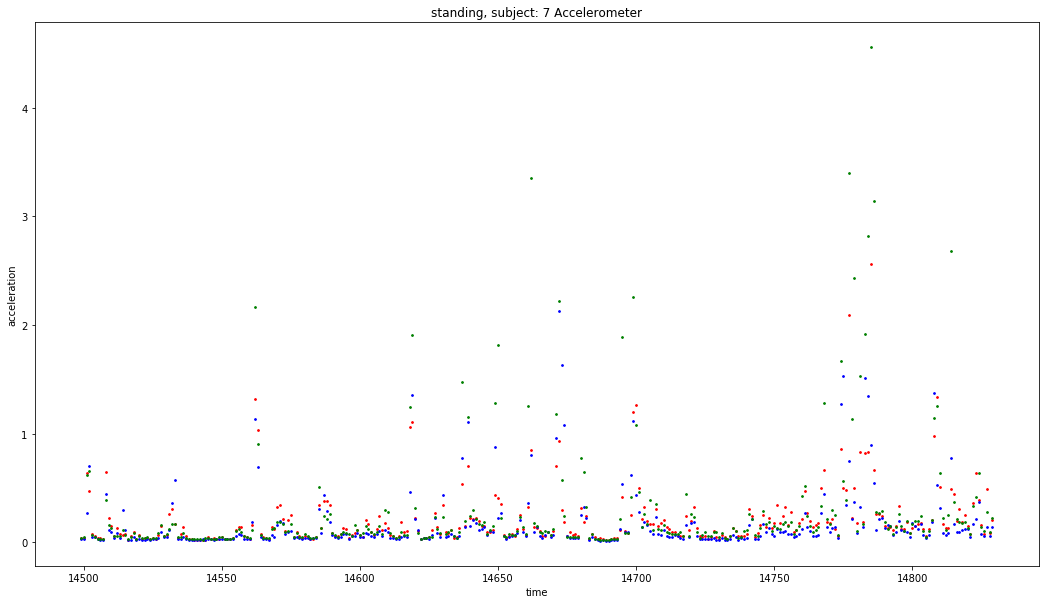

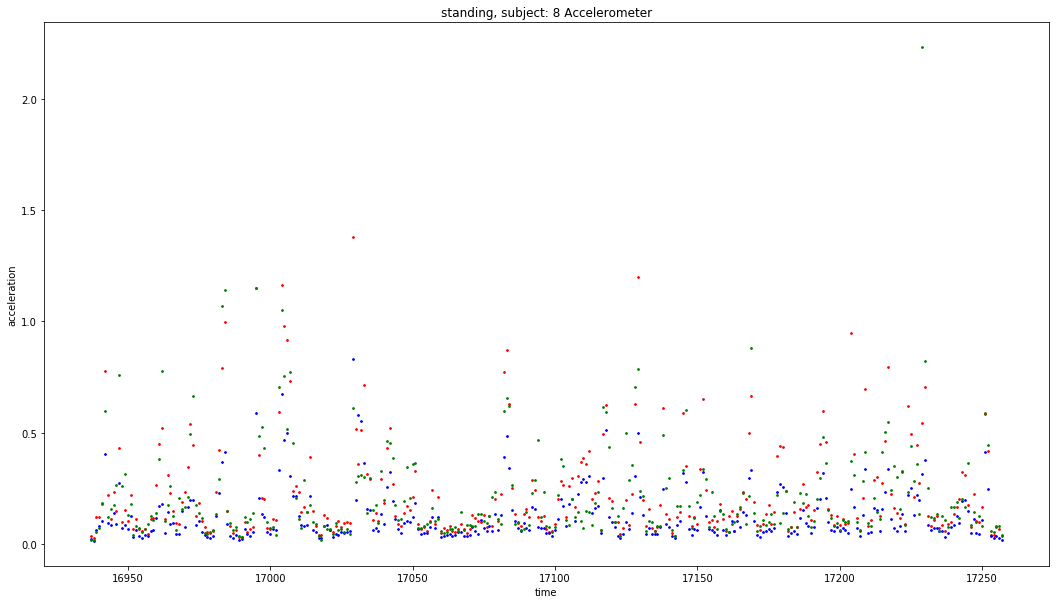

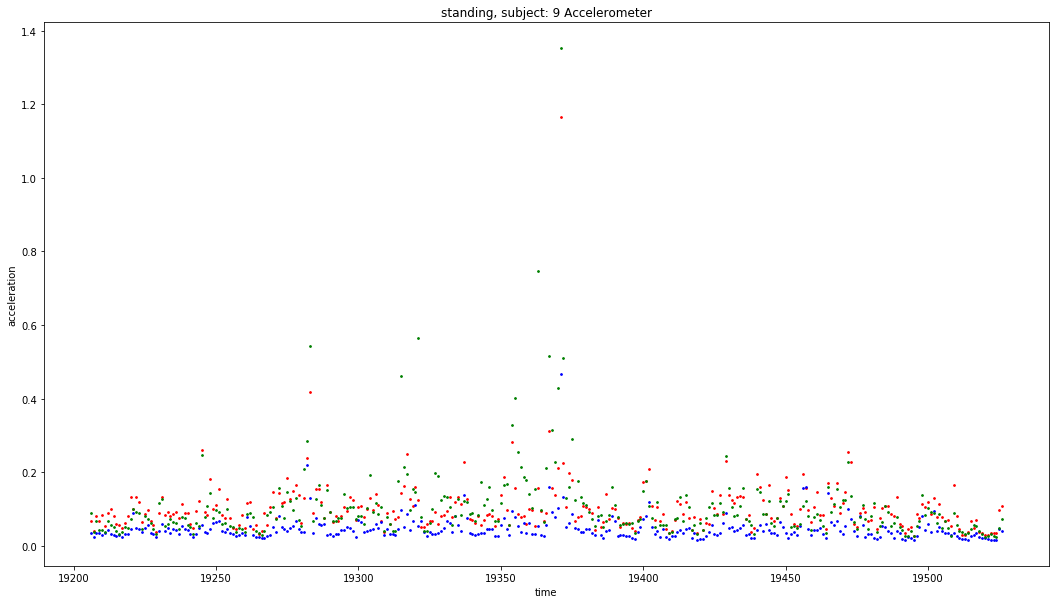

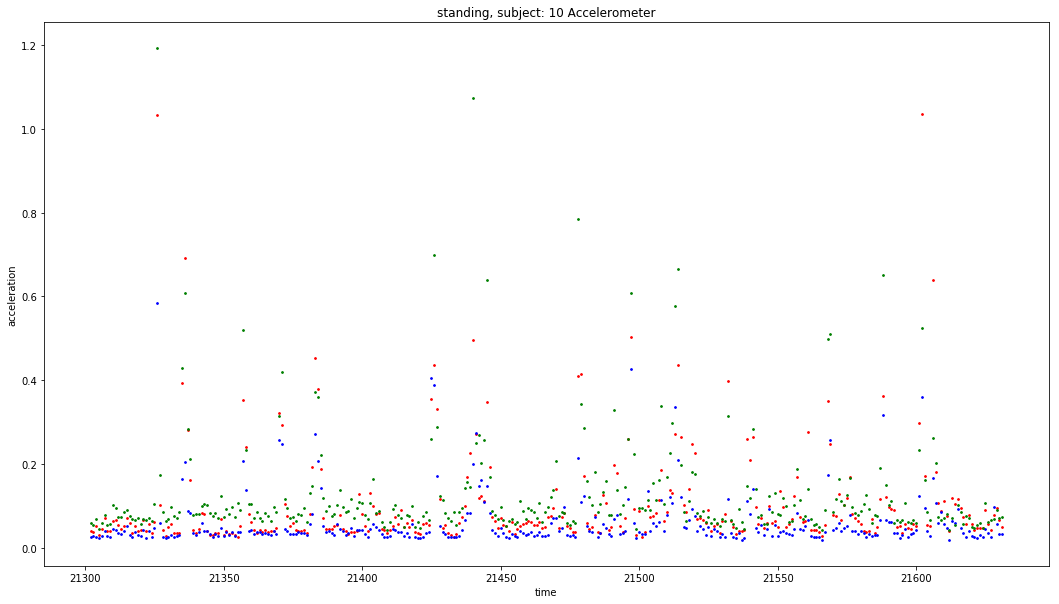

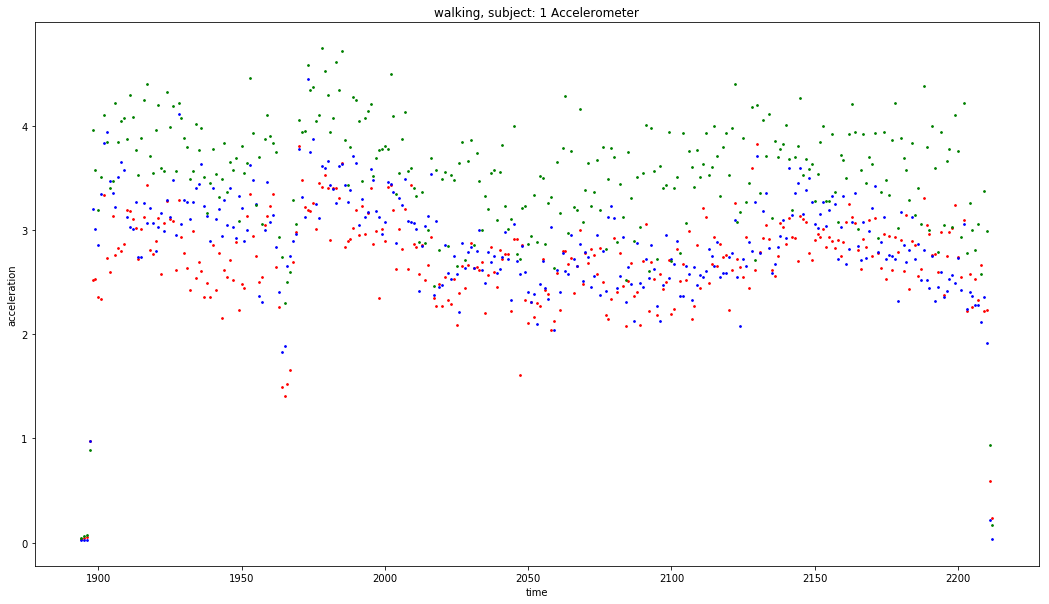

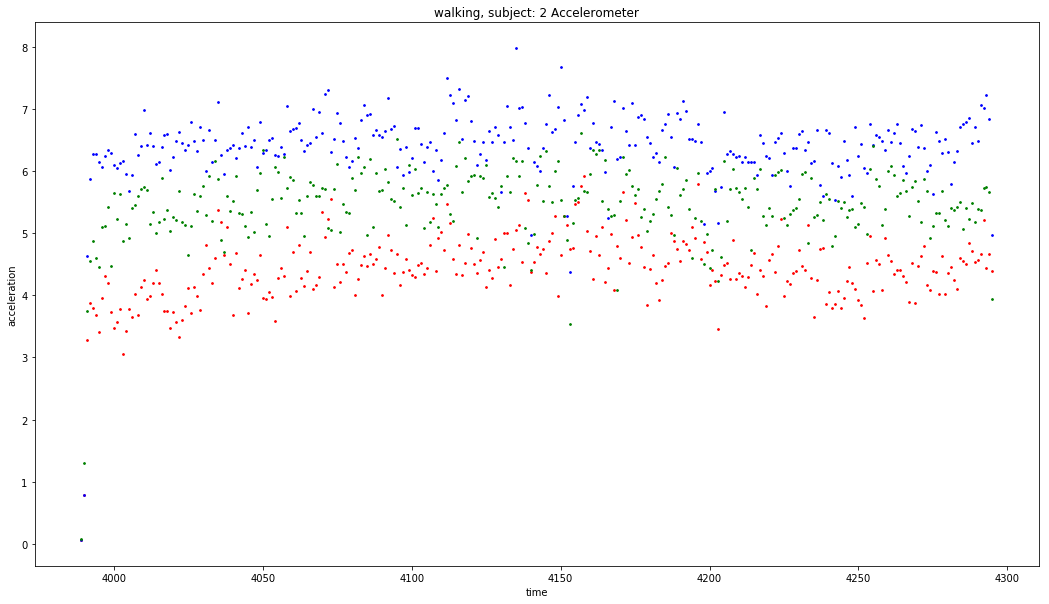

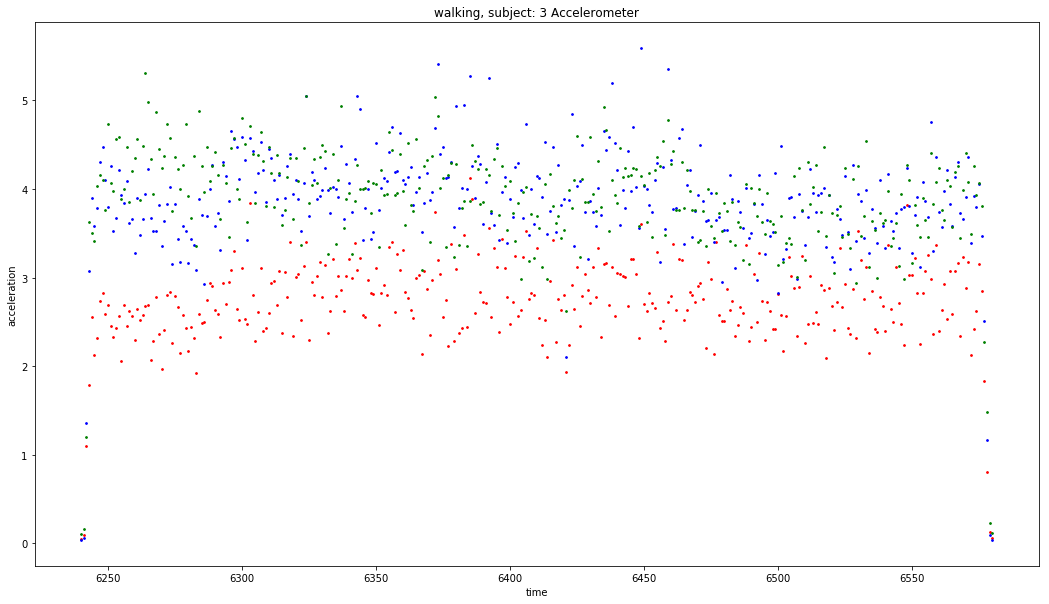

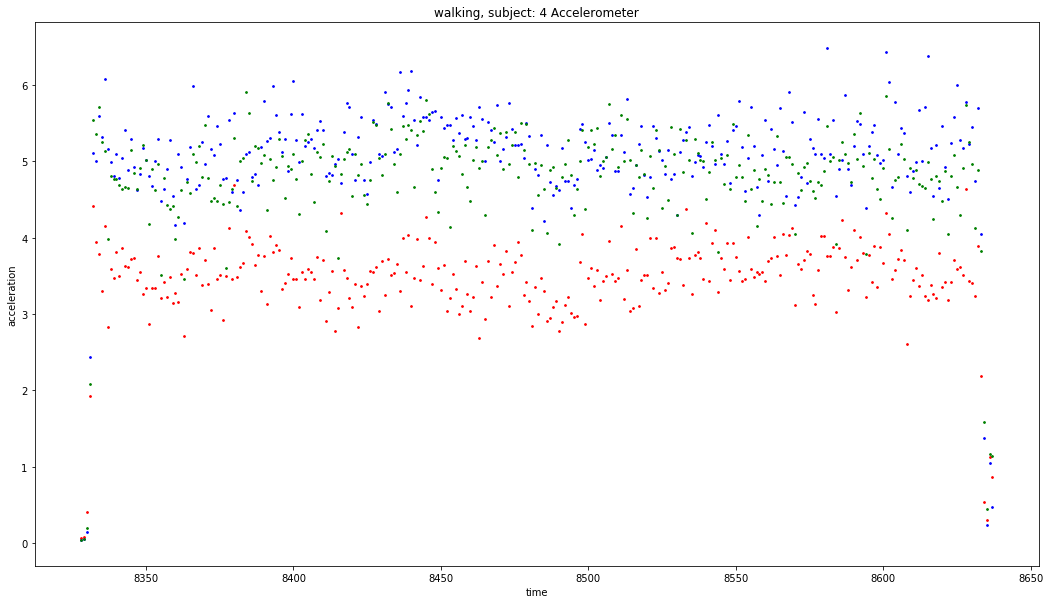

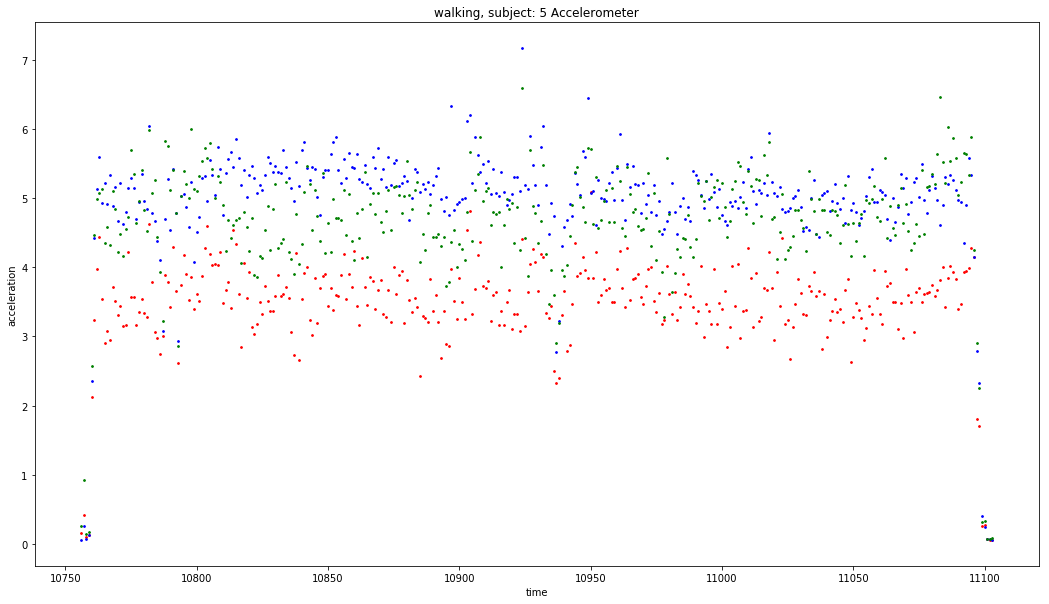

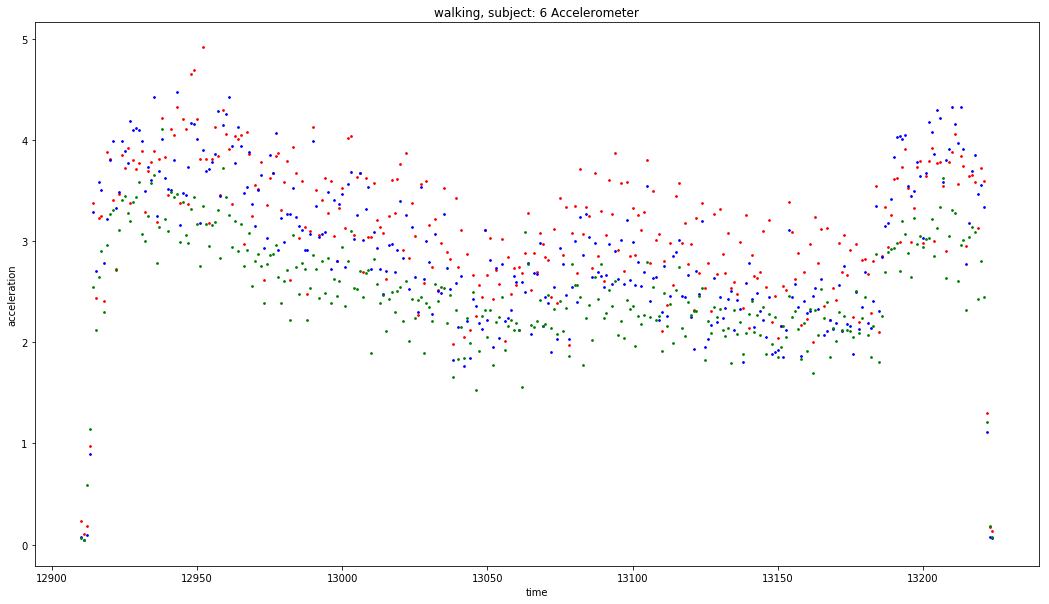

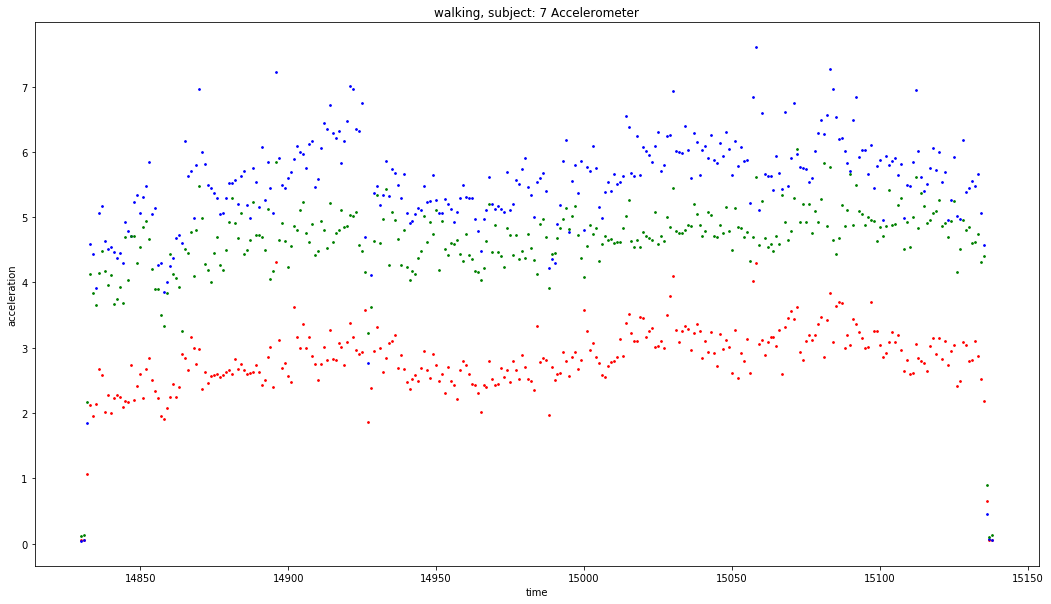

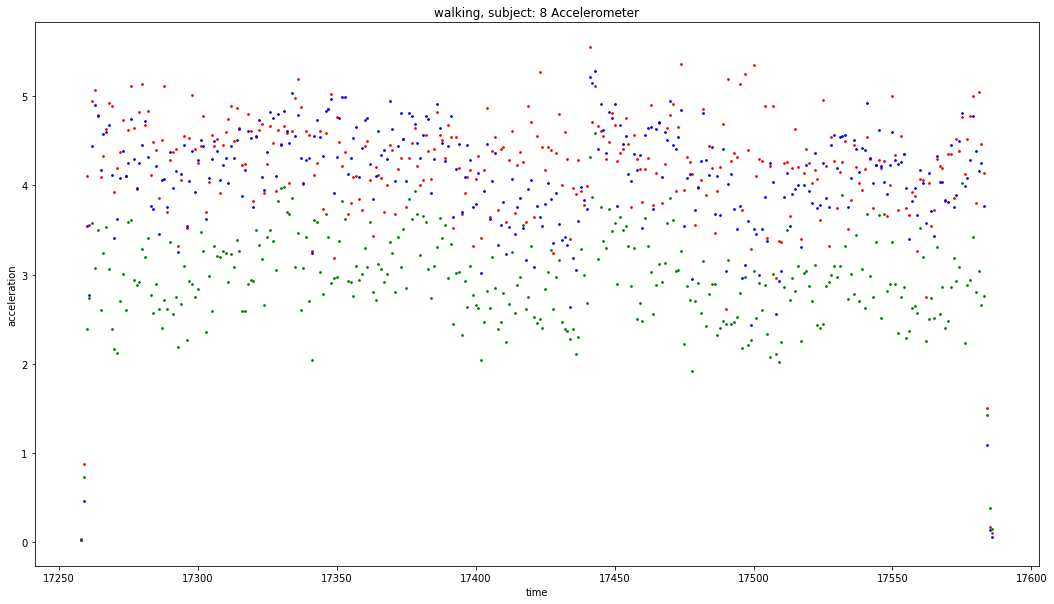

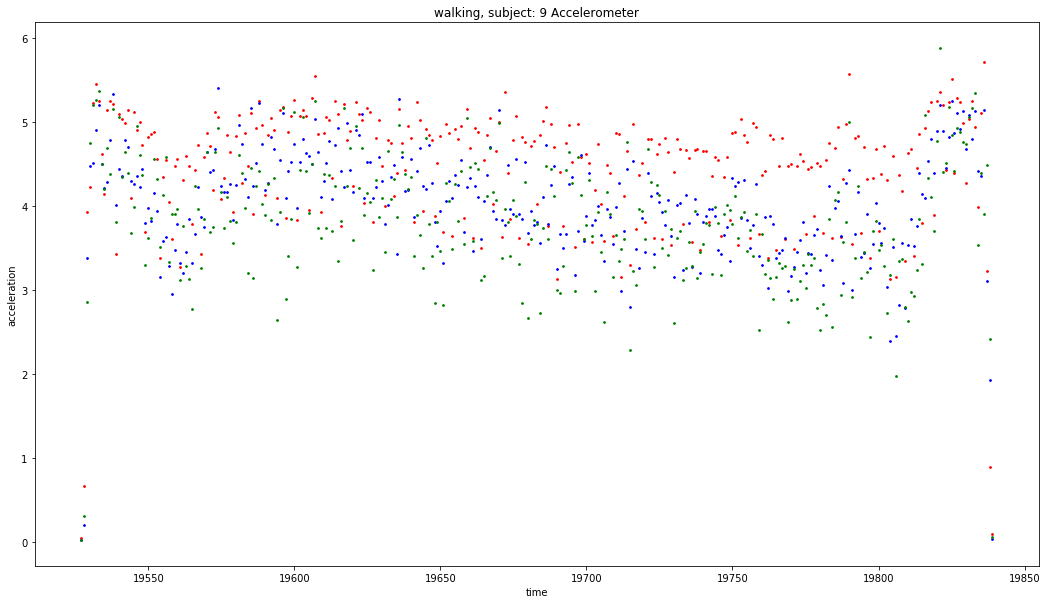

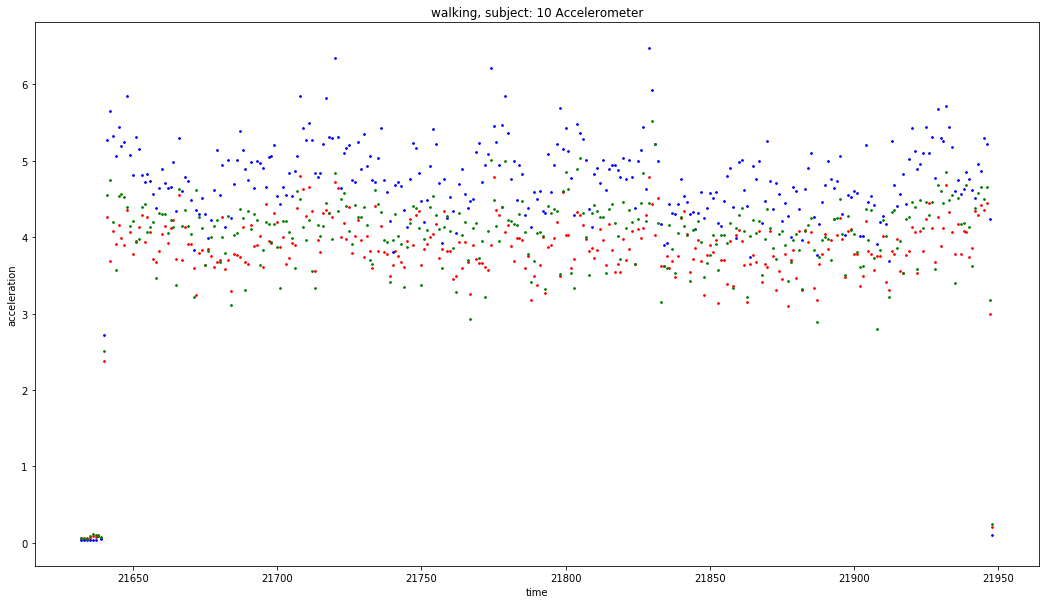

In [75]:
activities =["climbingdown","climbingup","jumping","lying","running","sitting","standing","walking"]
for activity in activities:
    plot_std(activity)

## Drop samples that do not meet the threshold tests

In [137]:
deviation.head(20)

,activity,subject,sample_num,attr_time_gyr,attr_x_gyr,attr_y_gyr,attr_z_gyr,attr_time_acc,attr_x_acc,attr_y_acc,attr_z_acc,label
0,climbingdown,1,0,580.462094,0.003208,0.004846,0.002879,580.380247,0.014366,0.011870,0.013727,0.0
1,climbingdown,1,1,580.299681,0.003425,0.004124,0.002853,581.257359,0.014516,0.011234,0.014858,0.0
2,climbingdown,1,2,581.183295,0.003822,0.005771,0.003249,581.039058,0.014756,0.010528,0.013092,0.0
3,climbingdown,1,3,578.568396,0.003180,0.003495,0.002691,578.122638,0.012145,0.009997,0.011631,0.0
4,climbingdown,1,4,578.837414,0.024814,0.020402,0.025647,578.969036,0.054283,0.056692,0.052140,0.0
5,climbingdown,1,5,582.111606,0.277617,0.358134,0.157863,581.217241,1.047380,0.888633,1.408514,0.0
6,climbingdown,1,6,581.583392,0.644127,0.406066,0.283254,581.574773,0.923391,0.957670,1.634225,0.0
7,climbingdown,1,7,577.344583,0.786064,0.611101,0.402885,572.802628,1.028233,3.303459,1.968117,0.0
8,climbingdown,1,8,581.291714,0.942661,0.855090,0.374873,582.030385,1.470079,3.465349,2.752805,0.0
9,climbingdown,1,9,579.635665,0.976116,0.803382,0.449999,579.373594,1.566840,3.024721,2.634441,0.0


In [80]:
df.shape

(21949, 9)

In [114]:
import operator
df=deviation
samples_to_drop = []
find_bad_samples('climbingdown',samples_to_drop,operator.lt,1.2)
find_bad_samples('climbingup',samples_to_drop,operator.lt,1.2)
find_bad_samples('jumping',samples_to_drop,operator.lt,3.5)
find_bad_samples('lying',samples_to_drop,operator.gt,0.5)
find_bad_samples('running',samples_to_drop,operator.lt,5)
find_bad_samples('sitting',samples_to_drop,operator.gt,1)
find_bad_samples('walking',samples_to_drop,operator.lt,1.5)

In [111]:
def find_bad_samples(activity,samples_to_drop,operator,threshold):
    mask =(df.activity == activity) & operator(df.attr_x_acc, threshold)
    return samples_to_drop.extend(list(df.sample_num[mask]))

In [115]:
len(samples_to_drop)

2125

In [116]:
len(deviation)

21949

In [117]:
2125/21949

0.09681534466262699

climbingdown y < 1.2 DROP

climbingup y < 1.2 drop

jumping y < 3.5 drop

lying y > 0.5 drop

running  y < 5 DROP

sitting y > 1

standing NO FILTER

walking y < 1.5

In [124]:
thigh_clean= thigh100[~thigh100.sample_num.isin(samples_to_drop)]

In [142]:
thigh100.shape

(2194900, 12)

In [125]:
thigh_clean.shape

(1982400, 12)

In [131]:
thigh_clean.to_pickle('./thigh_clean.pkl')

In [143]:
df.shape

(19824, 12)

In [144]:
deviation.shape

(21949, 12)

In [156]:
def plot_std(df,activity):
    for subject in range(1,11):
        plt.clf()
        df=df[(df['activity'] == activity) & (df['subject'] == subject)]
        title = activity+", subject: "+str(subject)+" Accelerometer"
        ylabel="acceleration"
        plt.figure(figsize=(18,10))
        plt.scatter(df.sample_num, df.attr_x_acc,s=3,c='r')
        plt.scatter(df.sample_num, df.attr_y_acc,s=3,c='b')
        plt.scatter(df.sample_num, df.attr_z_acc,s=3,c='g')
        plt.title(title)
        plt.xlabel('time')
        plt.ylabel(ylabel)
        plt.show();

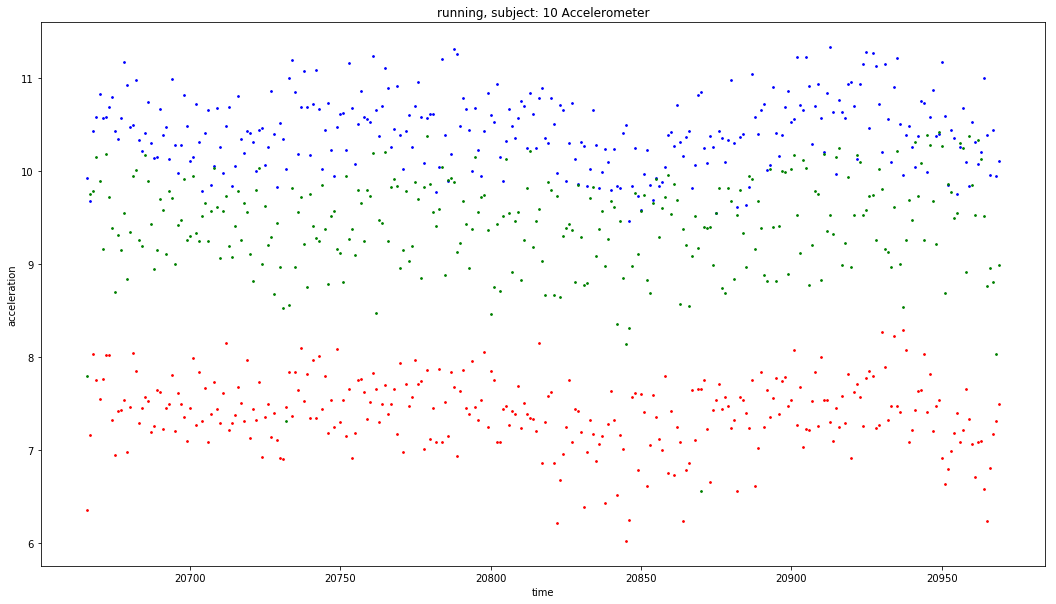

In [170]:
activity='running'
subject=10
df = deviation[~deviation.sample_num.isin(samples_to_drop)]
df=df[(df['activity'] == activity) & (df['subject'] == subject)]
title = activity+", subject: "+str(subject)+" Accelerometer"
ylabel="acceleration"
plt.figure(figsize=(18,10))
plt.scatter(df.sample_num, df.attr_x_acc,s=3,c='r')
plt.scatter(df.sample_num, df.attr_y_acc,s=3,c='b')
plt.scatter(df.sample_num, df.attr_z_acc,s=3,c='g')
plt.title(title)
plt.xlabel('time')
plt.ylabel(ylabel)
plt.show();

<Figure size 432x288 with 0 Axes>

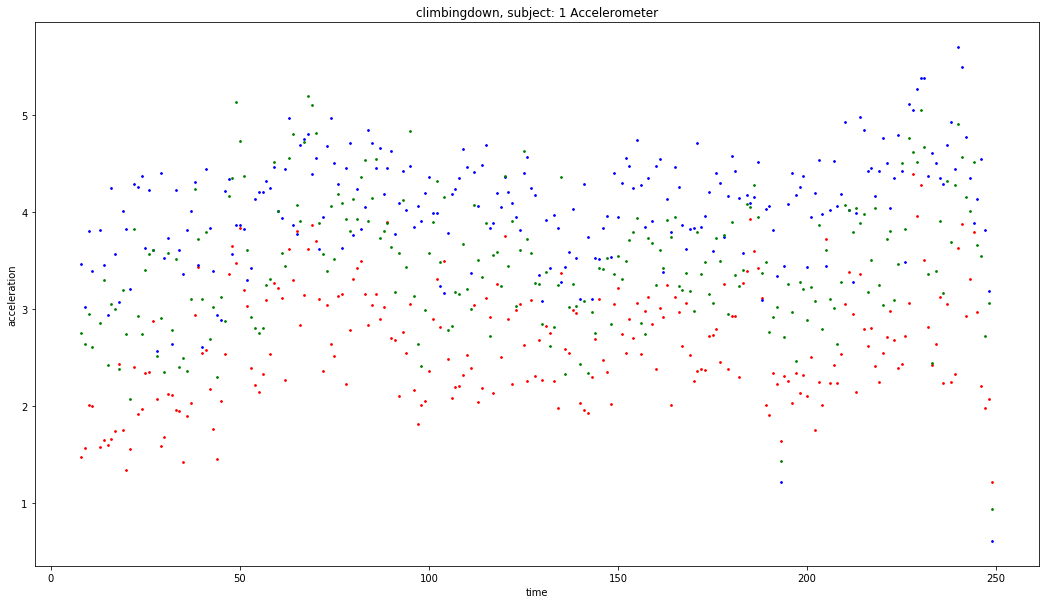

<Figure size 432x288 with 0 Axes>

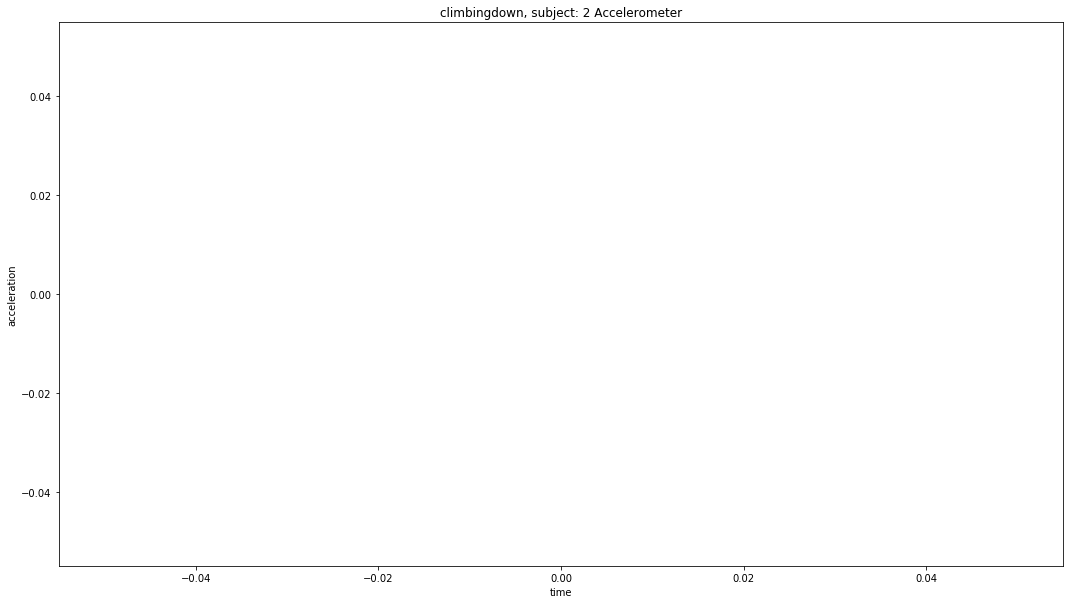

<Figure size 432x288 with 0 Axes>

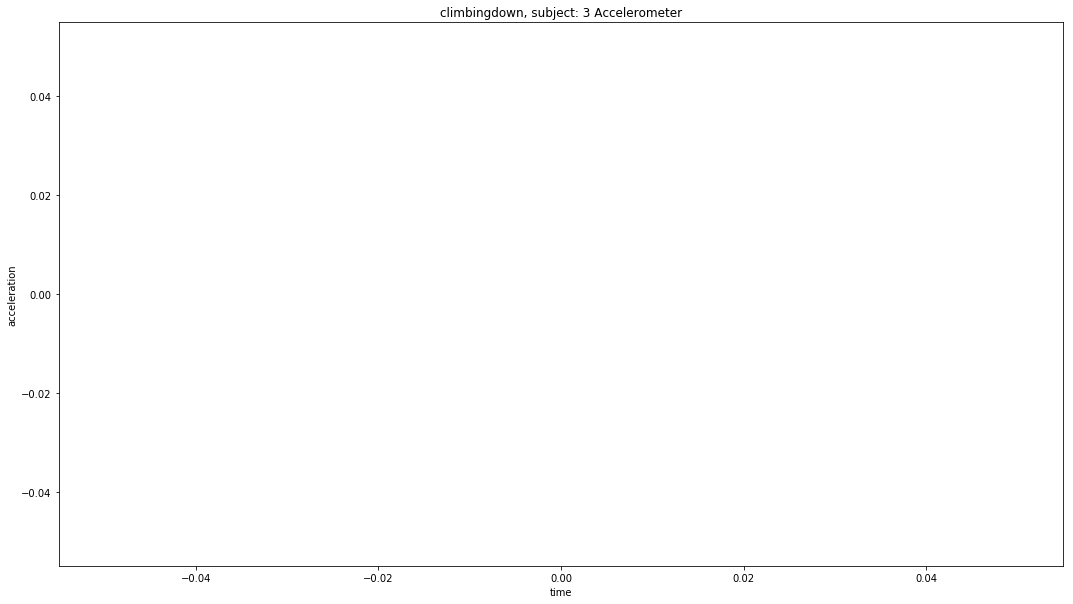

<Figure size 432x288 with 0 Axes>

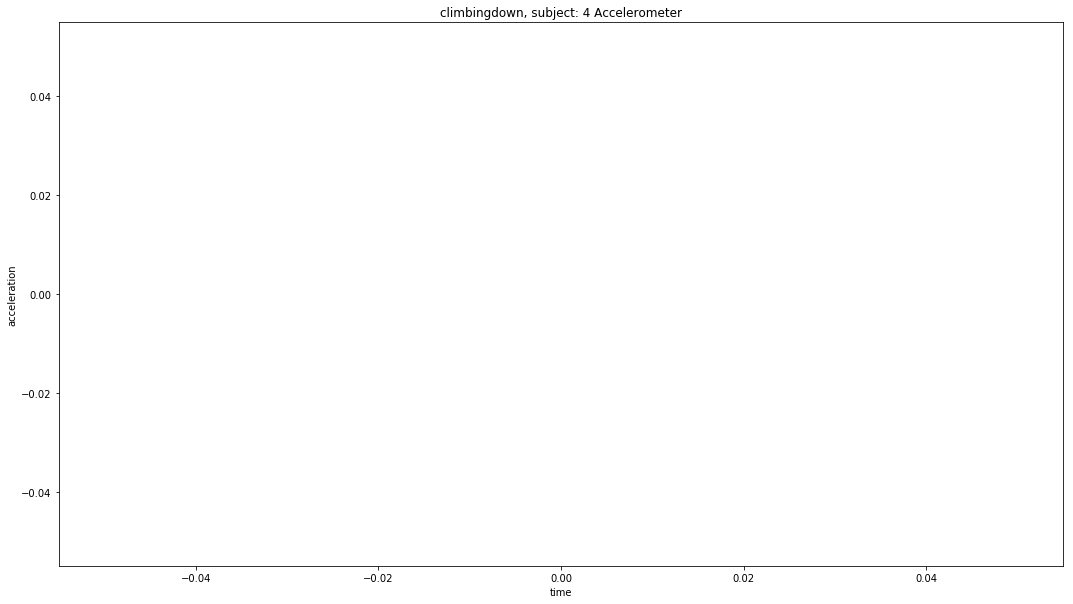

<Figure size 432x288 with 0 Axes>

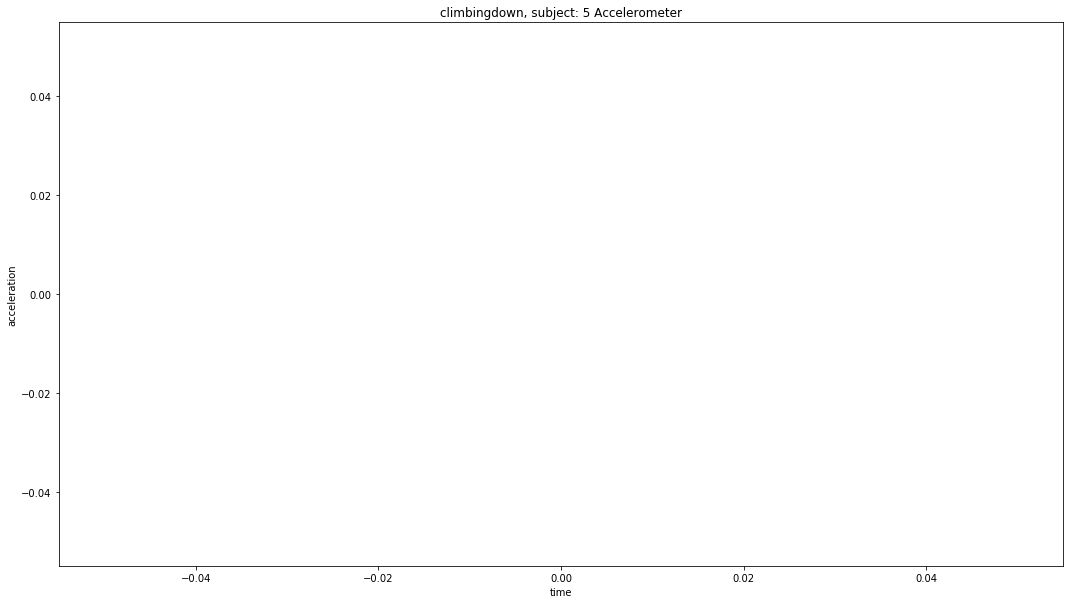

<Figure size 432x288 with 0 Axes>

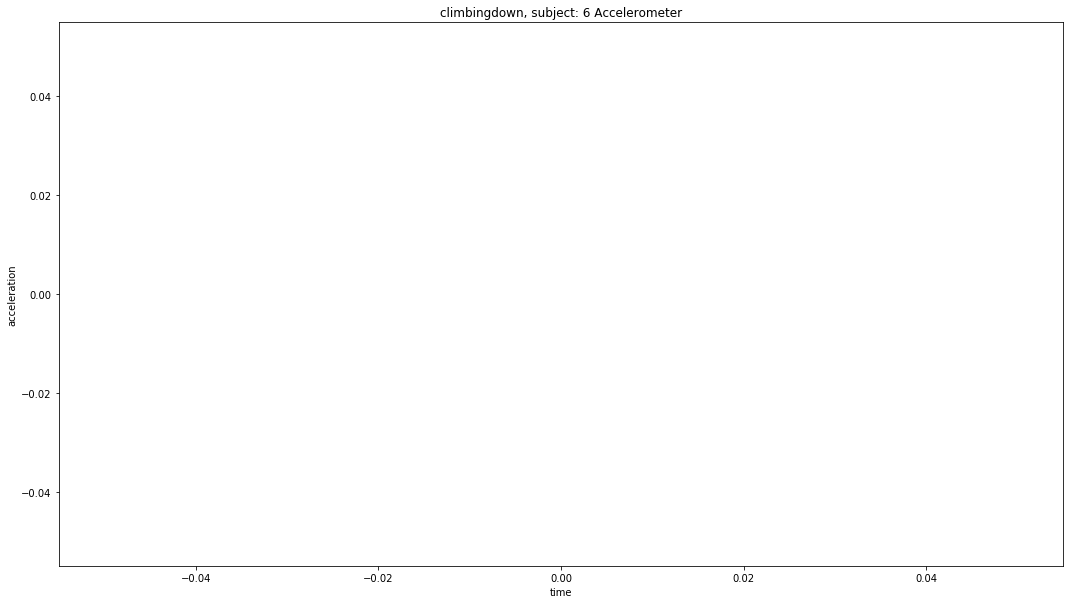

<Figure size 432x288 with 0 Axes>

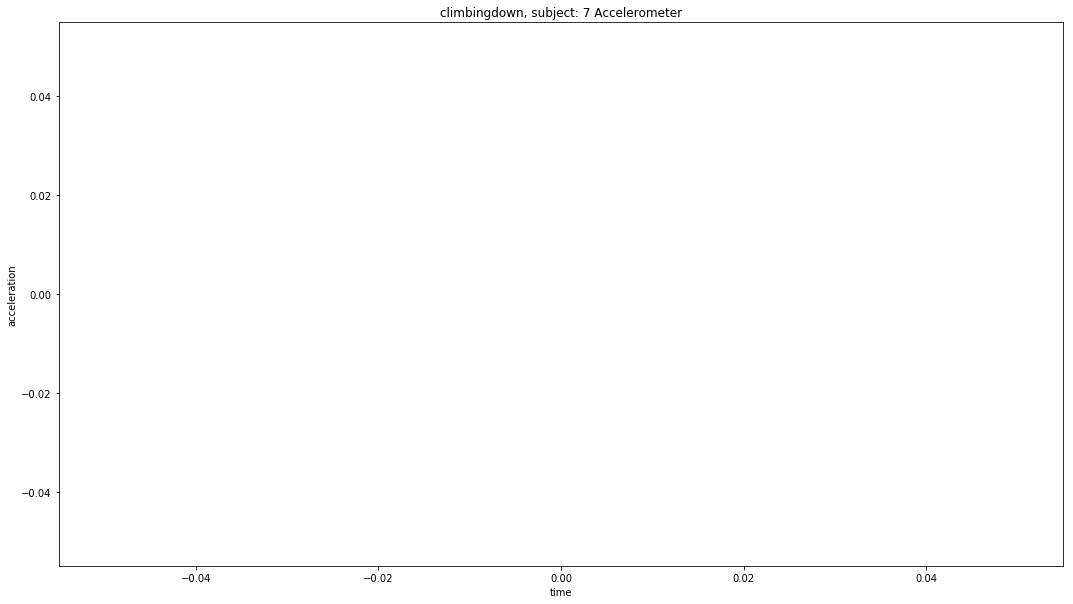

<Figure size 432x288 with 0 Axes>

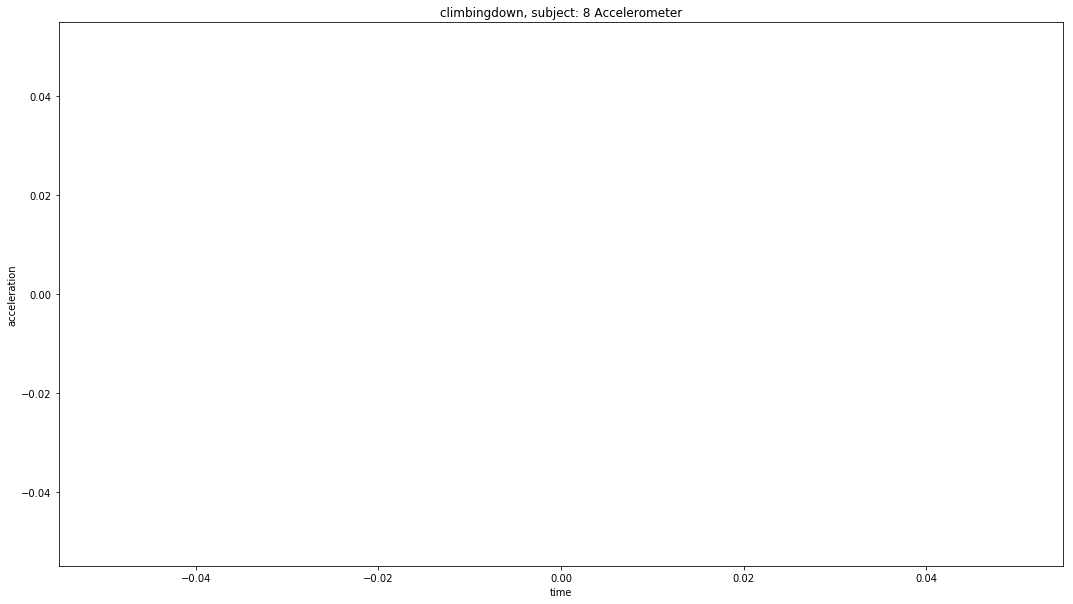

<Figure size 432x288 with 0 Axes>

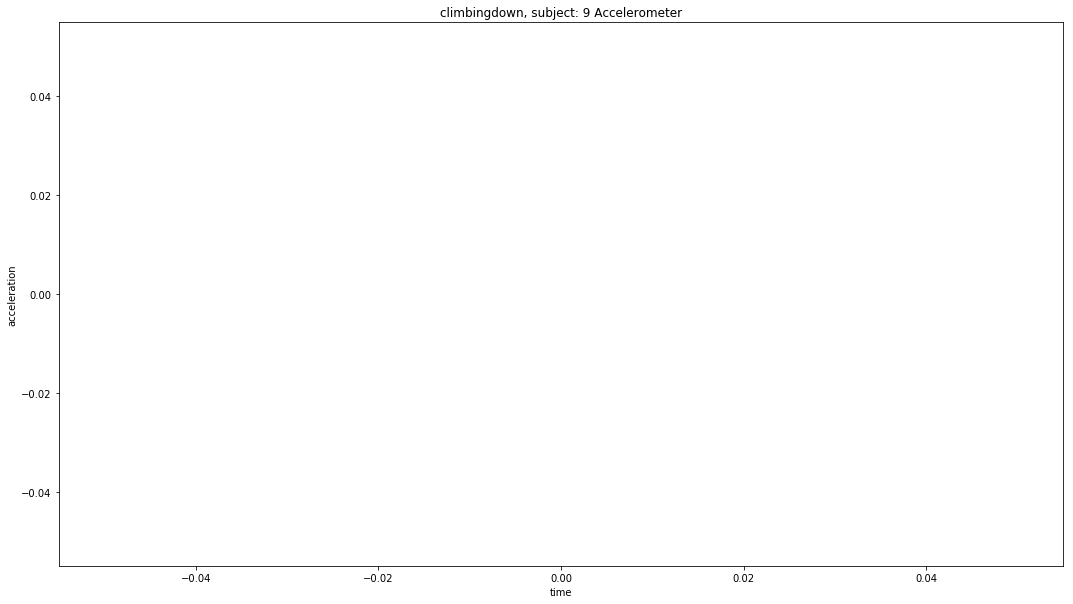

<Figure size 432x288 with 0 Axes>

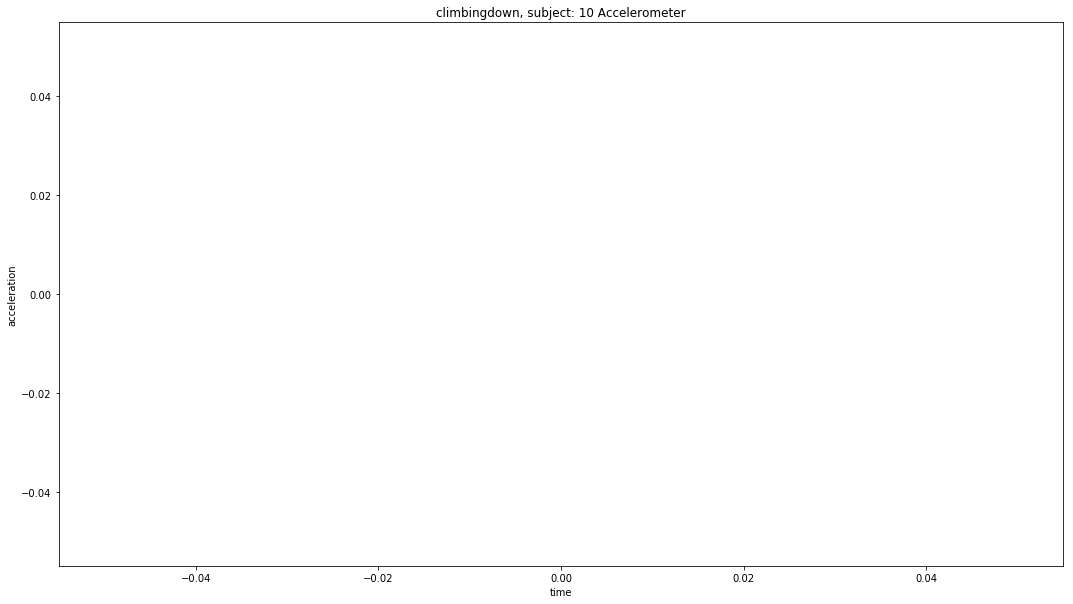

<Figure size 432x288 with 0 Axes>

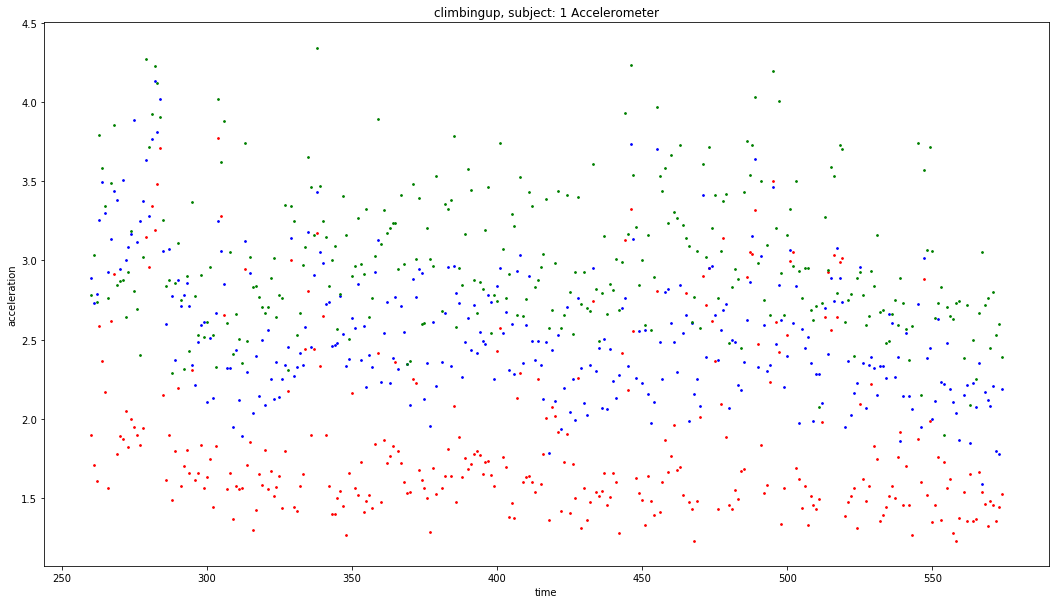

<Figure size 432x288 with 0 Axes>

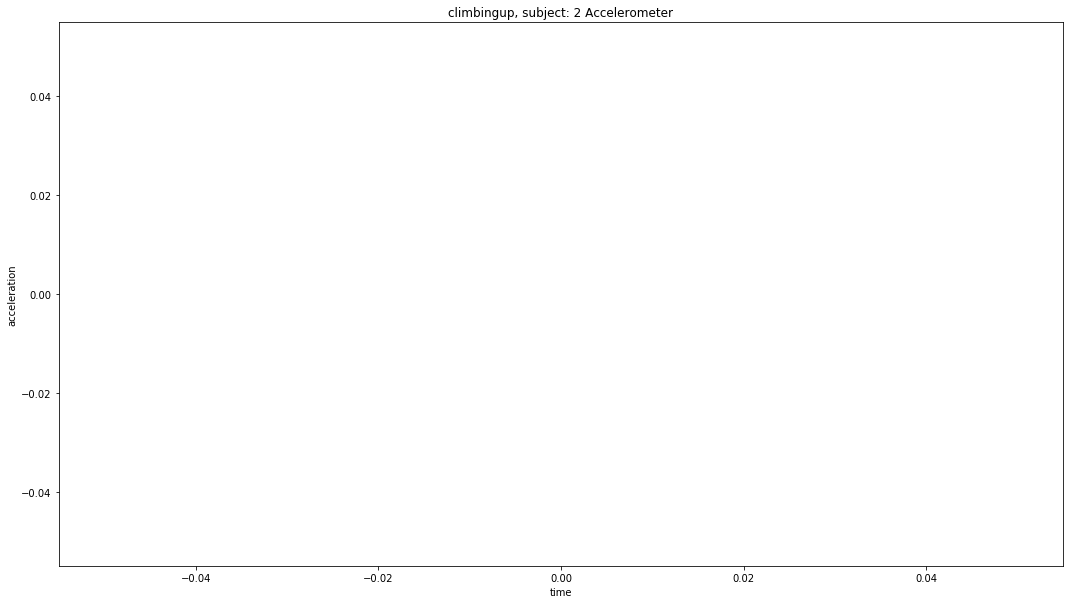

<Figure size 432x288 with 0 Axes>

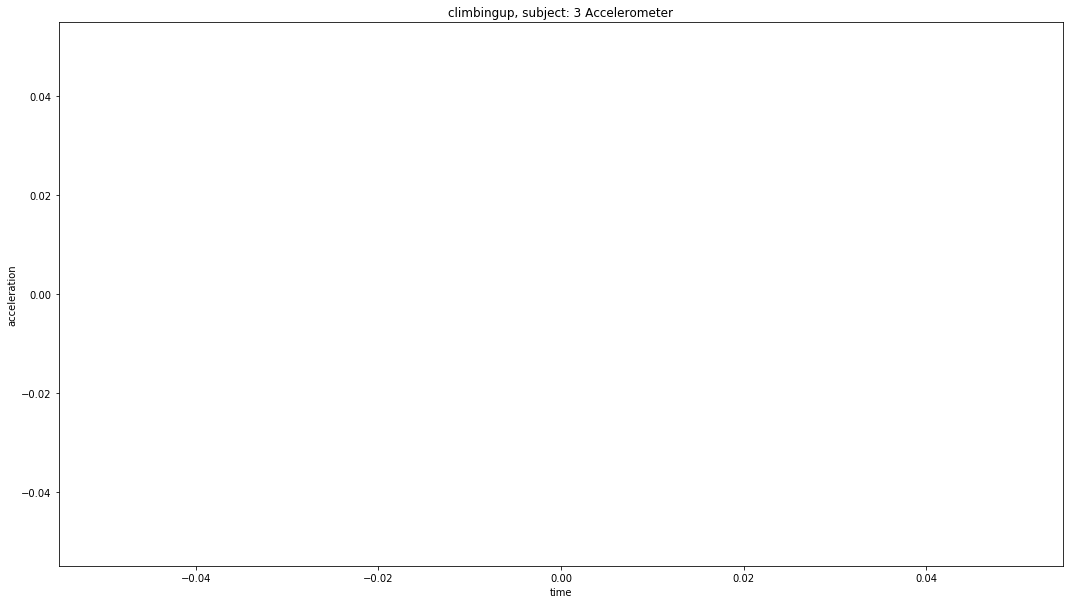

<Figure size 432x288 with 0 Axes>

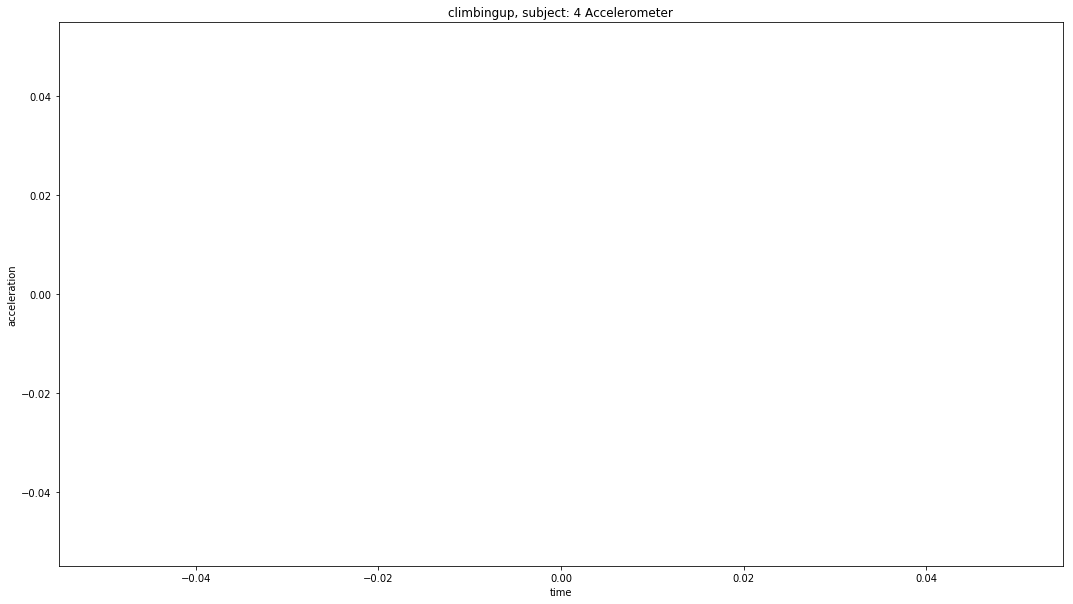

<Figure size 432x288 with 0 Axes>

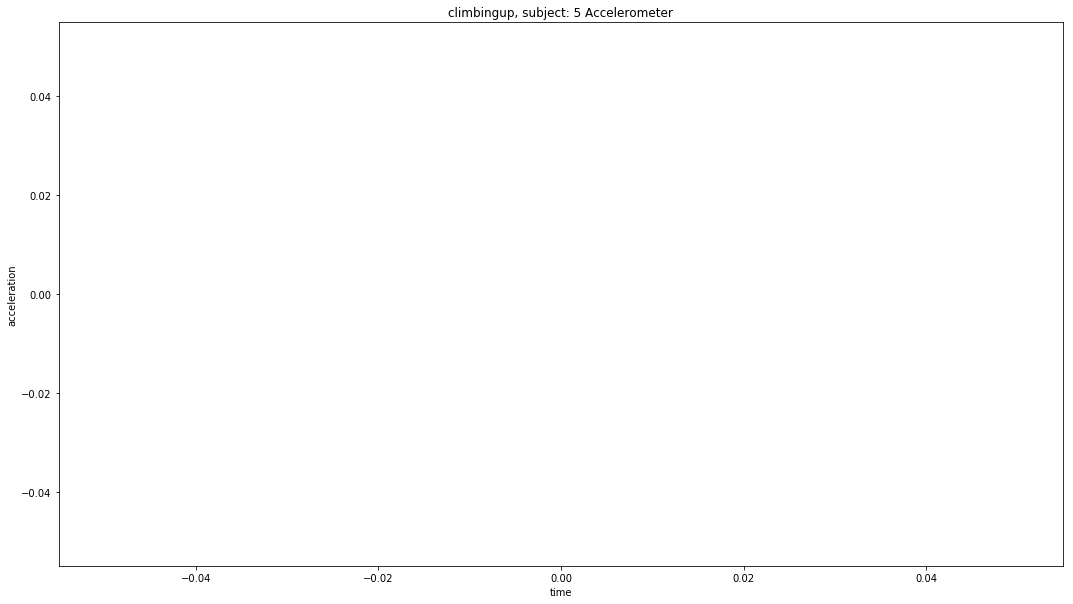

<Figure size 432x288 with 0 Axes>

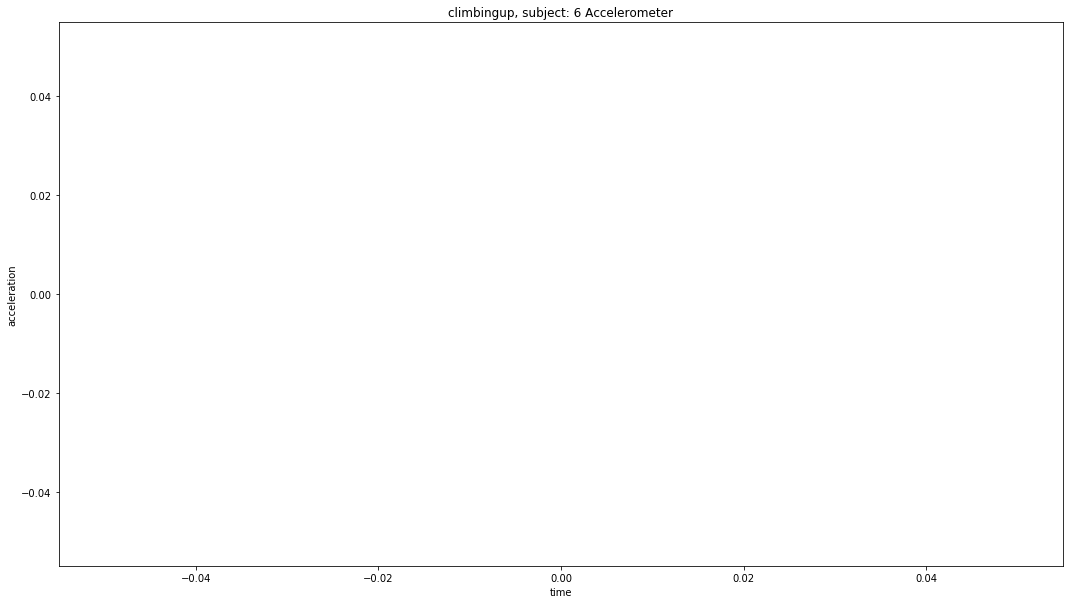

<Figure size 432x288 with 0 Axes>

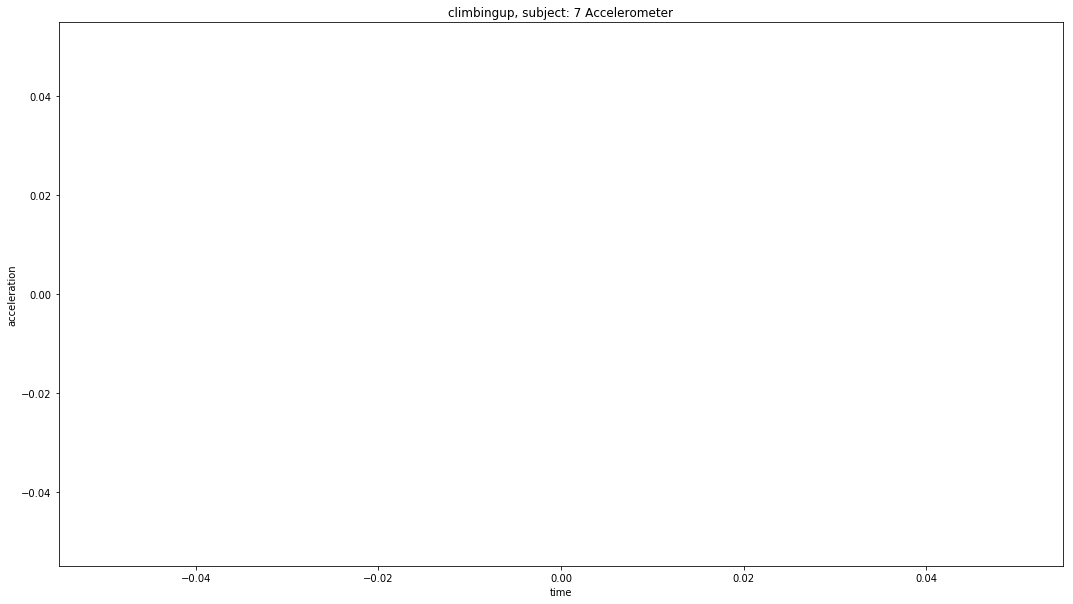

<Figure size 432x288 with 0 Axes>

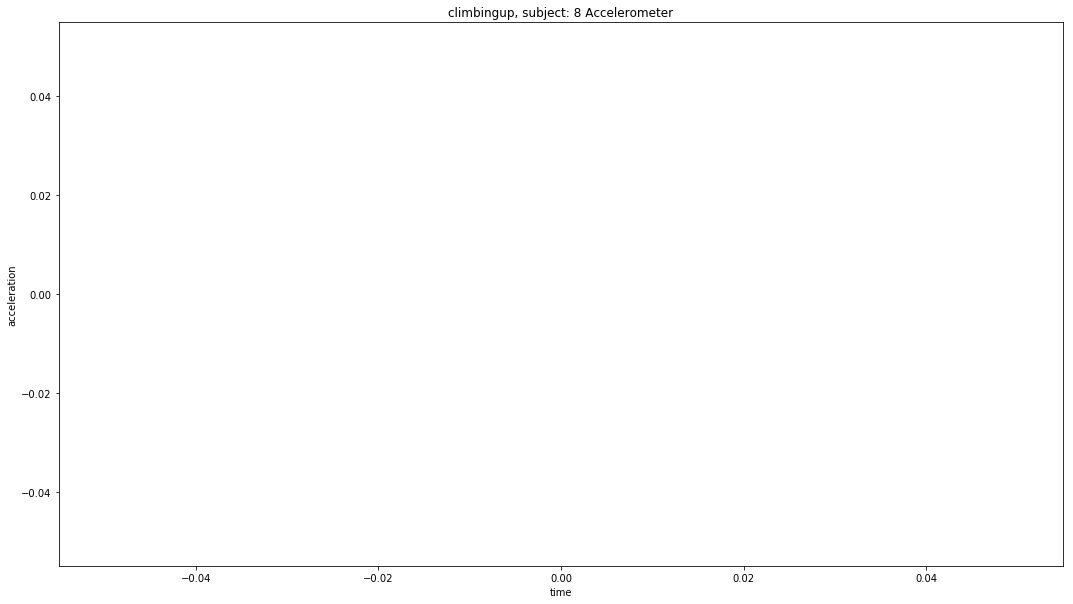

<Figure size 432x288 with 0 Axes>

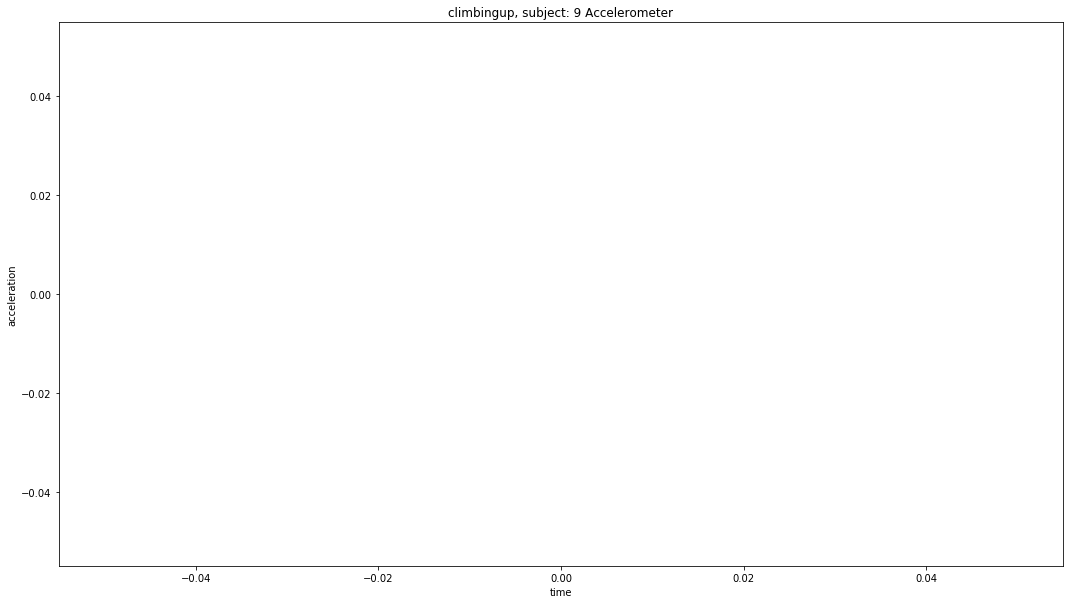

<Figure size 432x288 with 0 Axes>

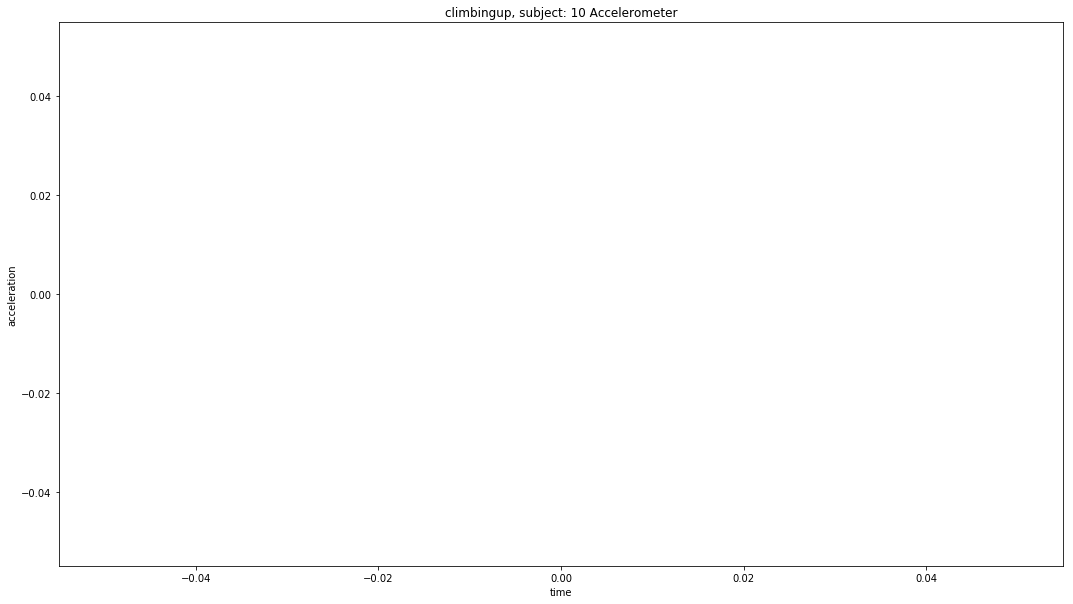

<Figure size 432x288 with 0 Axes>

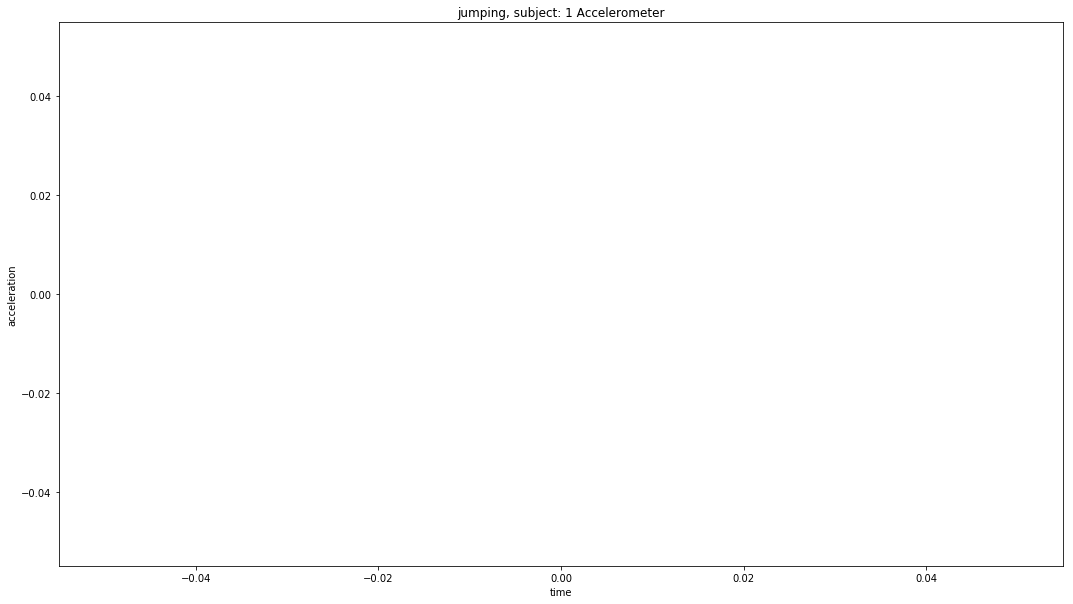

<Figure size 432x288 with 0 Axes>

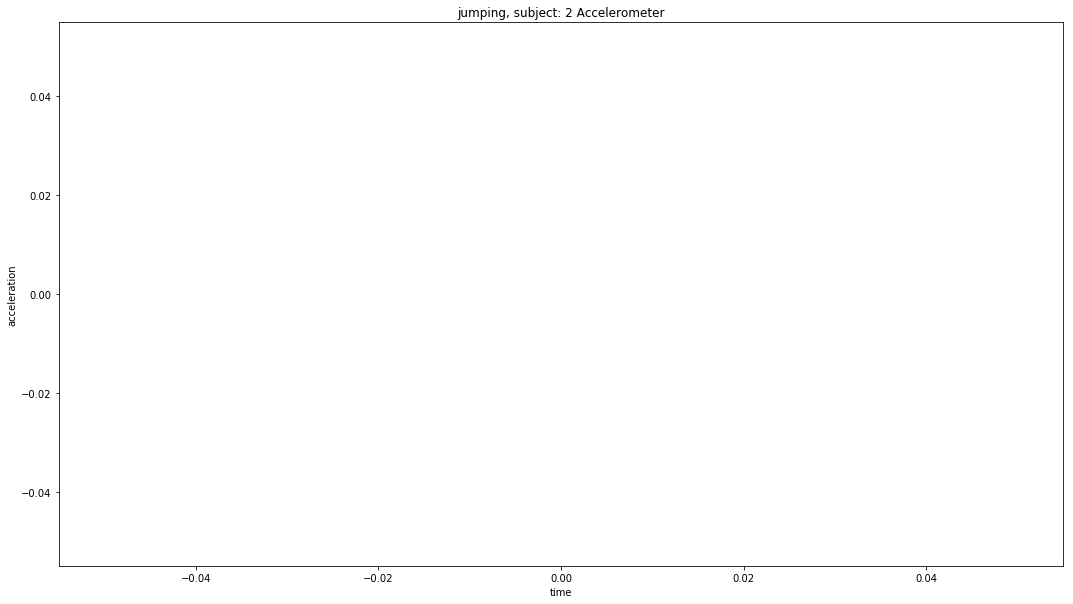

<Figure size 432x288 with 0 Axes>

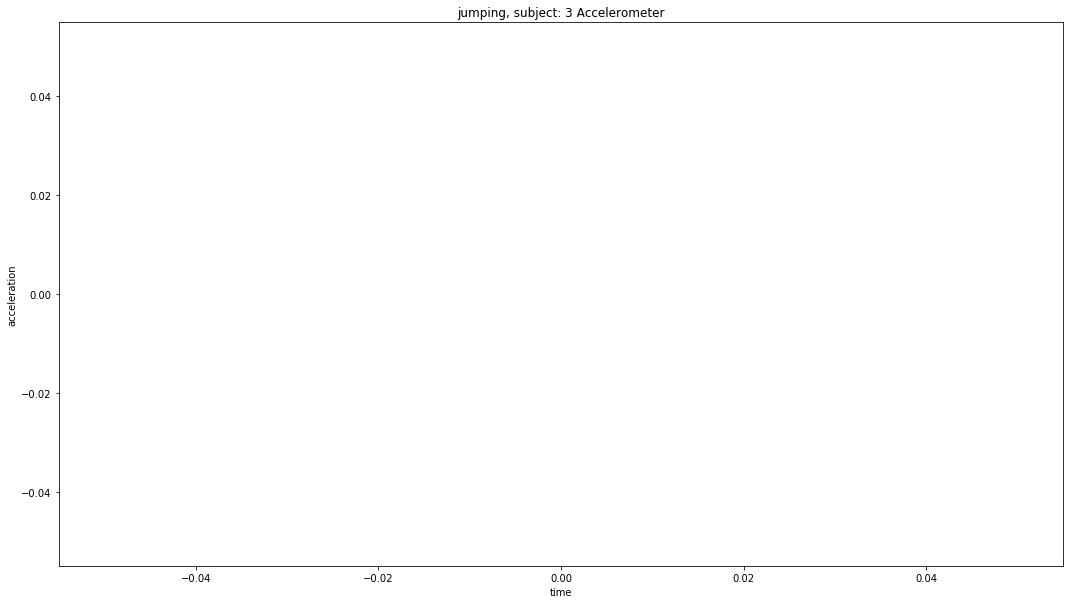

<Figure size 432x288 with 0 Axes>

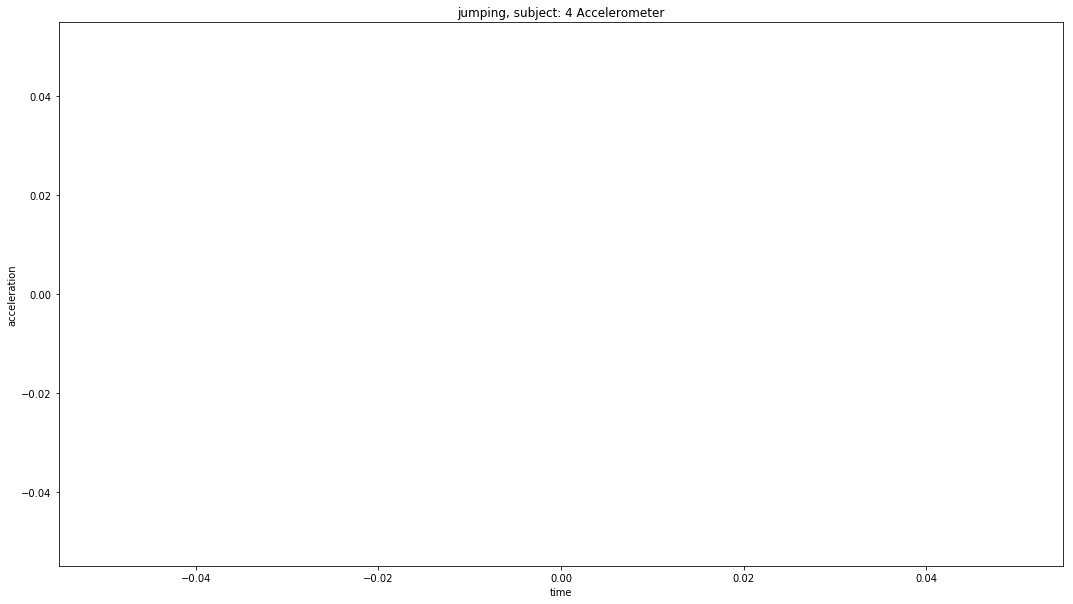

<Figure size 432x288 with 0 Axes>

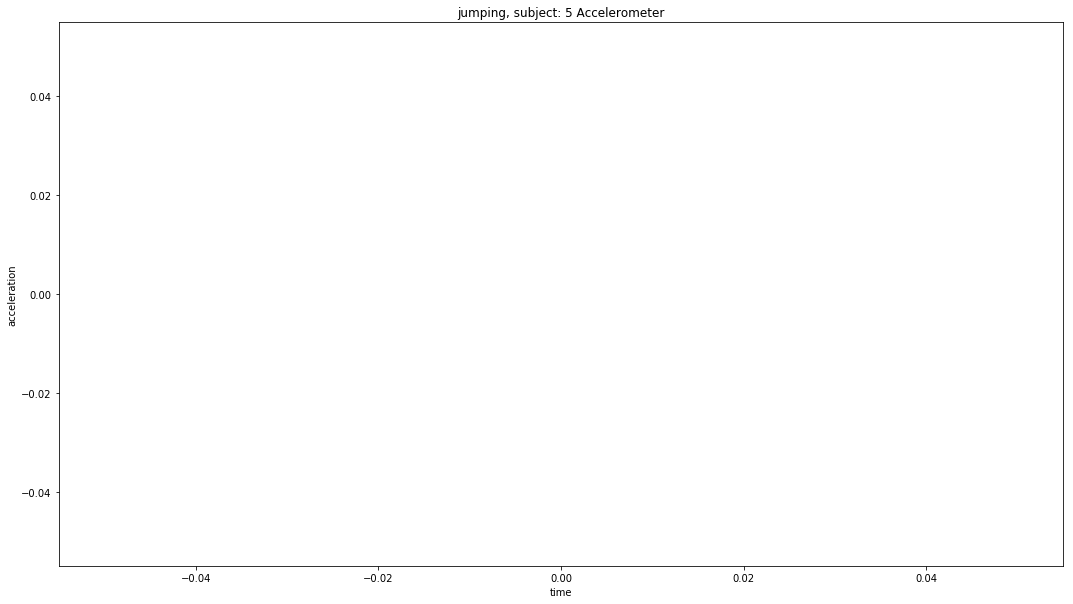

<Figure size 432x288 with 0 Axes>

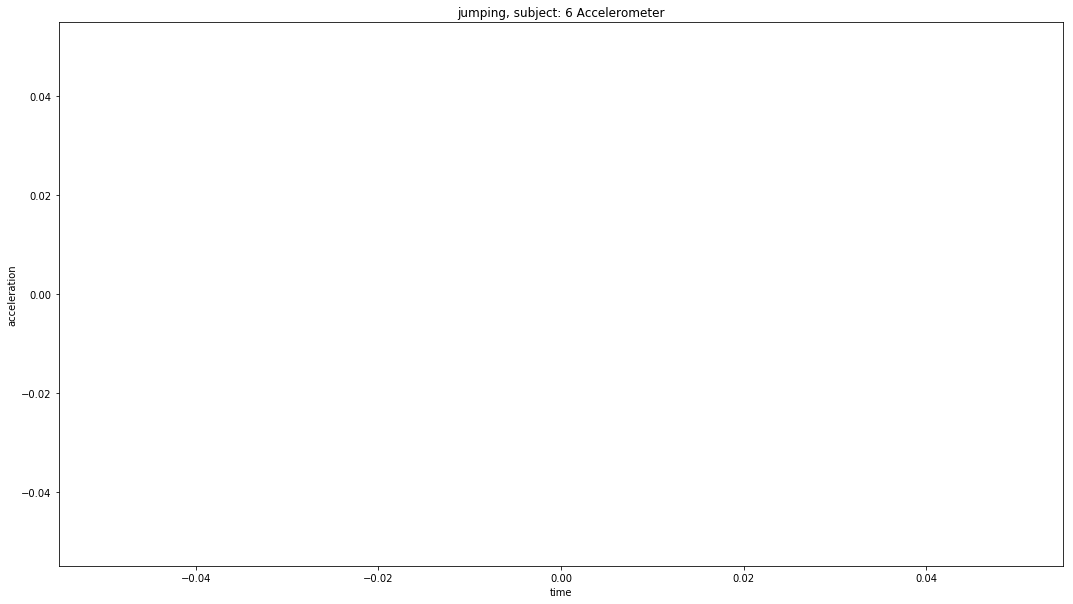

<Figure size 432x288 with 0 Axes>

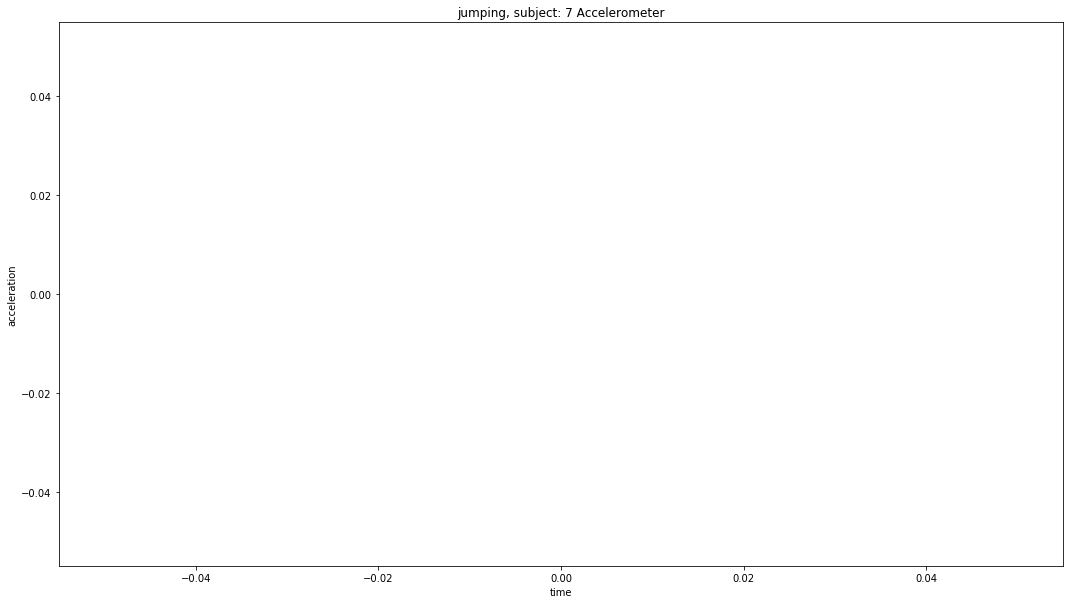

<Figure size 432x288 with 0 Axes>

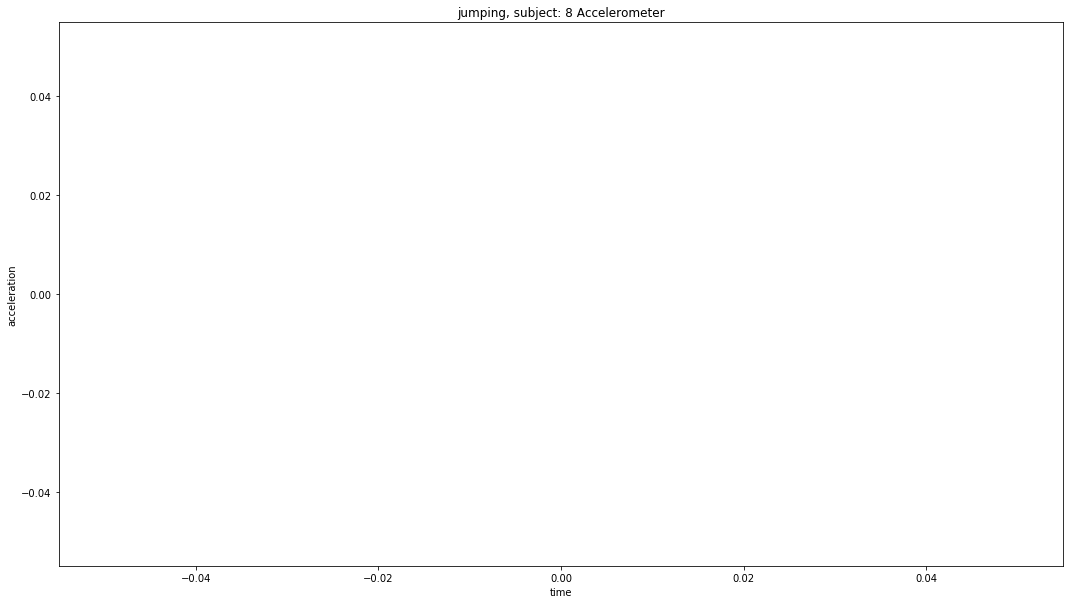

<Figure size 432x288 with 0 Axes>

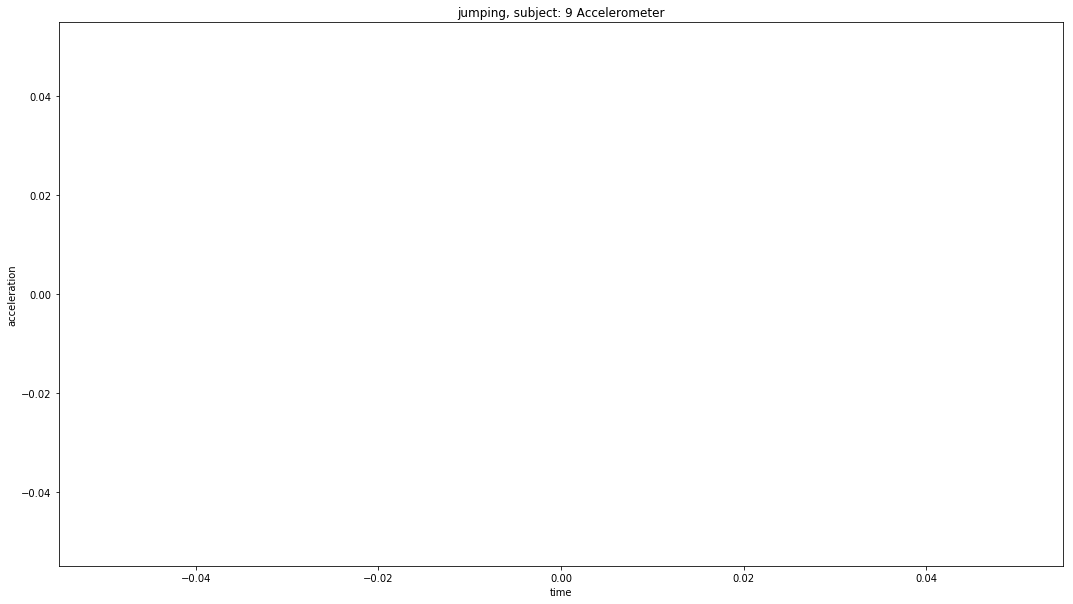

<Figure size 432x288 with 0 Axes>

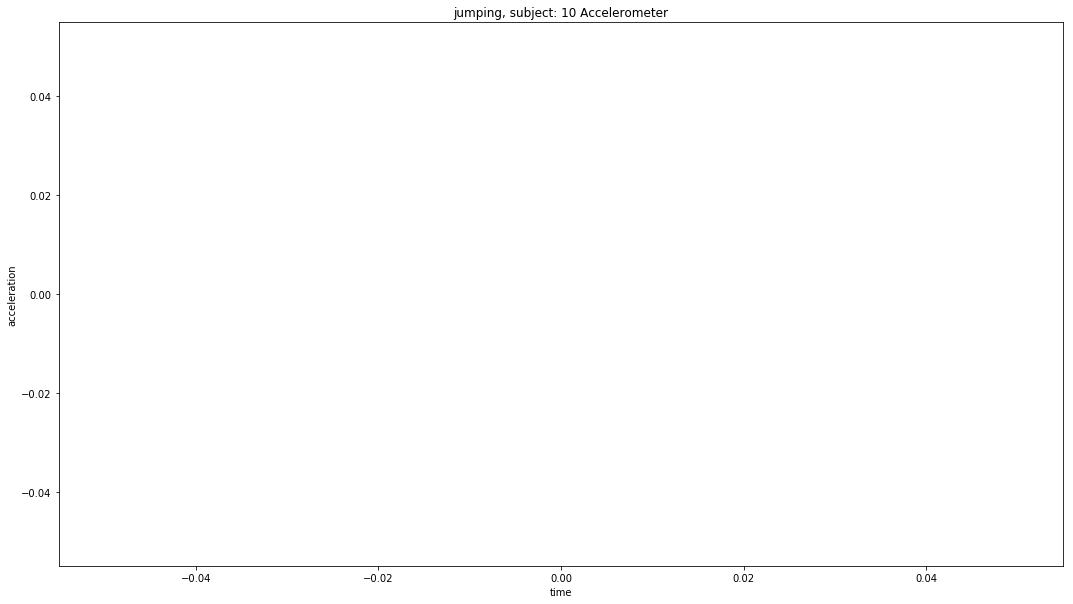

<Figure size 432x288 with 0 Axes>

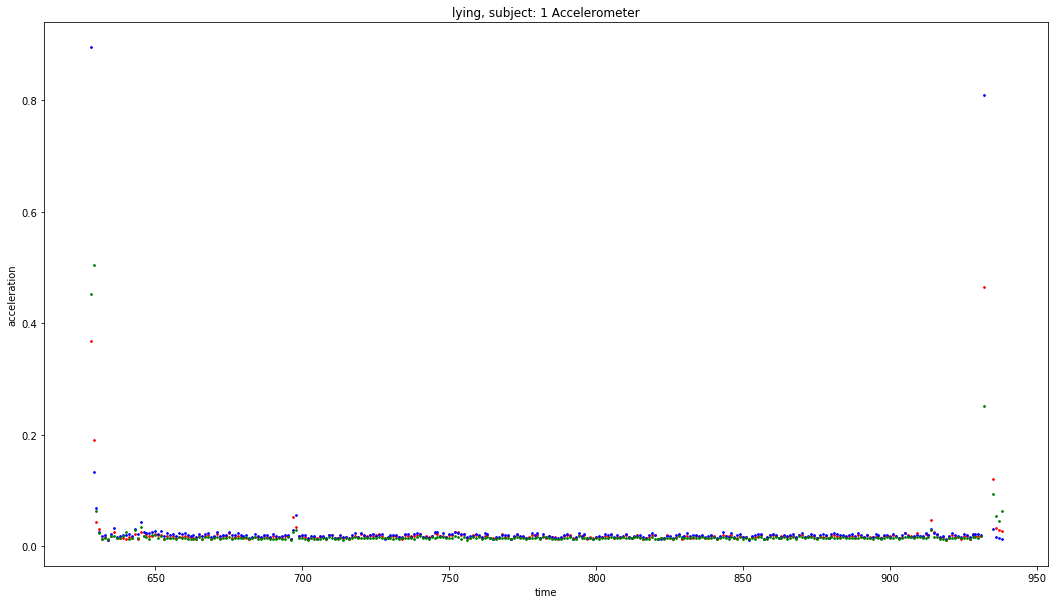

<Figure size 432x288 with 0 Axes>

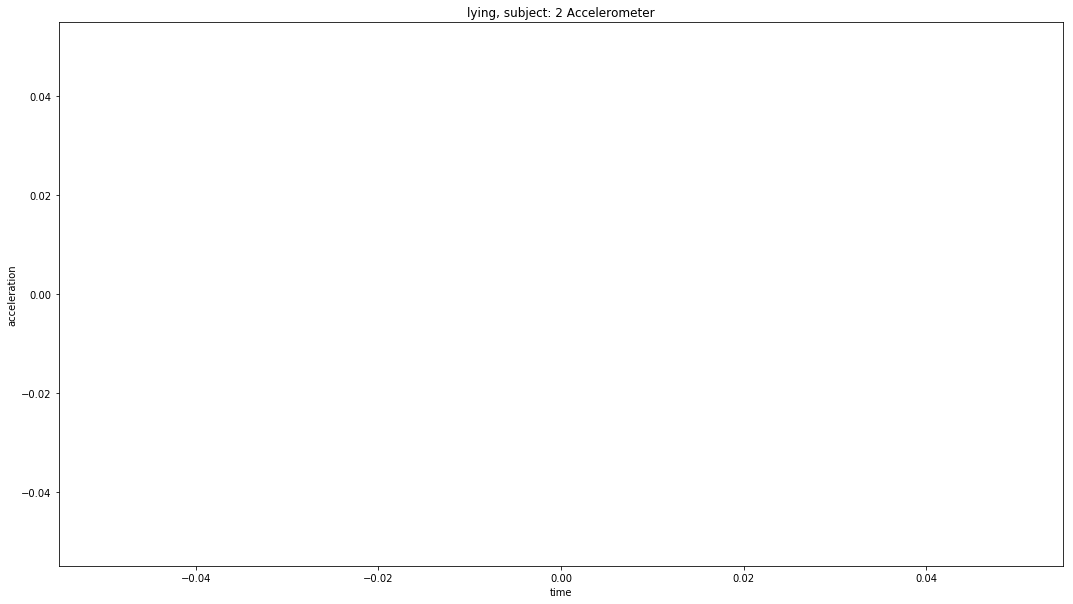

<Figure size 432x288 with 0 Axes>

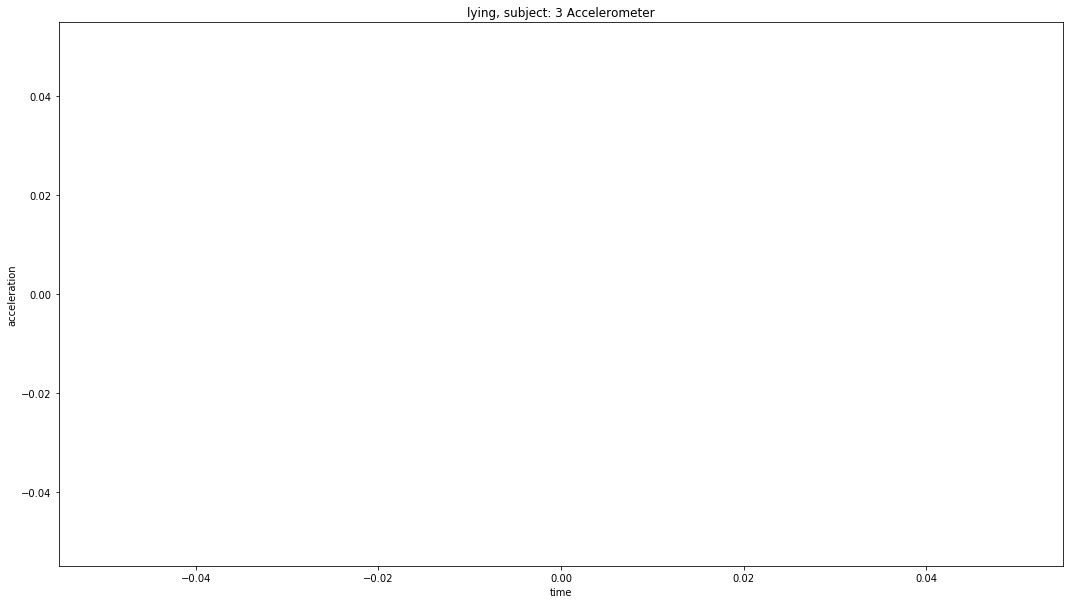

<Figure size 432x288 with 0 Axes>

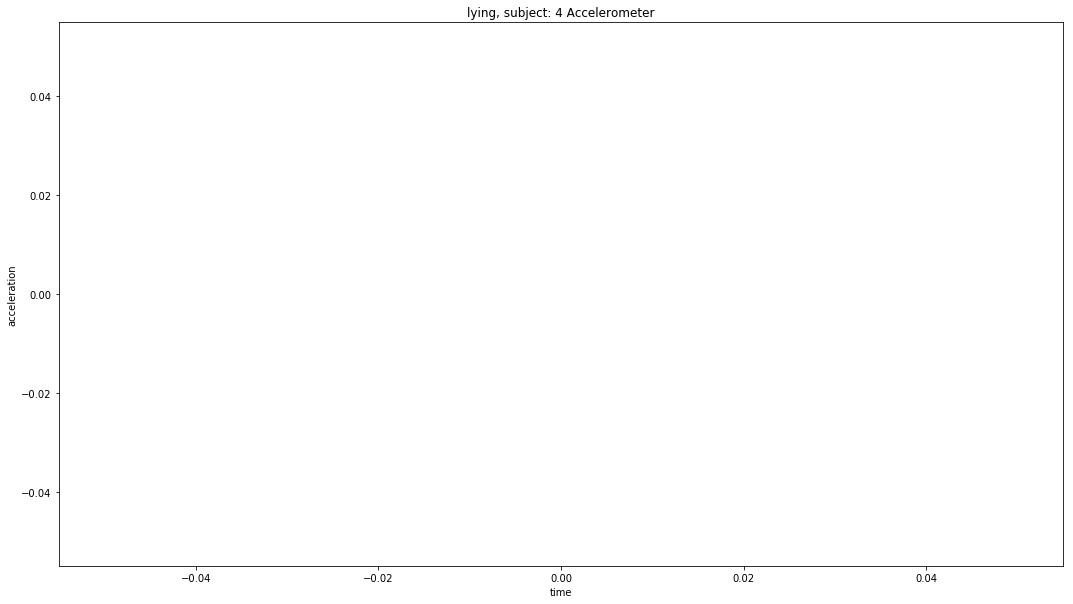

<Figure size 432x288 with 0 Axes>

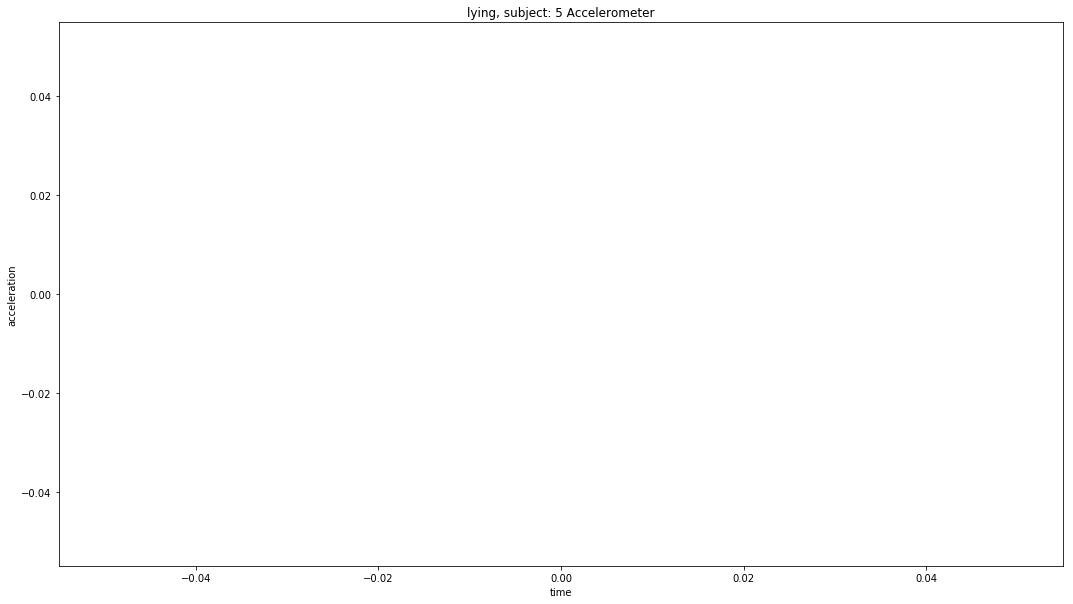

<Figure size 432x288 with 0 Axes>

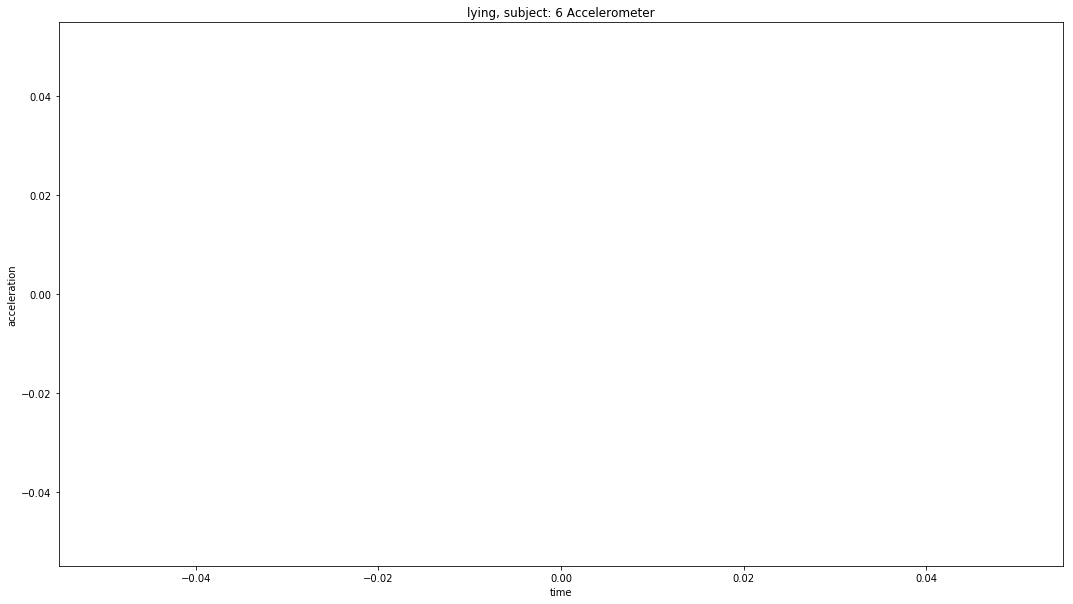

<Figure size 432x288 with 0 Axes>

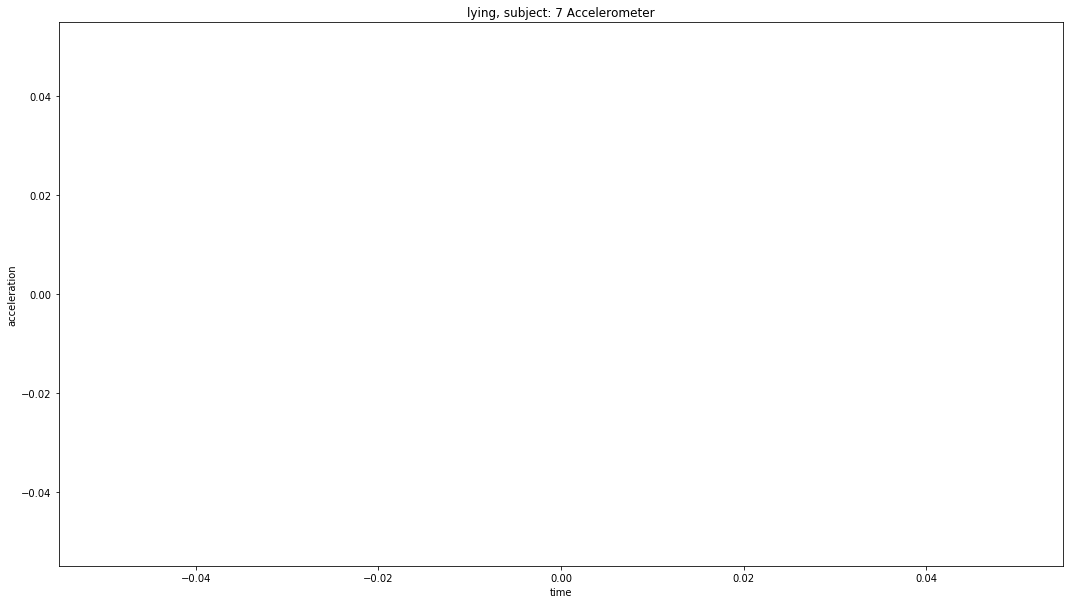

<Figure size 432x288 with 0 Axes>

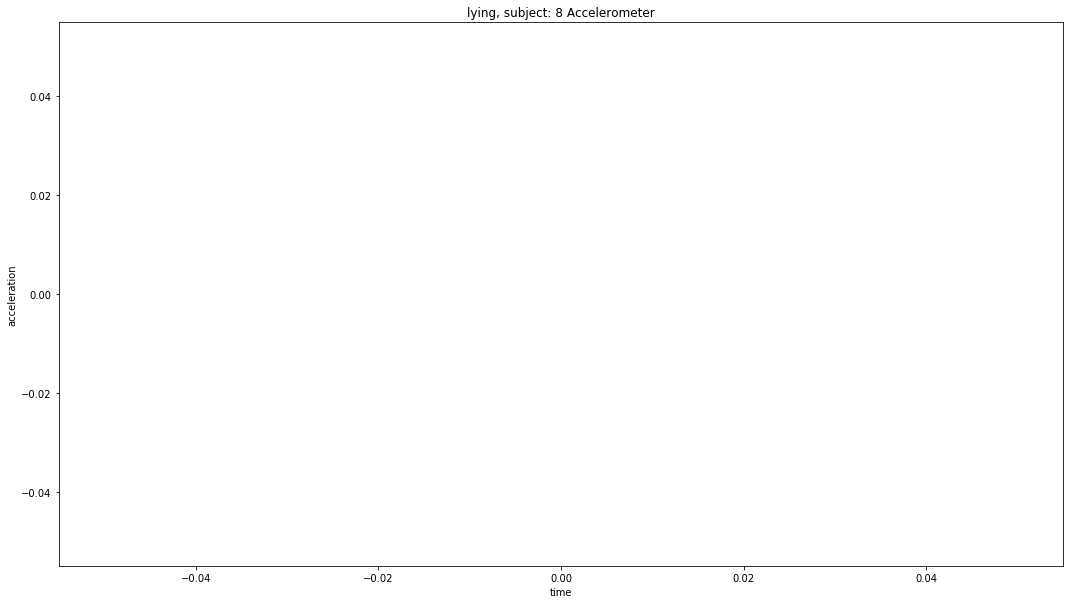

<Figure size 432x288 with 0 Axes>

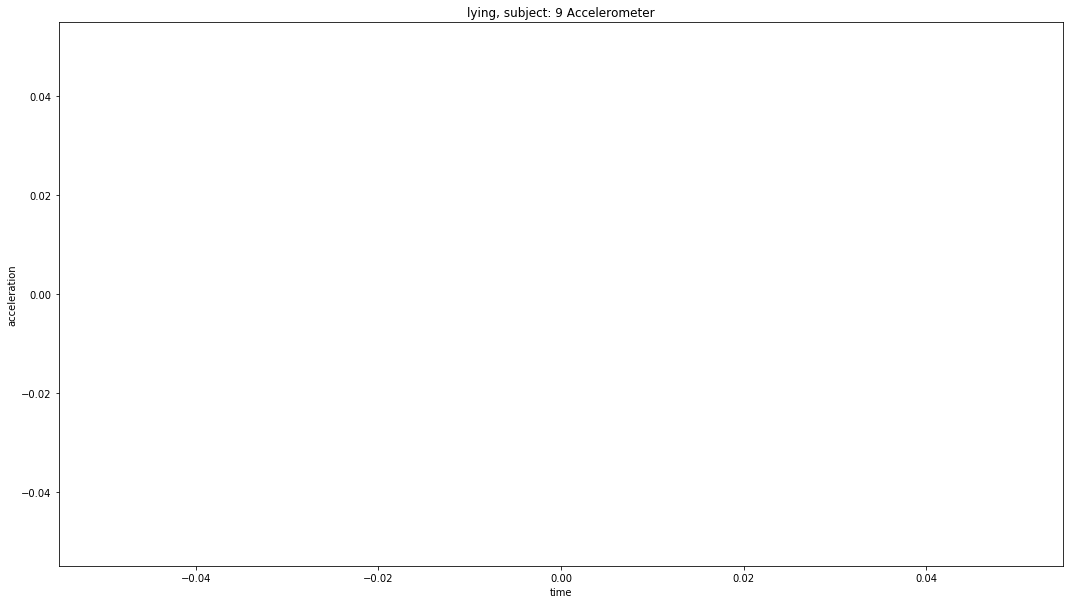

<Figure size 432x288 with 0 Axes>

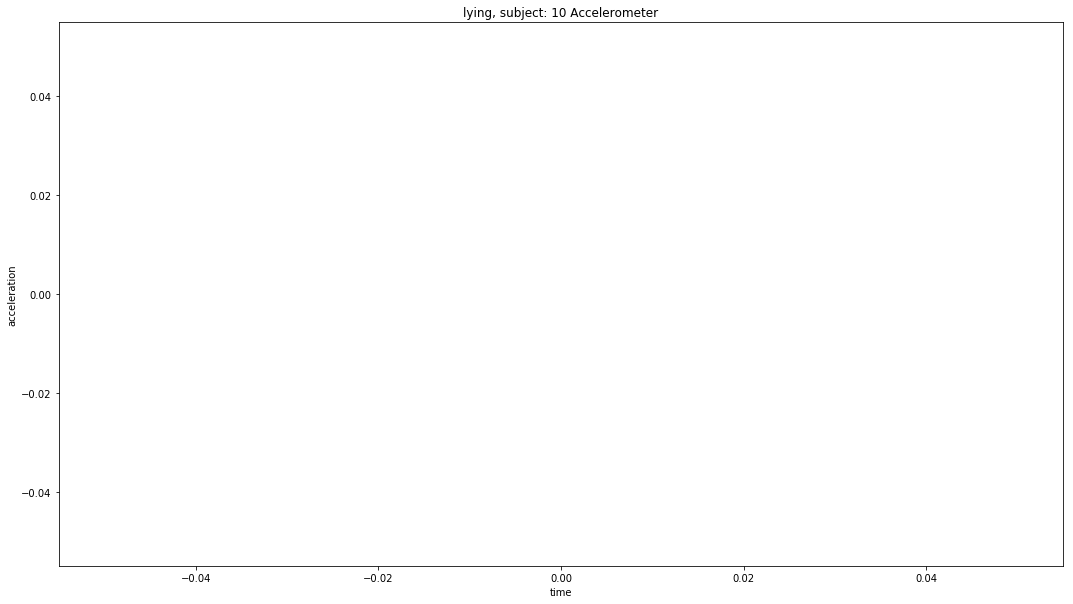

<Figure size 432x288 with 0 Axes>

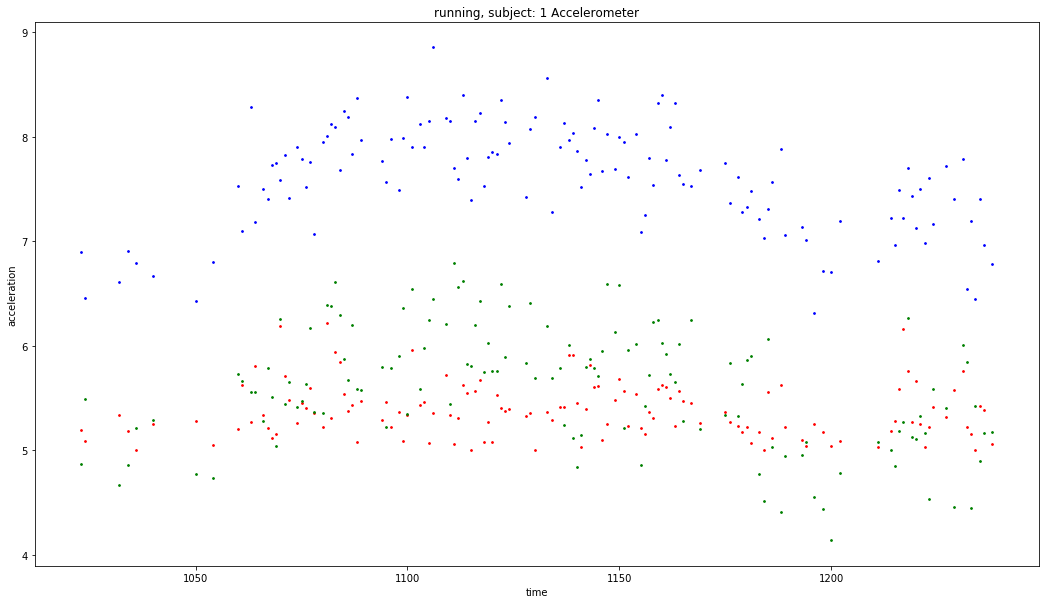

<Figure size 432x288 with 0 Axes>

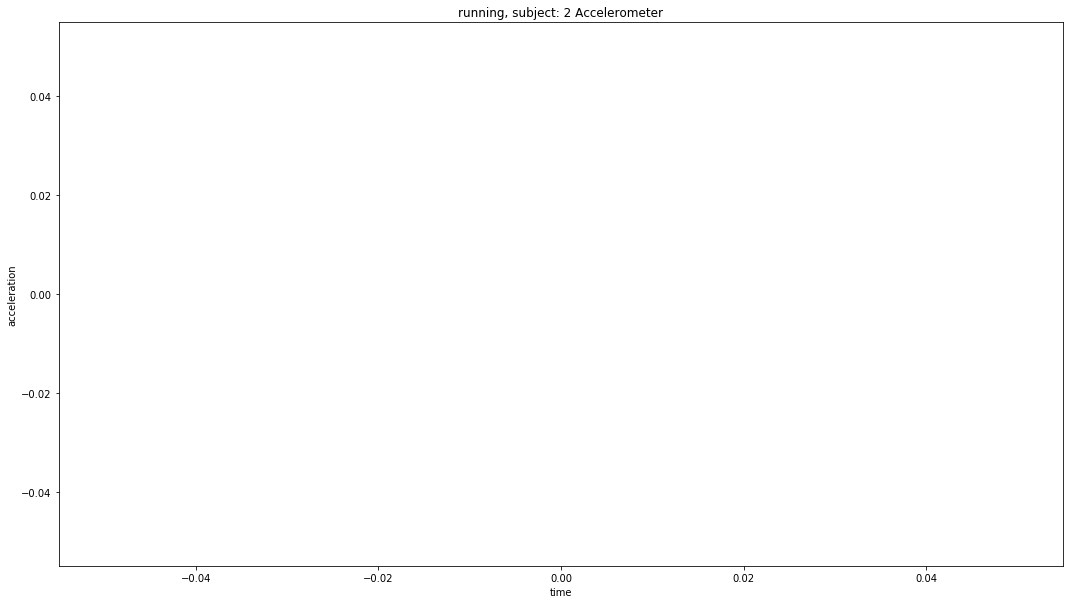

<Figure size 432x288 with 0 Axes>

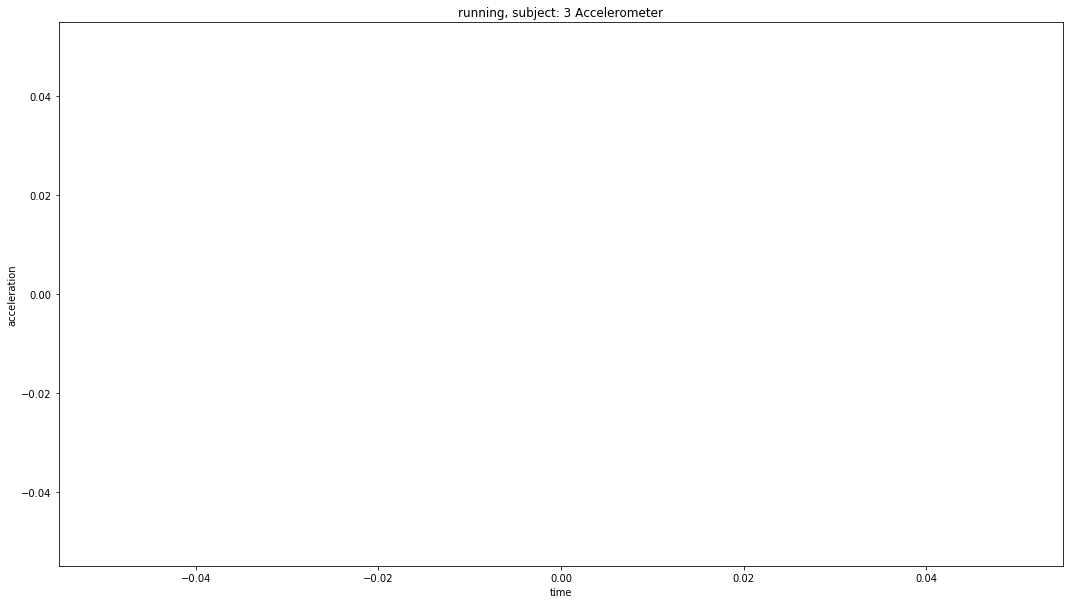

<Figure size 432x288 with 0 Axes>

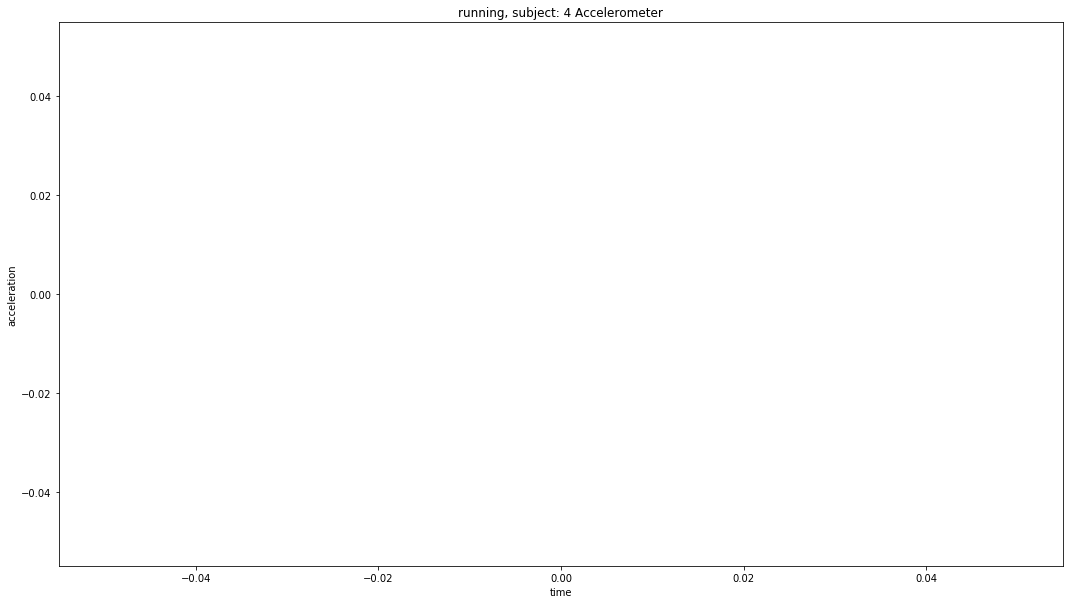

<Figure size 432x288 with 0 Axes>

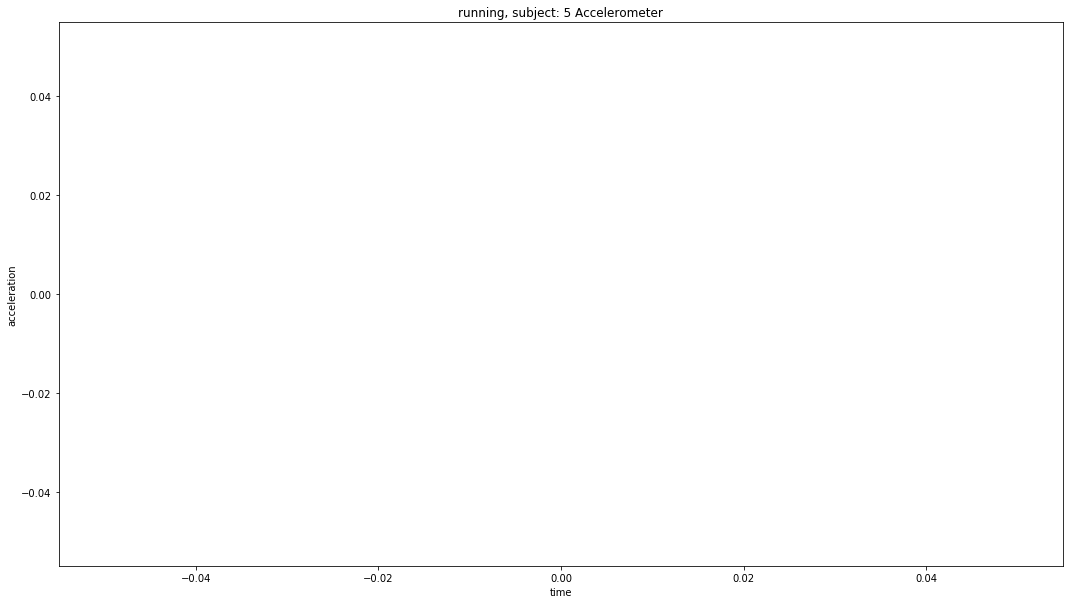

<Figure size 432x288 with 0 Axes>

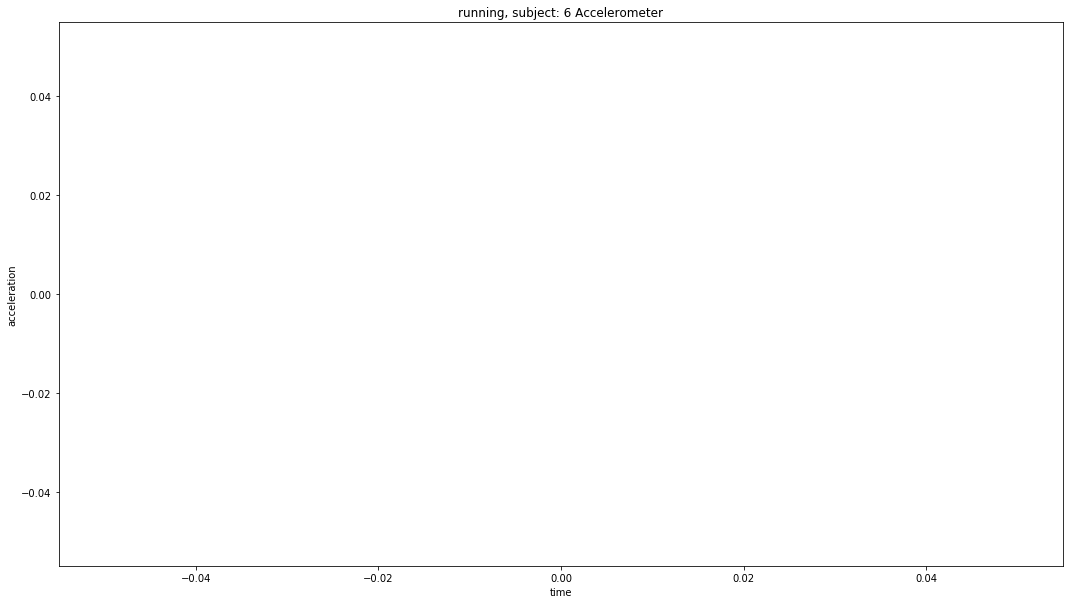

<Figure size 432x288 with 0 Axes>

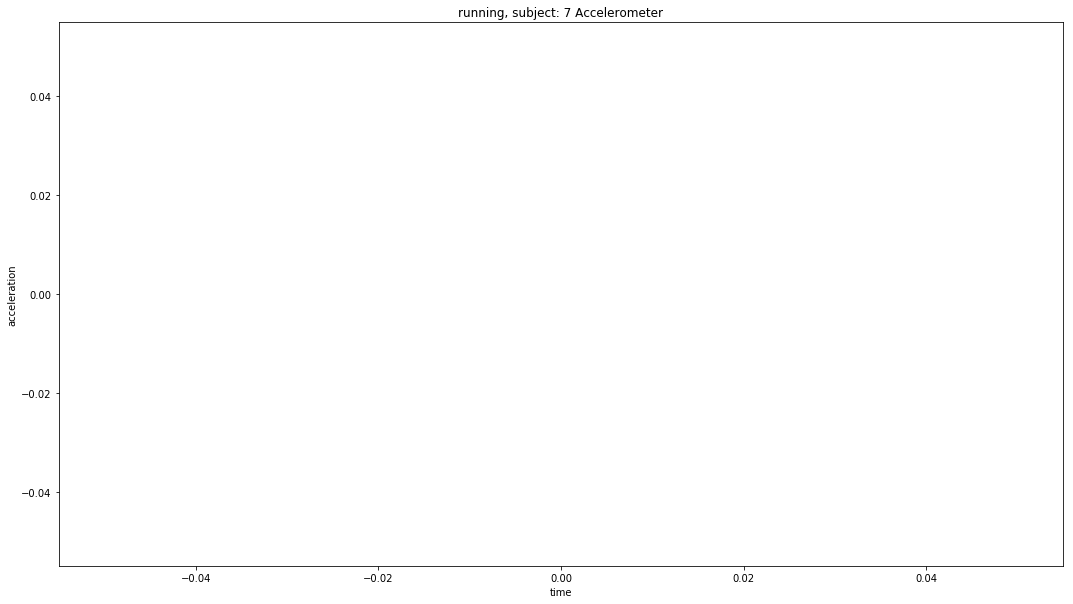

<Figure size 432x288 with 0 Axes>

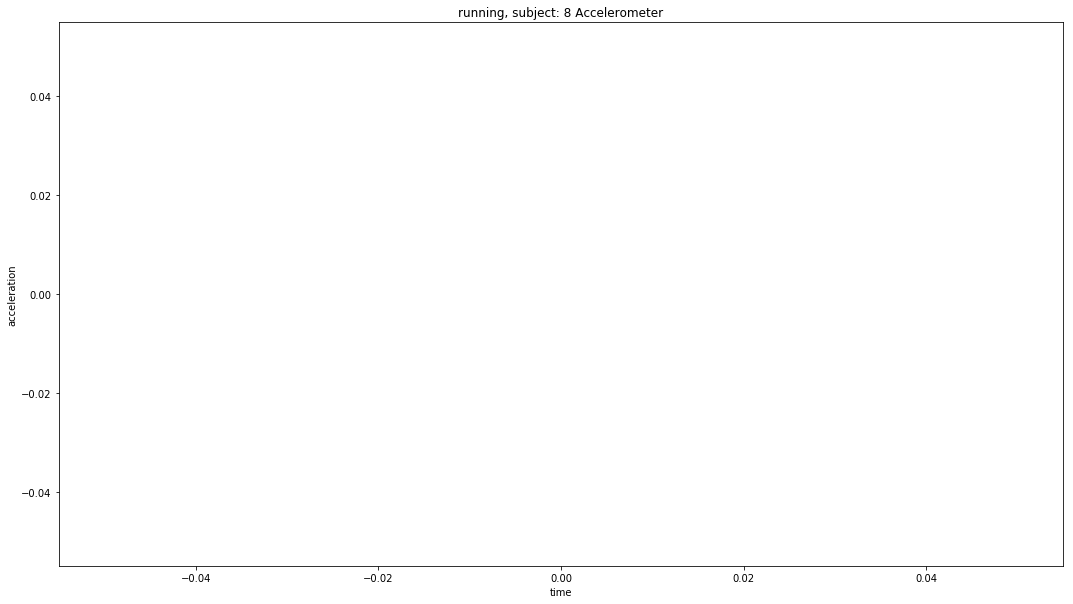

<Figure size 432x288 with 0 Axes>

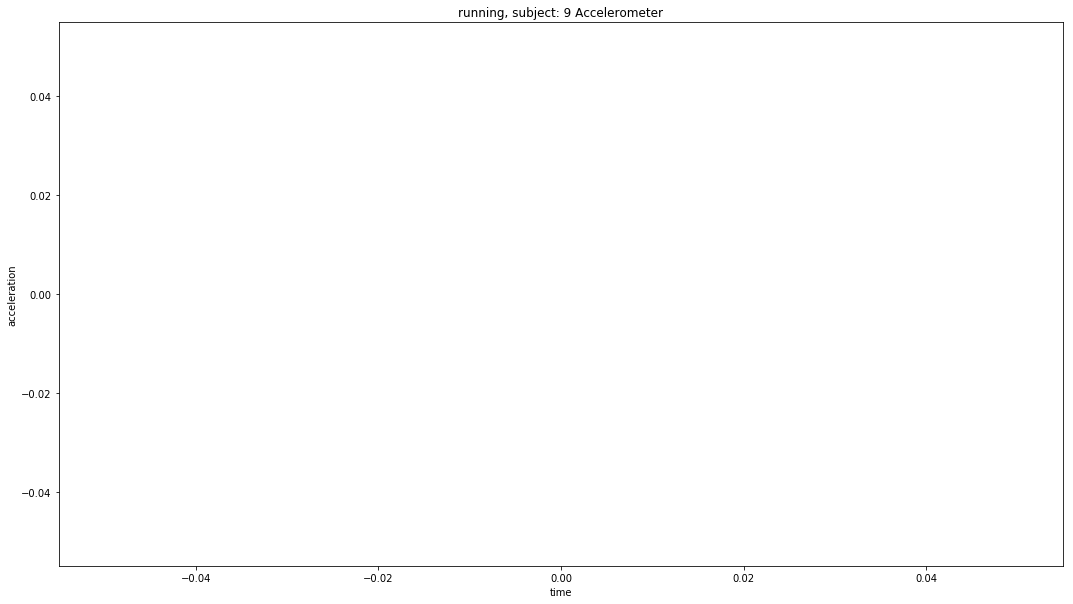

<Figure size 432x288 with 0 Axes>

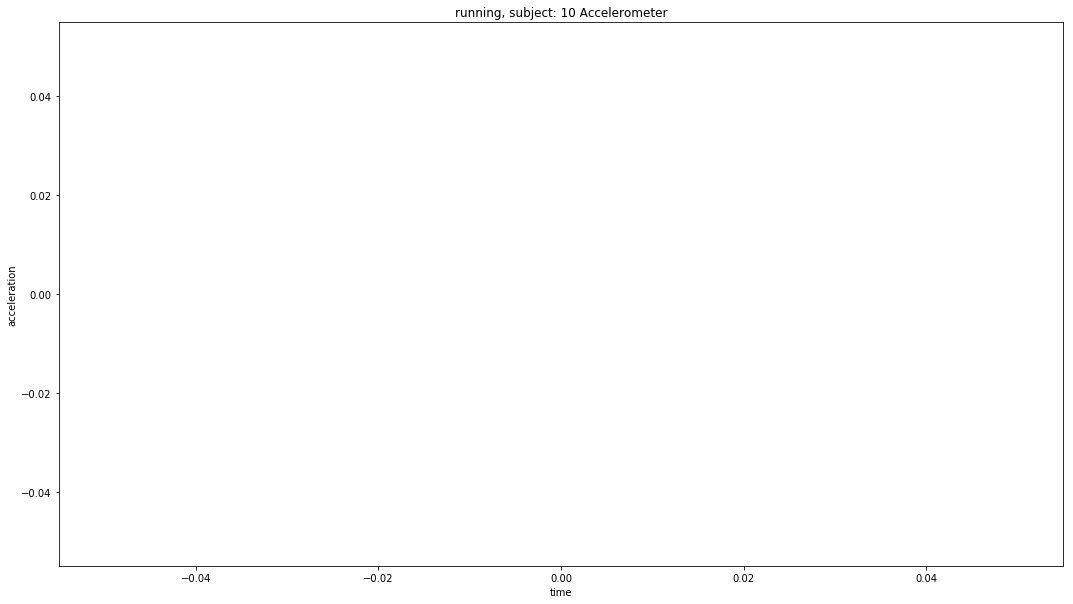

<Figure size 432x288 with 0 Axes>

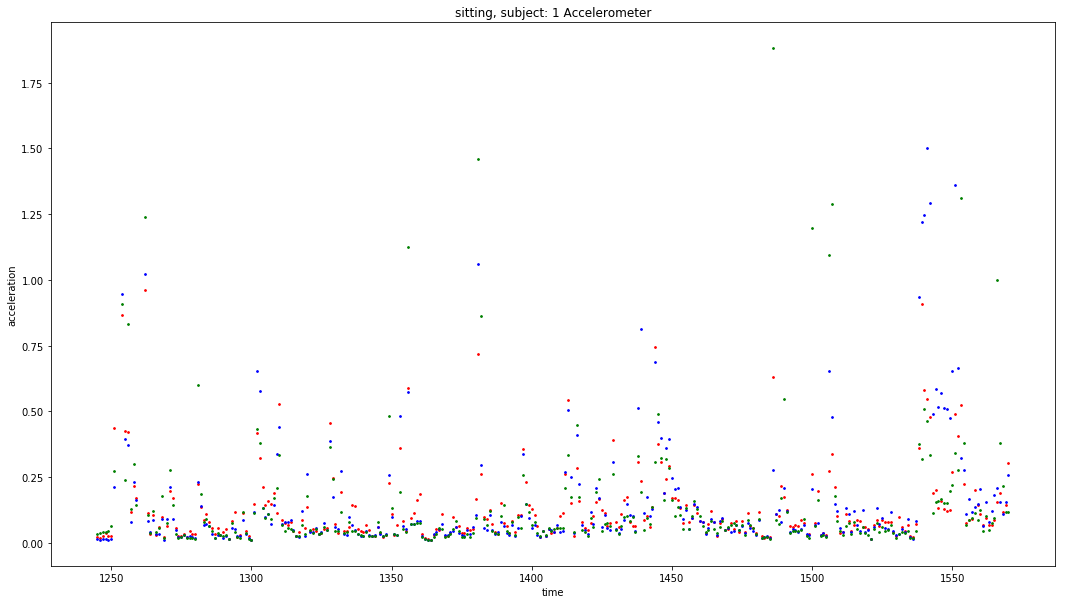

<Figure size 432x288 with 0 Axes>

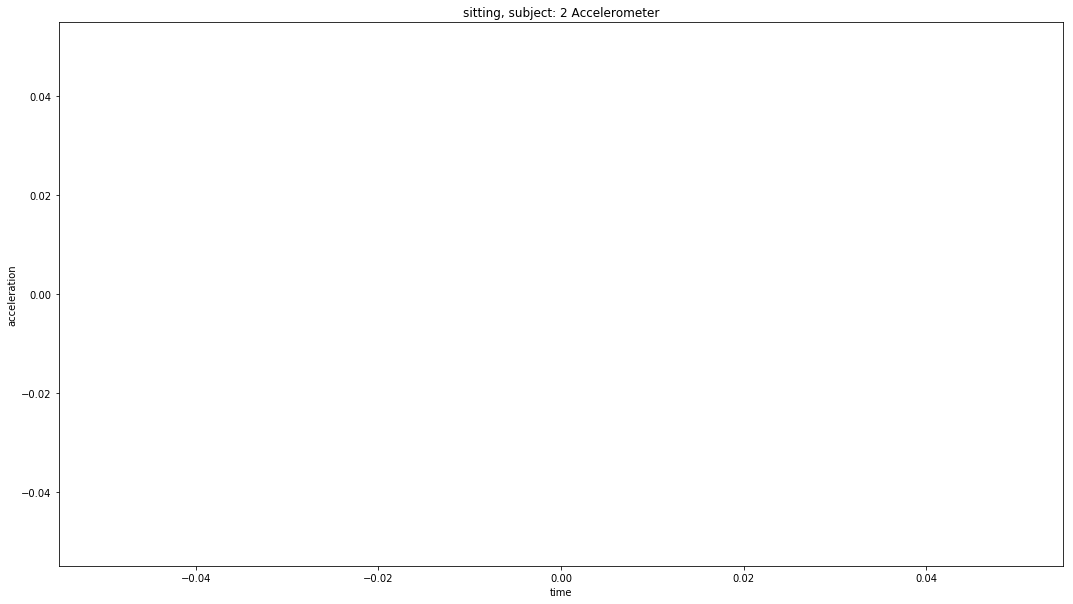

<Figure size 432x288 with 0 Axes>

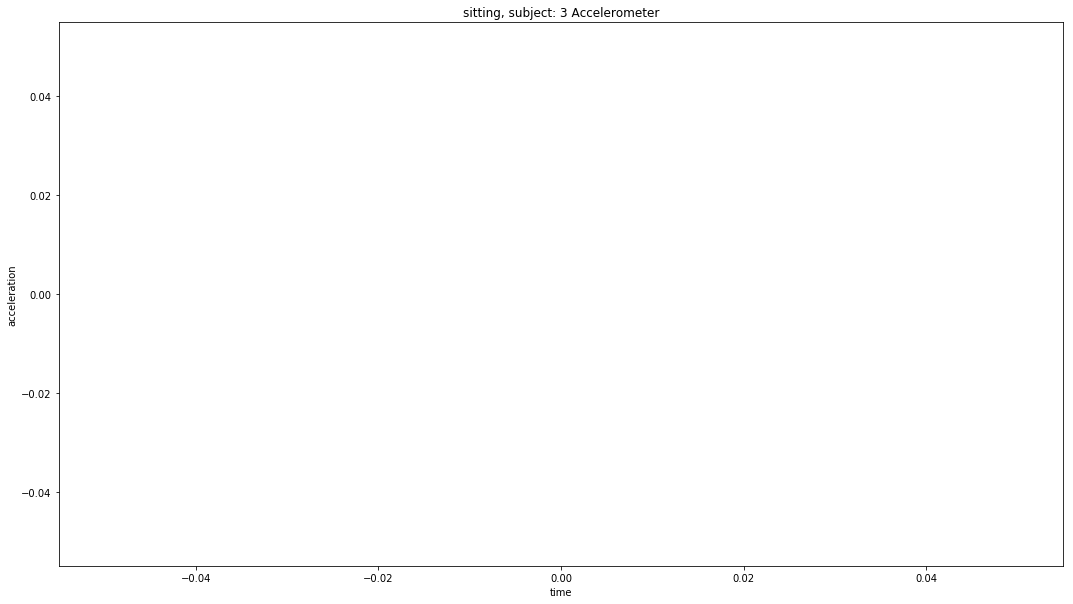

<Figure size 432x288 with 0 Axes>

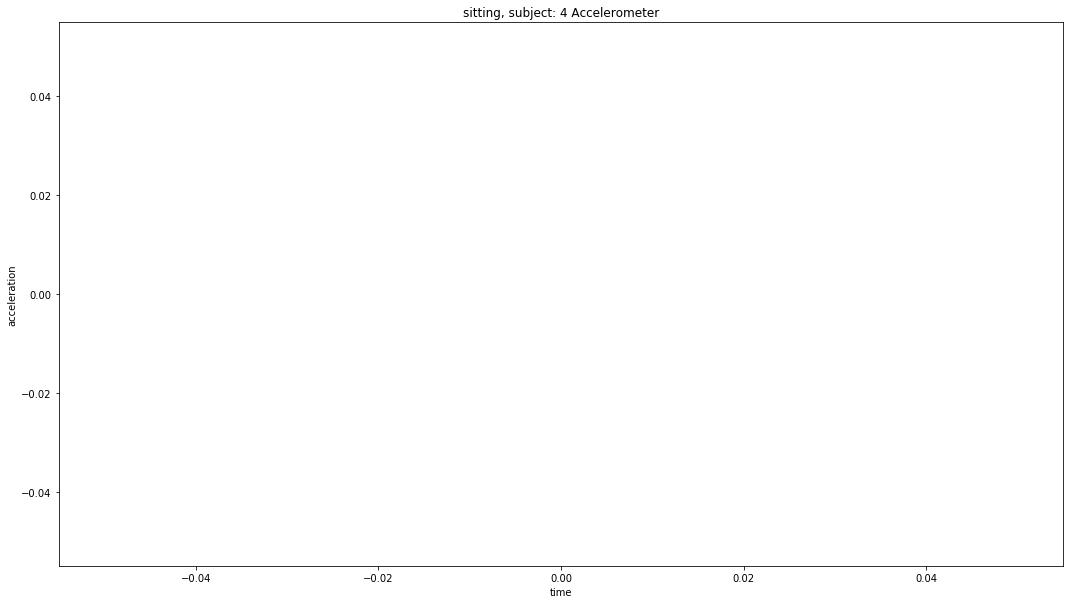

<Figure size 432x288 with 0 Axes>

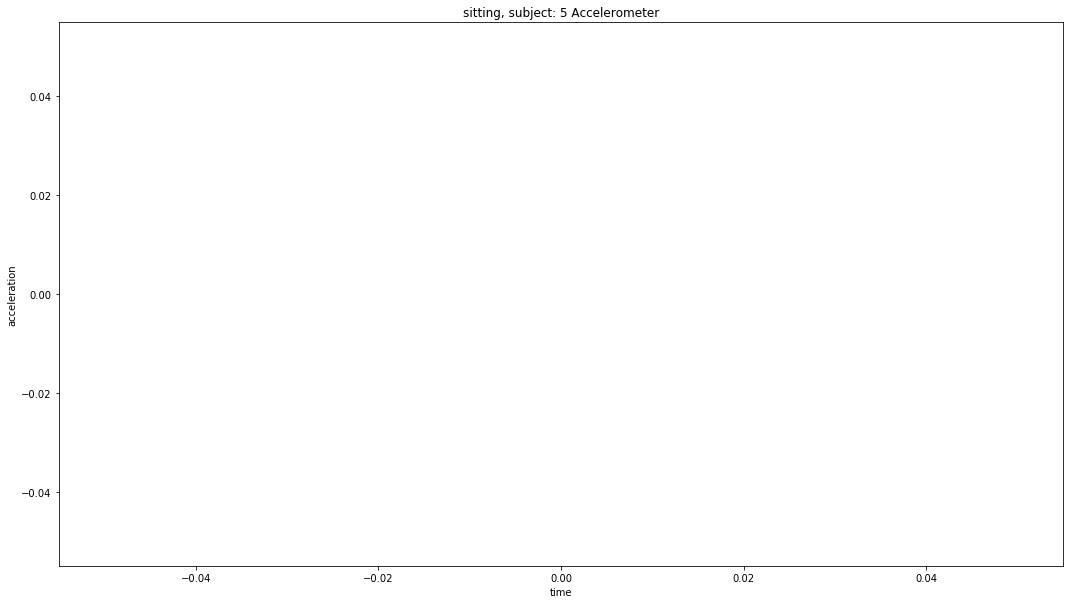

<Figure size 432x288 with 0 Axes>

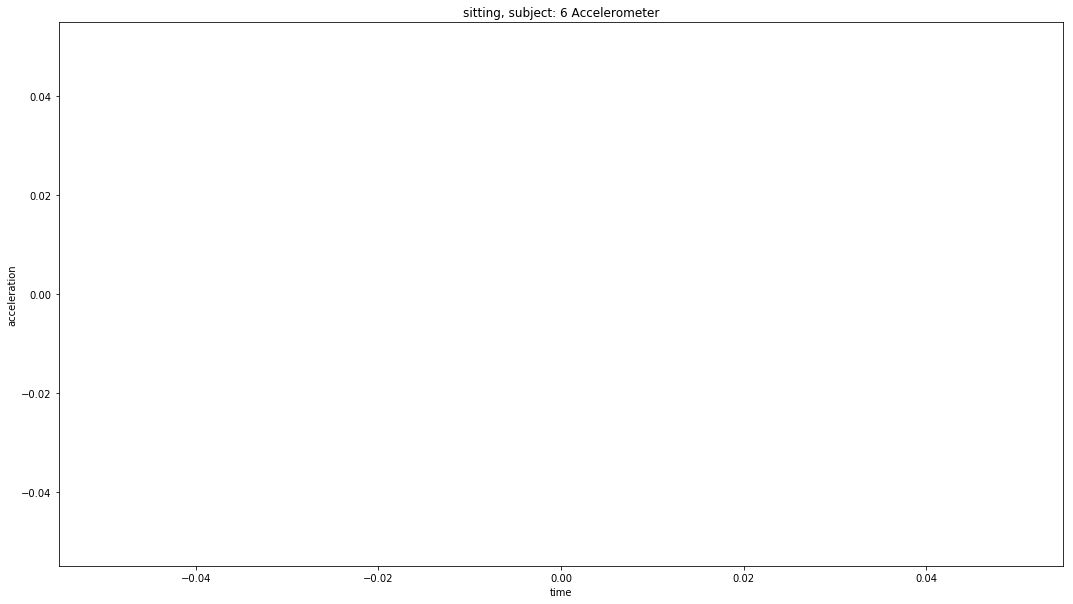

<Figure size 432x288 with 0 Axes>

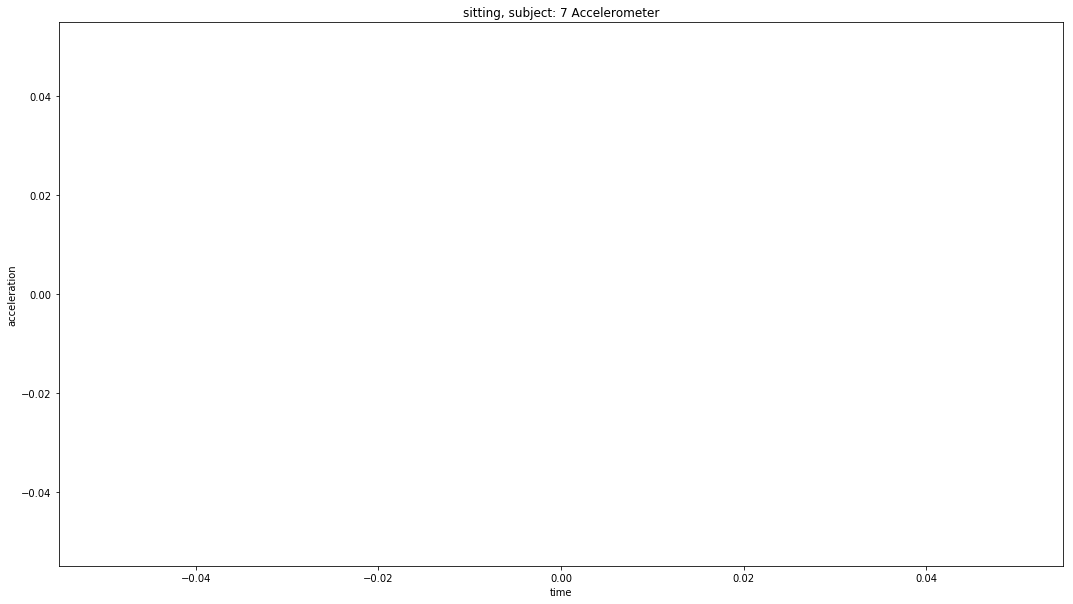

<Figure size 432x288 with 0 Axes>

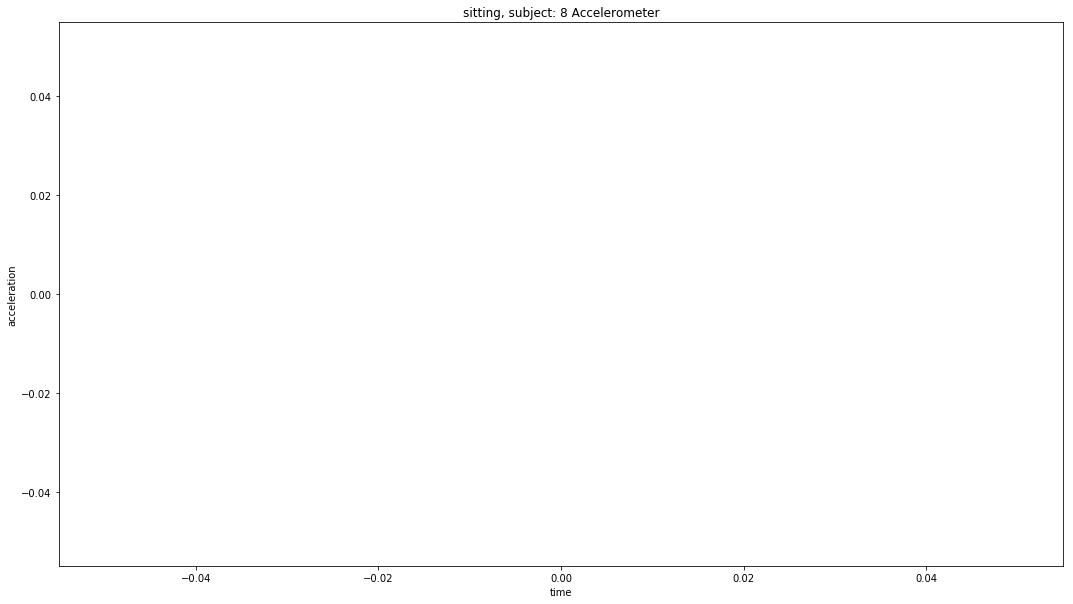

<Figure size 432x288 with 0 Axes>

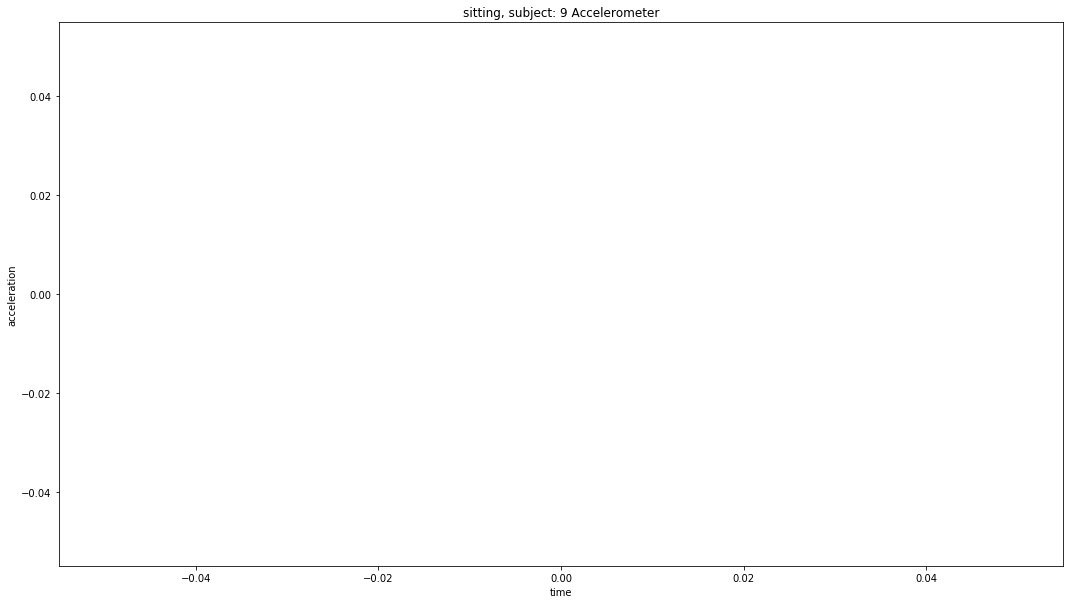

<Figure size 432x288 with 0 Axes>

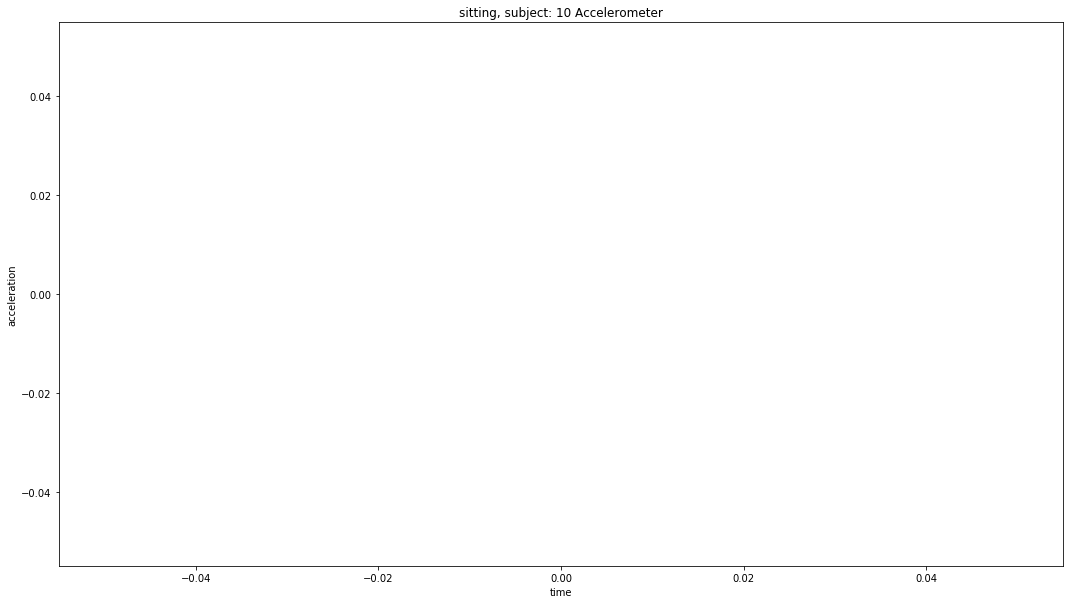

<Figure size 432x288 with 0 Axes>

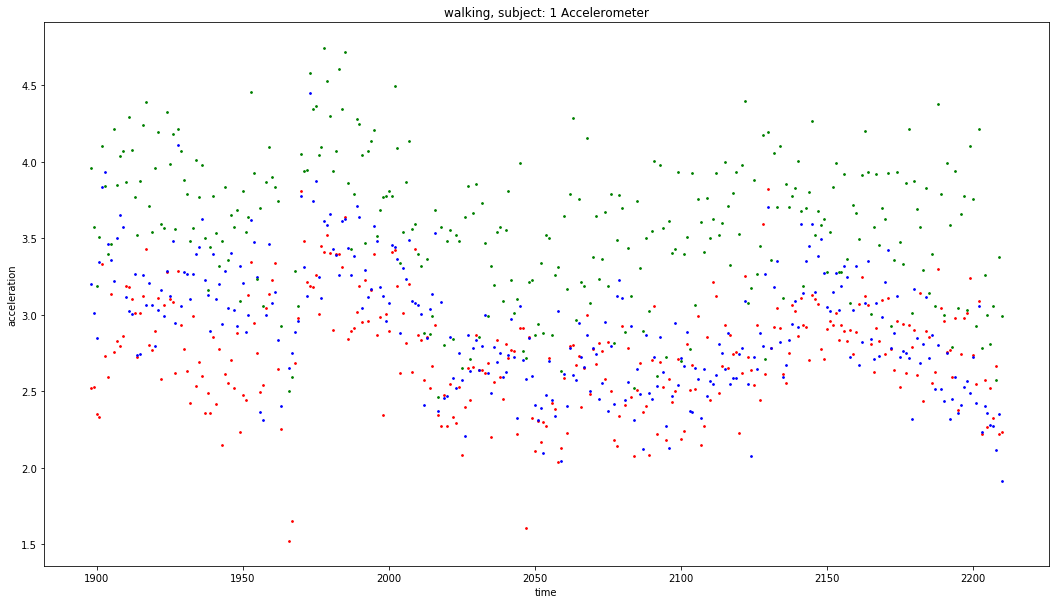

<Figure size 432x288 with 0 Axes>

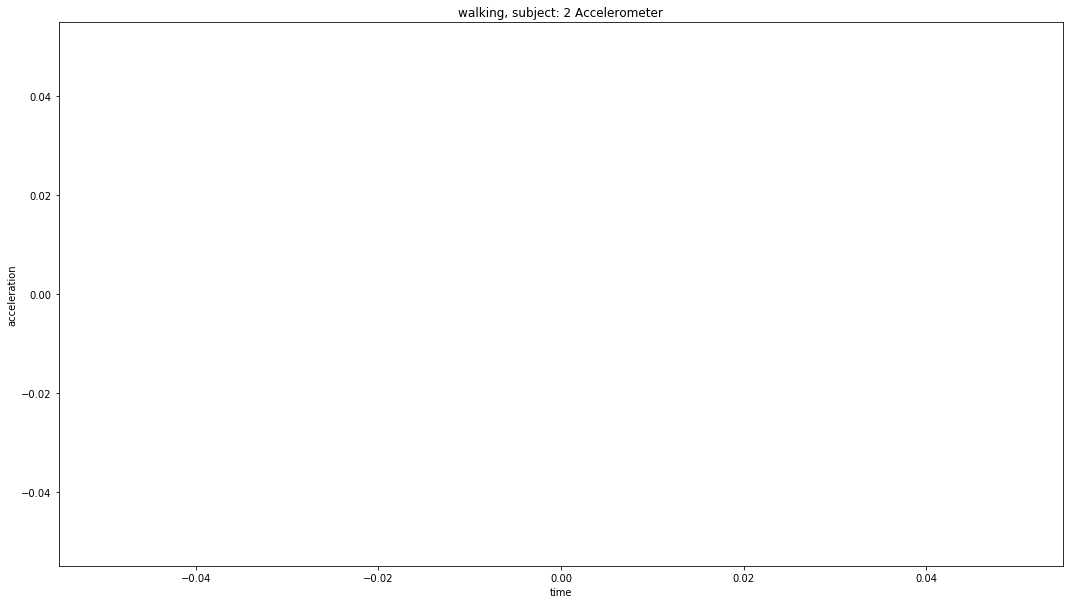

<Figure size 432x288 with 0 Axes>

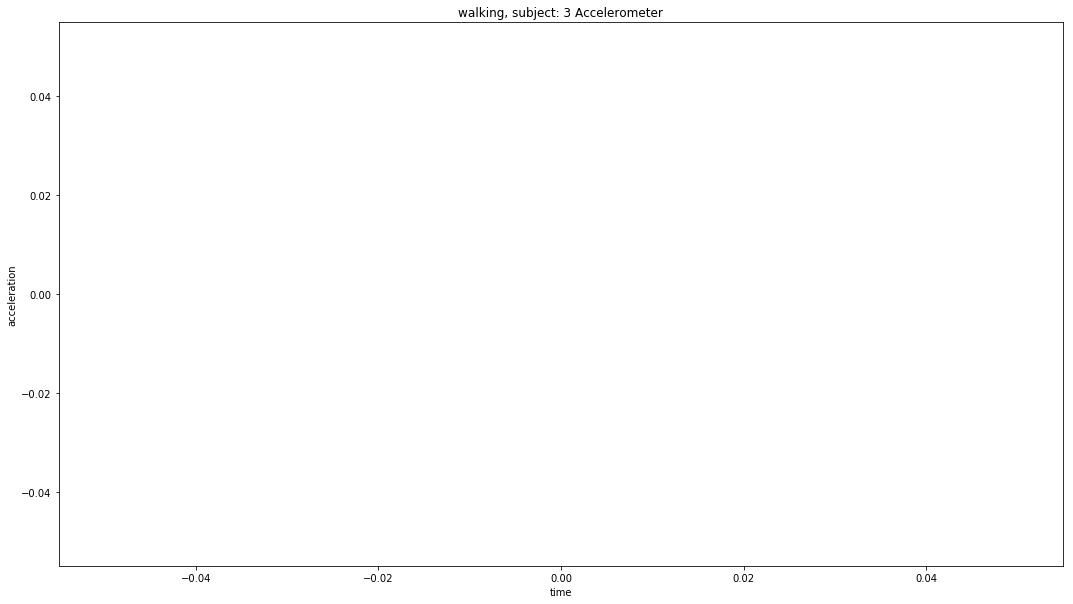

<Figure size 432x288 with 0 Axes>

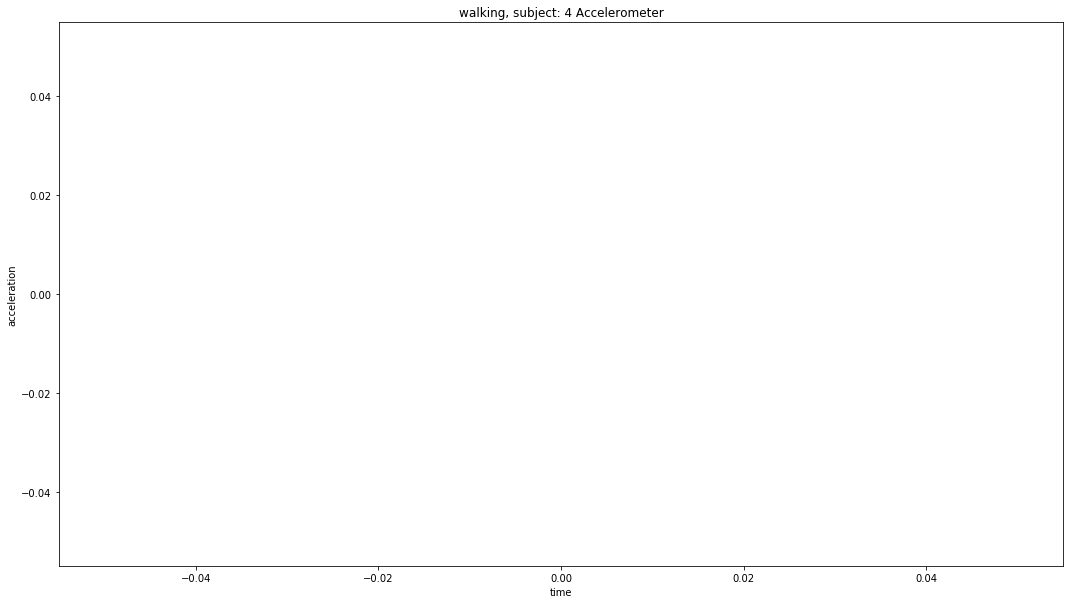

<Figure size 432x288 with 0 Axes>

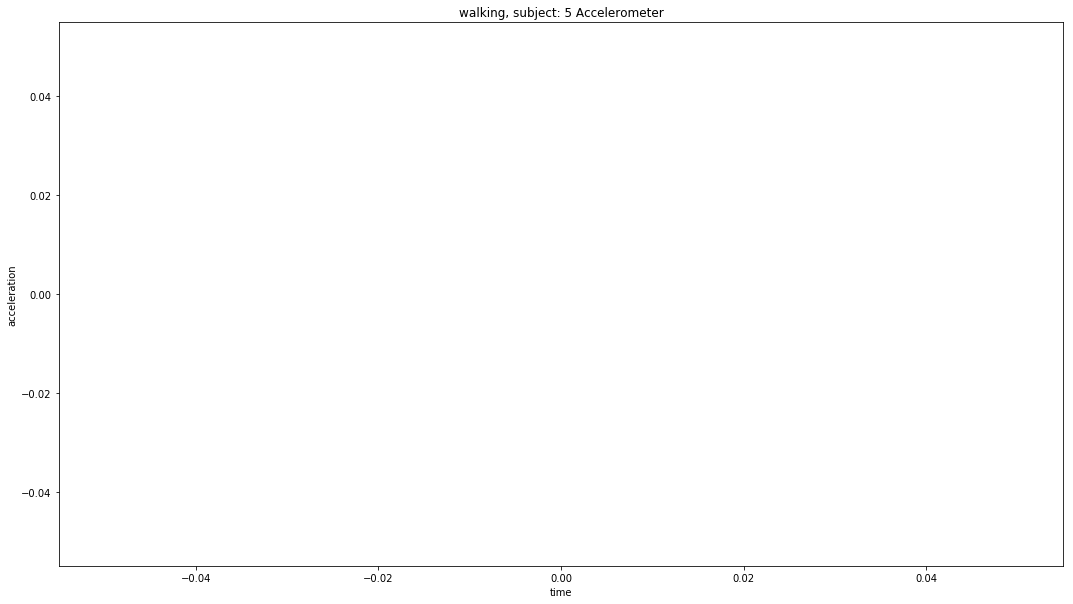

<Figure size 432x288 with 0 Axes>

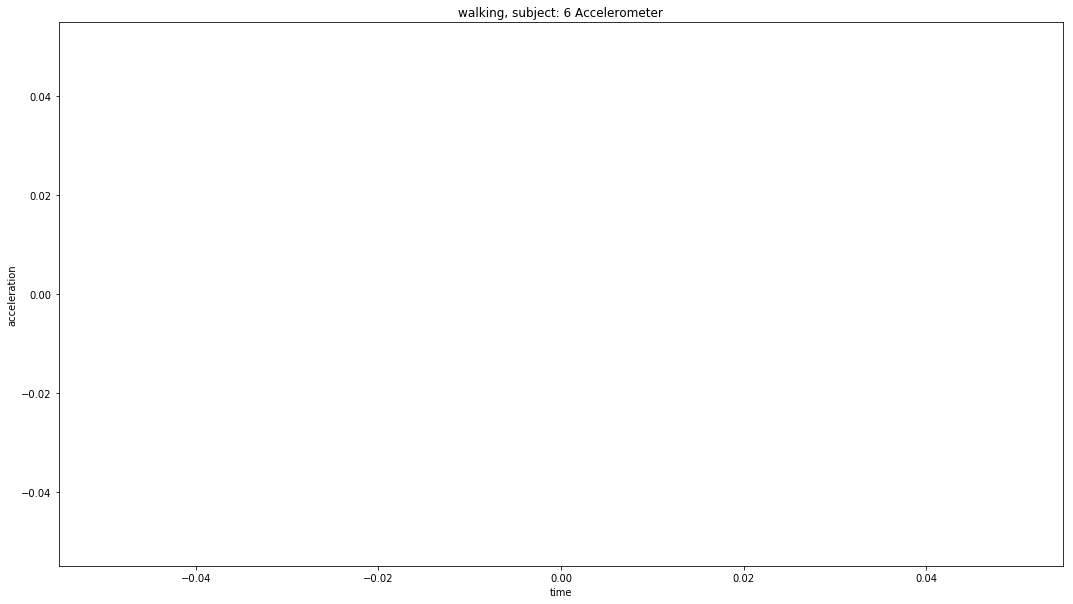

<Figure size 432x288 with 0 Axes>

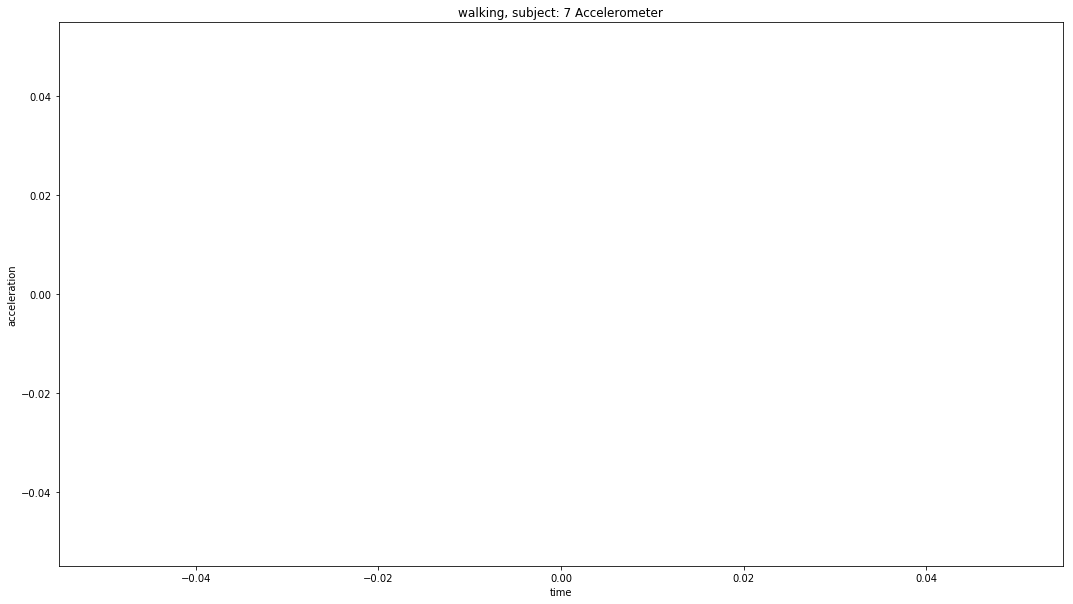

<Figure size 432x288 with 0 Axes>

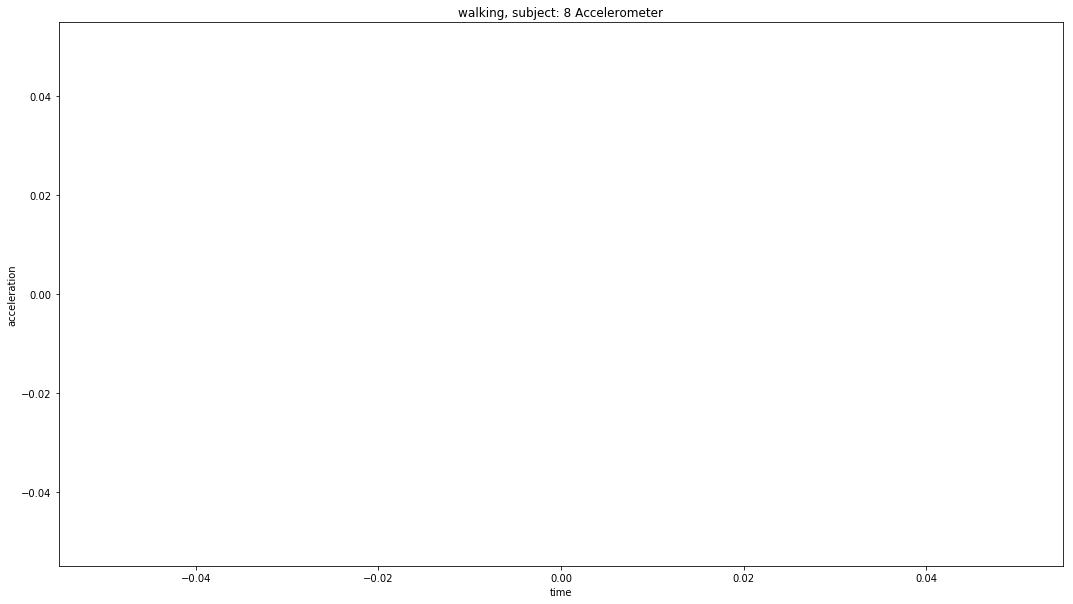

<Figure size 432x288 with 0 Axes>

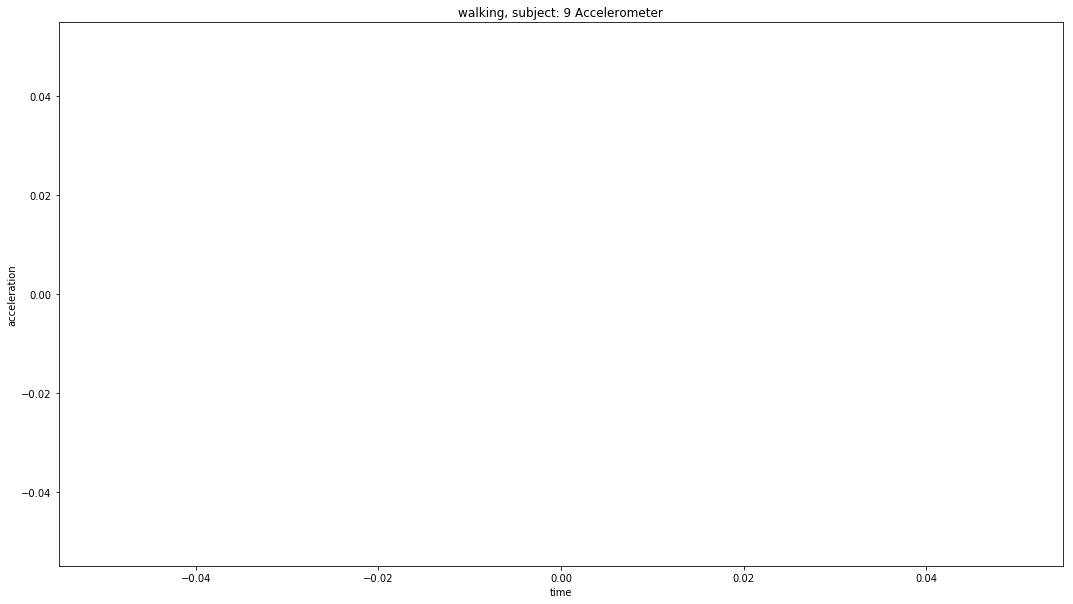

<Figure size 432x288 with 0 Axes>

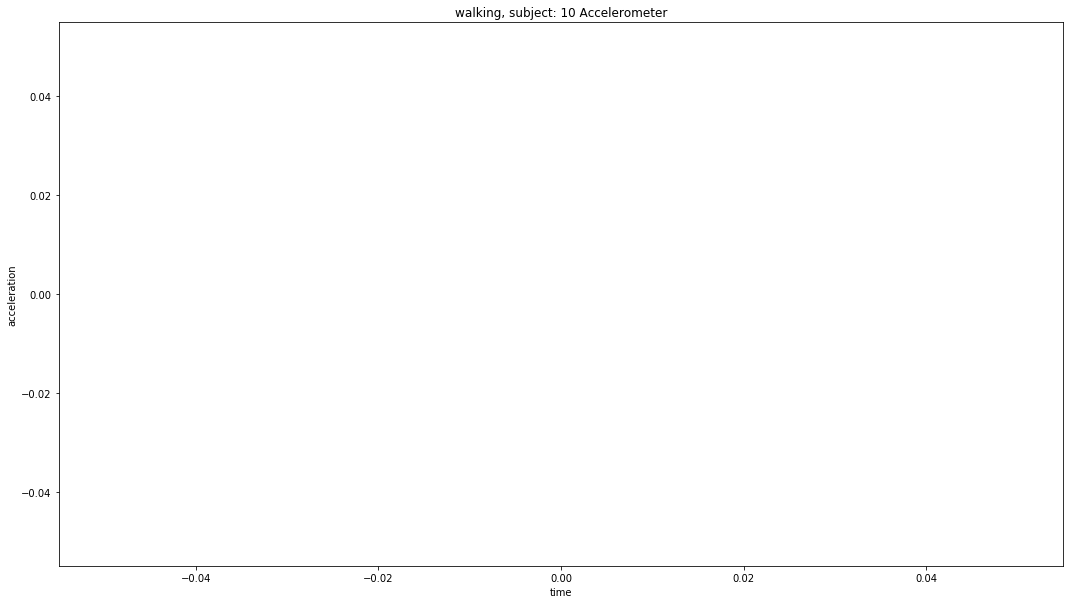

In [157]:
# check plots to see if they look consistent now that we have dropped bad samples

activities =["climbingdown","climbingup","jumping","lying","running","sitting","walking"]

for activity in activities: 
    data = deviation[~deviation.sample_num.isin(samples_to_drop)]
    plot_std(data,activity)